# **Random Acts of Pizza Analysis**

Team Members:
1. Eric (Yue) Ling
2. Krutika Ingale
3. Mitch Abdon
4. Tanya Flint



# Outline

1. Baseline Submission
	- 1.1. Introduction
	- 1.2. EDA on textual data
	- 1.3. EDA on non-textual data
	- 1.4. Baseline Models with both Numeric and Textual Features
        - Logistic Regression
            - Logistic Regression model that uses the in-built balancing function.
			- Logistic Regression model that does NOT use the in-built balancing function
			- Logistic Regression model that uses SMOTE balancing technique
		- Bernoulli Naive Bayes
			- Bernoulli Naive Bayes model on unbalanced data
			- Bernoulli Naive Bayes model on SMOTE balanced data
	- 1.5. Baseline Models with only Textual Features
		- Logistic Regression
			- Logistic Regression model that uses the in-built balancing function
			- Logistic Regression model with no balancing function
		- Bernoulli Naive Bayes
			- Bernoulli Naive Bayes model that on unbalanced data
	- 1.6. Summary
    
    
2. Final Submission	 
	- 2.1. Further data cleaning 
	- 2.2. Models on Numeric Features
		- Logistic Regression 
        - KNN
	- 2.3. More feature engineering
	- 2.4. Logistic Regression and KNN Enhancements
	- 2.5. Random Forest
	- 2.6. XGBoost
    - 2.7. BERT
    - 2.8. Test Performance
	- 2.9. Summary
    
    

Appendix



## 1.1 Introduction:

This analysis uses the Random Acts of Pizza dataset (https://www.kaggle.com/c/random-acts-of-pizza/data) generated from Reddit. This subreddit allows anyone to submit a request to ask for a free pizza, and readers may respond to specific posts and send a free pizza.

Our goal is to produce a model to predict the likelihood of receiving a pizza and to deliver insights into what we think makes for a great free pizza request. This binary classification problem involves free-form textual content and attached metadata about the post and Reddit community members. 

In Part 1 of this analysis, we explore the the data, and generate visualizations and summary statistics to reveal patterns between requests that did receive pizza and those which do not. We will also run preliminary sentiment analysis on the request text and explored additional features that we can derive from the dataset.

The breakdown of positive (received pizza) to negative (did not receive pizza) cases of receiving a pizza in the training data set is about 25% positive and 75% negative cases. Since the data is unbalanced, we will perform resampling/balancing techniques. We will use accuracy scores, precision, recall, and f1 scores to measure performance.

To begin our exploration of baseline models, we will implement Logistic Regression and Bernoulli Naive Bayes' models using a bag of words approach to vectorize the text data and some data balancing techniques. We use the Logistic Regression model on textual data and in-built balancing as our main Baseline model because it performs the best among the other initial models.

Learning from the explanatory data analysis and results of the baseline models from Part 1, we further cleaned the data and redesigned our features, such as scaling to normalize our newly cleaned numeric and feature engineering, in Part 2. We then use this enhanced dataset to run additional variations of predictive models, such as Logistic Regression, K-Nearest Neighbors, Random Forest, Transformers, and XGBoost. 

We have provided a summary of measure performance at the end to show which models fit best on the cross-validated training set. We then picked the two best models and ran them on the test data once.

Lessons from this exercise could be valuable to not only the Reddit community, but other social platforms that wish to improve their user engagement through NLP techniques.


# 1. Baseline submission

## Setup Libraries

In [176]:
# import the necessary libraries
import math
import numpy as np
import pandas as pd
#import psycopg2 #prob don't need this
import json
import csv
from datetime import datetime as dt

from IPython.display import display, HTML

# This tells matplotlib not to open a new window for each plot.
%matplotlib inline

# general libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

from sklearn.model_selection import train_test_split

# import Word Cloud
from wordcloud import WordCloud, STOPWORDS

import nltk

from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
     'wordnet'
])


# Libraries for neural networks
import tensorflow as tf
import tensorflow.keras.backend as K

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import optimizers


[nltk_data] Downloading package names to /Users/ericling/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ericling/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/ericling/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/ericling/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/ericling/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ericling/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ericl

# Setup Data

In [177]:
# load in original training data
with open('data/train.json') as fin:
    trainjson = json.load(fin)
full_train = pd.json_normalize(trainjson)
full_train

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,0,1,False,t3_l25d7,0,Hi I am in need of food for my 4 children we a...,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,...,False,[],0,1,0,1,None,nickylvst,1.317853e+09,1.317849e+09
1,N/A,2,5,False,t3_rcb83,0,I spent the last money I had on gas today. Im ...,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,...,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,4258,116,11168,None,fohacidal,1.332652e+09,1.332649e+09
2,N/A,0,3,False,t3_lpu5j,0,My girlfriend decided it would be a good idea ...,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,...,False,[],0,3,0,3,None,jacquibatman7,1.319650e+09,1.319646e+09
3,N/A,0,1,True,t3_mxvj3,4,"It's cold, I'n hungry, and to be completely ho...","It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,...,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,59,76,81,None,4on_the_floor,1.322855e+09,1.322855e+09
4,N/A,6,6,False,t3_1i6486,5,hey guys:\n I love this sub. I think it's grea...,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,...,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1225,1733,1887,None,Futuredogwalker,1.373658e+09,1.373654e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,N/A,3,5,False,t3_1hpv57,1,Is anyone out there kind enough to help me out...,Is anyone out there kind enough to help me out...,[REQUEST] Anyone help a recent college grad wh...,0.000000,...,False,[],0,4,0,12,None,bstewart88,1.373069e+09,1.373065e+09
4036,N/A,2,5,False,t3_1lzcwr,0,If someone could hook me up with a $15 gift ca...,If someone could hook me up with a $15 gift ca...,[Request][USA] Papa Johns is giving away one f...,658.366863,...,True,"[AskReddit, CoffeeWithJesus, IAmA, RandomKindn...",738,751,2974,3025,shroom,puddems,1.378667e+09,1.378664e+09
4037,N/A,4,10,1369770892.0,t3_1f77ml,2,"Have today off, soo I'll be stuck in the house...","Have today off, soo I'll be stuck in the house...","[REQUEST][MI,USA] Day off, would love pizza fo...",410.551736,...,False,"[AdviceAnimals, Android, AskReddit, Diablo, HT...",1252,1327,5634,5761,None,Candlejac88,1.369755e+09,1.369751e+09
4038,N/A,2,7,False,t3_q875f,4,"I've never done anything like this before, but...","I've never done anything like this before, but...",[Request] Nashua Nh Mother of one hungry 2 yea...,0.000000,...,False,[Random_Acts_Of_Pizza],5,13,7,41,None,nhcollegechic,1.330358e+09,1.330358e+09


In [178]:
# binarize output prediction value
full_train['received_pizza_bin'] = full_train.requester_received_pizza.astype(int) 


In [179]:
# split full training data into 3 new sets : train, dev, test
# set seed for randomization so don't get diff data every time
mid_train, dev = train_test_split(full_train, test_size=0.2, random_state = 0)
train, test = train_test_split(mid_train, test_size=0.2, random_state = 0)

print(train.shape)

(2585, 33)


## 1.2 EDA on Textual Data

In [180]:
# check if None values in training data 
train.isna().sum()

giver_username_if_known                                    0
number_of_downvotes_of_request_at_retrieval                0
number_of_upvotes_of_request_at_retrieval                  0
post_was_edited                                            0
request_id                                                 0
request_number_of_comments_at_retrieval                    0
request_text                                               0
request_text_edit_aware                                    0
request_title                                              0
requester_account_age_in_days_at_request                   0
requester_account_age_in_days_at_retrieval                 0
requester_days_since_first_post_on_raop_at_request         0
requester_days_since_first_post_on_raop_at_retrieval       0
requester_number_of_comments_at_request                    0
requester_number_of_comments_at_retrieval                  0
requester_number_of_comments_in_raop_at_request            0
requester_number_of_comm

In [181]:
# remove request, pizza, and brackets from the title since it's repetitive
clean_title = train['request_title'].map(lambda x: re.sub('request|pizza','',x, flags=re.IGNORECASE)).map(lambda x: re.sub('\[\]','',x, flags=re.IGNORECASE))
clean_title

2585                  Family with no budget would love a 
796      No sob story, just craving a . Elkin, North C...
3123     Working on a final project, and would love so...
3576               Teenager with the munchies (Wisconsin)
3596     Cedar Park, TX: I'll gladly  you Friday for a...
                              ...                        
190                                            LCD system
535      Aberystwyth, UK. Friend's loan doesn't arrive...
2426     I'm a student, my account is at $-60, I have ...
691     London, England. No money until my student loa...
2009    () London, Kentucky. Need help feeding kids. W...
Name: request_title, Length: 2585, dtype: object

In [182]:
# apply same cleaning on dev and test set 
dev_clean_title = dev['request_title'].map(lambda x: re.sub('request|pizza','',x, flags=re.IGNORECASE)).map(lambda x: re.sub('\[\]','',x, flags=re.IGNORECASE))
dev['concat_text'] = dev_clean_title + " " + dev['request_text_edit_aware']

test_clean_title = test['request_title'].map(lambda x: re.sub('request|pizza','',x, flags=re.IGNORECASE)).map(lambda x: re.sub('\[\]','',x, flags=re.IGNORECASE))
test['concat_text'] = test_clean_title + " " + test['request_text_edit_aware']


In [183]:
# concatenate title and body to form a full text
train['concat_text'] = clean_title + " " + train['request_text_edit_aware']

train

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,received_pizza_bin,concat_text
2585,N/A,2,2,False,t3_zm9r7,0,Unexpected dental work has tightened our famil...,Unexpected dental work has tightened our famil...,[Request] Family with no budget would love a p...,222.059271,...,8,16,20,34,None,KevinsBacon,1.347228e+09,1.347224e+09,0,Family with no budget would love a Unexpecte...
796,N/A,0,1,False,t3_18c24q,0,Haven't had pizza in a while,Haven't had pizza in a while,"[REQUEST] No sob story, just craving a pizza. ...",158.669051,...,20,21,32,33,None,gokunt,1.360620e+09,1.360620e+09,0,"No sob story, just craving a . Elkin, North C..."
3123,N/A,1,2,False,t3_tan10,1,Working on finishing my final projects in two ...,Working on finishing my final projects in two ...,"[request] Working on a final project, and woul...",123.102234,...,101,2979,181,5253,None,MRdaBakkle,1.336366e+09,1.336362e+09,0,"Working on a final project, and would love so..."
3576,N/A,3,3,False,t3_mifik,0,"Preferably something with bacon and pepperoni,...","Preferably something with bacon and pepperoni,...",[REQUEST] Teenager with the munchies (Wisconsin),116.800417,...,373,1032,1025,2284,None,MattGrubbTV,1.321742e+09,1.321742e+09,0,Teenager with the munchies (Wisconsin) Prefer...
3596,N/A,5,4,False,t3_10hdxb,0,"Alright Reddit, I'll be straight. I'm not supe...","Alright Reddit, I'll be straight. I'm not supe...","[Request] Cedar Park, TX: I'll gladly pizza yo...",310.775046,...,15,17,21,33,None,danbri28,1.348626e+09,1.348622e+09,0,"Cedar Park, TX: I'll gladly you Friday for a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,N/A,2,4,False,t3_1bbhuw,4,"Listening to 45:33, hence the title. Anyone fe...","Listening to 45:33, hence the title. Anyone fe...",[Request] LCD Pizzasystem,36.709039,...,23,41,35,71,None,boner_sushi,1.364678e+09,1.364675e+09,0,"LCD system Listening to 45:33, hence the titl..."
535,cutfloss,1,3,False,t3_1cc30t,7,I hope it's okay to request on behalf of other...,I hope it's okay to request on behalf of other...,"[Request] Aberystwyth, UK. Friend's loan doesn...",323.907812,...,310,827,738,1565,shroom,mellomeh,1.365966e+09,1.365962e+09,1,"Aberystwyth, UK. Friend's loan doesn't arrive..."
2426,N/A,2,6,False,t3_mu6m5,4,"I have to survive somehow until next Friday, w...","I have to survive somehow until next Friday, w...","[Request] I'm a student, my account is at $-60...",195.774398,...,1025,6240,2049,29574,shroom,vveksuvarna,1.322620e+09,1.322620e+09,1,"I'm a student, my account is at $-60, I have ..."
691,N/A,2,4,1345908529.0,t3_yt3rn,0,I'm pretty broke and have nothing to eat. Nor ...,I'm pretty broke and have nothing to eat. Nor ...,"[Request]London, England. No money until my st...",29.981586,...,19,24,25,36,None,WhoJahBless,1.345912e+09,1.345908e+09,0,"London, England. No money until my student loa..."


In [184]:
# add a column to count the number of exclamation marks in the full text
train['num_exclam'] = train.apply(lambda x: x['concat_text'].count('!'), axis=1)

# add a column to count the number of question marks in the full text
train['num_quest'] = train.apply(lambda x: x['concat_text'].count('?'), axis=1)
train



,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,received_pizza_bin,concat_text,num_exclam,num_quest
2585,N/A,2,2,False,t3_zm9r7,0,Unexpected dental work has tightened our famil...,Unexpected dental work has tightened our famil...,[Request] Family with no budget would love a p...,222.059271,...,20,34,None,KevinsBacon,1.347228e+09,1.347224e+09,0,Family with no budget would love a Unexpecte...,0,0
796,N/A,0,1,False,t3_18c24q,0,Haven't had pizza in a while,Haven't had pizza in a while,"[REQUEST] No sob story, just craving a pizza. ...",158.669051,...,32,33,None,gokunt,1.360620e+09,1.360620e+09,0,"No sob story, just craving a . Elkin, North C...",0,0
3123,N/A,1,2,False,t3_tan10,1,Working on finishing my final projects in two ...,Working on finishing my final projects in two ...,"[request] Working on a final project, and woul...",123.102234,...,181,5253,None,MRdaBakkle,1.336366e+09,1.336362e+09,0,"Working on a final project, and would love so...",0,0
3576,N/A,3,3,False,t3_mifik,0,"Preferably something with bacon and pepperoni,...","Preferably something with bacon and pepperoni,...",[REQUEST] Teenager with the munchies (Wisconsin),116.800417,...,1025,2284,None,MattGrubbTV,1.321742e+09,1.321742e+09,0,Teenager with the munchies (Wisconsin) Prefer...,1,0
3596,N/A,5,4,False,t3_10hdxb,0,"Alright Reddit, I'll be straight. I'm not supe...","Alright Reddit, I'll be straight. I'm not supe...","[Request] Cedar Park, TX: I'll gladly pizza yo...",310.775046,...,21,33,None,danbri28,1.348626e+09,1.348622e+09,0,"Cedar Park, TX: I'll gladly you Friday for a...",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,N/A,2,4,False,t3_1bbhuw,4,"Listening to 45:33, hence the title. Anyone fe...","Listening to 45:33, hence the title. Anyone fe...",[Request] LCD Pizzasystem,36.709039,...,35,71,None,boner_sushi,1.364678e+09,1.364675e+09,0,"LCD system Listening to 45:33, hence the titl...",0,1
535,cutfloss,1,3,False,t3_1cc30t,7,I hope it's okay to request on behalf of other...,I hope it's okay to request on behalf of other...,"[Request] Aberystwyth, UK. Friend's loan doesn...",323.907812,...,738,1565,shroom,mellomeh,1.365966e+09,1.365962e+09,1,"Aberystwyth, UK. Friend's loan doesn't arrive...",0,0
2426,N/A,2,6,False,t3_mu6m5,4,"I have to survive somehow until next Friday, w...","I have to survive somehow until next Friday, w...","[Request] I'm a student, my account is at $-60...",195.774398,...,2049,29574,shroom,vveksuvarna,1.322620e+09,1.322620e+09,1,"I'm a student, my account is at $-60, I have ...",0,0
691,N/A,2,4,1345908529.0,t3_yt3rn,0,I'm pretty broke and have nothing to eat. Nor ...,I'm pretty broke and have nothing to eat. Nor ...,"[Request]London, England. No money until my st...",29.981586,...,25,36,None,WhoJahBless,1.345912e+09,1.345908e+09,0,"London, England. No money until my student loa...",2,1


In [185]:
# apply same on dev and test set 
dev['num_exclam'] = dev.apply(lambda x: x['concat_text'].count('!'), axis=1)
dev['num_quest'] = dev.apply(lambda x: x['concat_text'].count('?'), axis=1)
test['num_exclam'] = test.apply(lambda x: x['concat_text'].count('!'), axis=1)
test['num_quest'] = test.apply(lambda x: x['concat_text'].count('?'), axis=1)


In [186]:
# find the sentiment score of each text
sent = SentimentIntensityAnalyzer()

train['sent_di'] = train.apply(lambda x: sent.polarity_scores(x['concat_text']), axis=1)

train

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc,received_pizza_bin,concat_text,num_exclam,num_quest,sent_di
2585,N/A,2,2,False,t3_zm9r7,0,Unexpected dental work has tightened our famil...,Unexpected dental work has tightened our famil...,[Request] Family with no budget would love a p...,222.059271,...,34,None,KevinsBacon,1.347228e+09,1.347224e+09,0,Family with no budget would love a Unexpecte...,0,0,"{'neg': 0.042, 'neu': 0.821, 'pos': 0.137, 'co..."
796,N/A,0,1,False,t3_18c24q,0,Haven't had pizza in a while,Haven't had pizza in a while,"[REQUEST] No sob story, just craving a pizza. ...",158.669051,...,33,None,gokunt,1.360620e+09,1.360620e+09,0,"No sob story, just craving a . Elkin, North C...",0,0,"{'neg': 0.276, 'neu': 0.724, 'pos': 0.0, 'comp..."
3123,N/A,1,2,False,t3_tan10,1,Working on finishing my final projects in two ...,Working on finishing my final projects in two ...,"[request] Working on a final project, and woul...",123.102234,...,5253,None,MRdaBakkle,1.336366e+09,1.336362e+09,0,"Working on a final project, and would love so...",0,0,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp..."
3576,N/A,3,3,False,t3_mifik,0,"Preferably something with bacon and pepperoni,...","Preferably something with bacon and pepperoni,...",[REQUEST] Teenager with the munchies (Wisconsin),116.800417,...,2284,None,MattGrubbTV,1.321742e+09,1.321742e+09,0,Teenager with the munchies (Wisconsin) Prefer...,1,0,"{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp..."
3596,N/A,5,4,False,t3_10hdxb,0,"Alright Reddit, I'll be straight. I'm not supe...","Alright Reddit, I'll be straight. I'm not supe...","[Request] Cedar Park, TX: I'll gladly pizza yo...",310.775046,...,33,None,danbri28,1.348626e+09,1.348622e+09,0,"Cedar Park, TX: I'll gladly you Friday for a...",0,1,"{'neg': 0.045, 'neu': 0.733, 'pos': 0.222, 'co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,N/A,2,4,False,t3_1bbhuw,4,"Listening to 45:33, hence the title. Anyone fe...","Listening to 45:33, hence the title. Anyone fe...",[Request] LCD Pizzasystem,36.709039,...,71,None,boner_sushi,1.364678e+09,1.364675e+09,0,"LCD system Listening to 45:33, hence the titl...",0,1,"{'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'comp..."
535,cutfloss,1,3,False,t3_1cc30t,7,I hope it's okay to request on behalf of other...,I hope it's okay to request on behalf of other...,"[Request] Aberystwyth, UK. Friend's loan doesn...",323.907812,...,1565,shroom,mellomeh,1.365966e+09,1.365962e+09,1,"Aberystwyth, UK. Friend's loan doesn't arrive...",0,0,"{'neg': 0.046, 'neu': 0.851, 'pos': 0.103, 'co..."
2426,N/A,2,6,False,t3_mu6m5,4,"I have to survive somehow until next Friday, w...","I have to survive somehow until next Friday, w...","[Request] I'm a student, my account is at $-60...",195.774398,...,29574,shroom,vveksuvarna,1.322620e+09,1.322620e+09,1,"I'm a student, my account is at $-60, I have ...",0,0,"{'neg': 0.083, 'neu': 0.811, 'pos': 0.106, 'co..."
691,N/A,2,4,1345908529.0,t3_yt3rn,0,I'm pretty broke and have nothing to eat. Nor ...,I'm pretty broke and have nothing to eat. Nor ...,"[Request]London, England. No money until my st...",29.981586,...,36,None,WhoJahBless,1.345912e+09,1.345908e+09,0,"London, England. No money until my student loa...",2,1,"{'neg': 0.145, 'neu': 0.629, 'pos': 0.226, 'co..."


In [187]:
# apply same on dev and test set 
dev['sent_di'] = dev.apply(lambda x: sent.polarity_scores(x['concat_text']), axis=1)
test['sent_di'] = test.apply(lambda x: sent.polarity_scores(x['concat_text']), axis=1)


In [188]:
# create columns for positive, negative, and neutral sentiment
train['neg_sent'] = train.apply(lambda x: x['sent_di']['neg'], axis=1)
train['pos_sent'] = train.apply(lambda x: x['sent_di']['pos'], axis=1)
train['neut_sent'] = train.apply(lambda x: x['sent_di']['neu'], axis=1)

train

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,unix_timestamp_of_request,unix_timestamp_of_request_utc,received_pizza_bin,concat_text,num_exclam,num_quest,sent_di,neg_sent,pos_sent,neut_sent
2585,N/A,2,2,False,t3_zm9r7,0,Unexpected dental work has tightened our famil...,Unexpected dental work has tightened our famil...,[Request] Family with no budget would love a p...,222.059271,...,1.347228e+09,1.347224e+09,0,Family with no budget would love a Unexpecte...,0,0,"{'neg': 0.042, 'neu': 0.821, 'pos': 0.137, 'co...",0.042,0.137,0.821
796,N/A,0,1,False,t3_18c24q,0,Haven't had pizza in a while,Haven't had pizza in a while,"[REQUEST] No sob story, just craving a pizza. ...",158.669051,...,1.360620e+09,1.360620e+09,0,"No sob story, just craving a . Elkin, North C...",0,0,"{'neg': 0.276, 'neu': 0.724, 'pos': 0.0, 'comp...",0.276,0.000,0.724
3123,N/A,1,2,False,t3_tan10,1,Working on finishing my final projects in two ...,Working on finishing my final projects in two ...,"[request] Working on a final project, and woul...",123.102234,...,1.336366e+09,1.336362e+09,0,"Working on a final project, and would love so...",0,0,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.000,0.231,0.769
3576,N/A,3,3,False,t3_mifik,0,"Preferably something with bacon and pepperoni,...","Preferably something with bacon and pepperoni,...",[REQUEST] Teenager with the munchies (Wisconsin),116.800417,...,1.321742e+09,1.321742e+09,0,Teenager with the munchies (Wisconsin) Prefer...,1,0,"{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...",0.000,0.142,0.858
3596,N/A,5,4,False,t3_10hdxb,0,"Alright Reddit, I'll be straight. I'm not supe...","Alright Reddit, I'll be straight. I'm not supe...","[Request] Cedar Park, TX: I'll gladly pizza yo...",310.775046,...,1.348626e+09,1.348622e+09,0,"Cedar Park, TX: I'll gladly you Friday for a...",0,1,"{'neg': 0.045, 'neu': 0.733, 'pos': 0.222, 'co...",0.045,0.222,0.733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,N/A,2,4,False,t3_1bbhuw,4,"Listening to 45:33, hence the title. Anyone fe...","Listening to 45:33, hence the title. Anyone fe...",[Request] LCD Pizzasystem,36.709039,...,1.364678e+09,1.364675e+09,0,"LCD system Listening to 45:33, hence the titl...",0,1,"{'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'comp...",0.000,0.311,0.689
535,cutfloss,1,3,False,t3_1cc30t,7,I hope it's okay to request on behalf of other...,I hope it's okay to request on behalf of other...,"[Request] Aberystwyth, UK. Friend's loan doesn...",323.907812,...,1.365966e+09,1.365962e+09,1,"Aberystwyth, UK. Friend's loan doesn't arrive...",0,0,"{'neg': 0.046, 'neu': 0.851, 'pos': 0.103, 'co...",0.046,0.103,0.851
2426,N/A,2,6,False,t3_mu6m5,4,"I have to survive somehow until next Friday, w...","I have to survive somehow until next Friday, w...","[Request] I'm a student, my account is at $-60...",195.774398,...,1.322620e+09,1.322620e+09,1,"I'm a student, my account is at $-60, I have ...",0,0,"{'neg': 0.083, 'neu': 0.811, 'pos': 0.106, 'co...",0.083,0.106,0.811
691,N/A,2,4,1345908529.0,t3_yt3rn,0,I'm pretty broke and have nothing to eat. Nor ...,I'm pretty broke and have nothing to eat. Nor ...,"[Request]London, England. No money until my st...",29.981586,...,1.345912e+09,1.345908e+09,0,"London, England. No money until my student loa...",2,1,"{'neg': 0.145, 'neu': 0.629, 'pos': 0.226, 'co...",0.145,0.226,0.629


In [189]:
# apply same on dev and test set
dev['neg_sent'] = dev.apply(lambda x: x['sent_di']['neg'], axis=1)
dev['pos_sent'] = dev.apply(lambda x: x['sent_di']['pos'], axis=1)
dev['neut_sent'] = dev.apply(lambda x: x['sent_di']['neu'], axis=1)

test['neg_sent'] = test.apply(lambda x: x['sent_di']['neg'], axis=1)
test['pos_sent'] = test.apply(lambda x: x['sent_di']['pos'], axis=1)
test['neut_sent'] = test.apply(lambda x: x['sent_di']['neu'], axis=1)


In [190]:
# make sure train, dev, and test have the same columns
print("train shape: ", train.shape)
print("dev shape: ", dev.shape)
print("test shape: ", test.shape)

train shape:  (2585, 40)
dev shape:  (808, 40)
test shape:  (647, 40)


## Visualizations

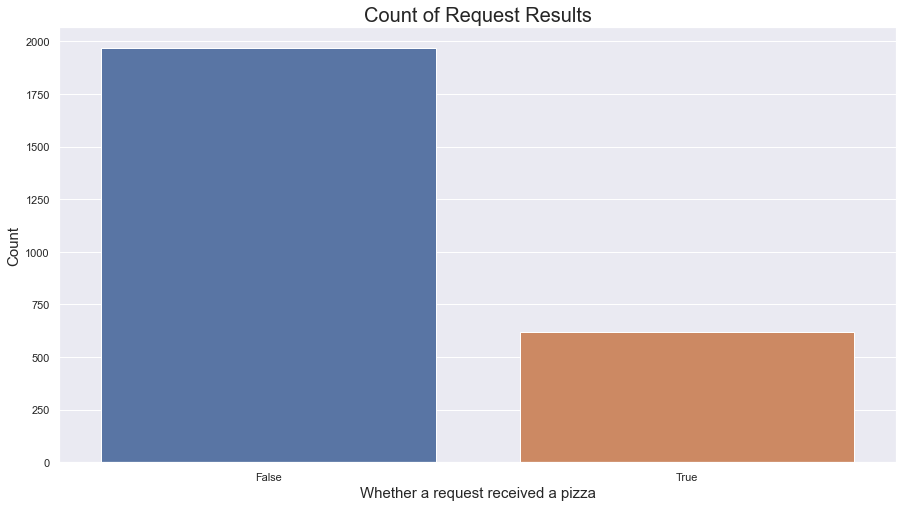

In [191]:
# bar chart of counts requests that recevied and did not received pizza

sns.set(rc = {'figure.figsize':(15,8)})

sns.countplot(x="requester_received_pizza", data=train)
plt.title("Count of Request Results" ,size = 20)
plt.xlabel("Whether a request received a pizza", size=15)
plt.ylabel("Count", size=15)

plt.show()



From the bar plot, we can see that the number of requests that received pizza is almost 1/3 of the number of requests that did not receive pizza. We will likely have to balance the data before training and fitting the models.

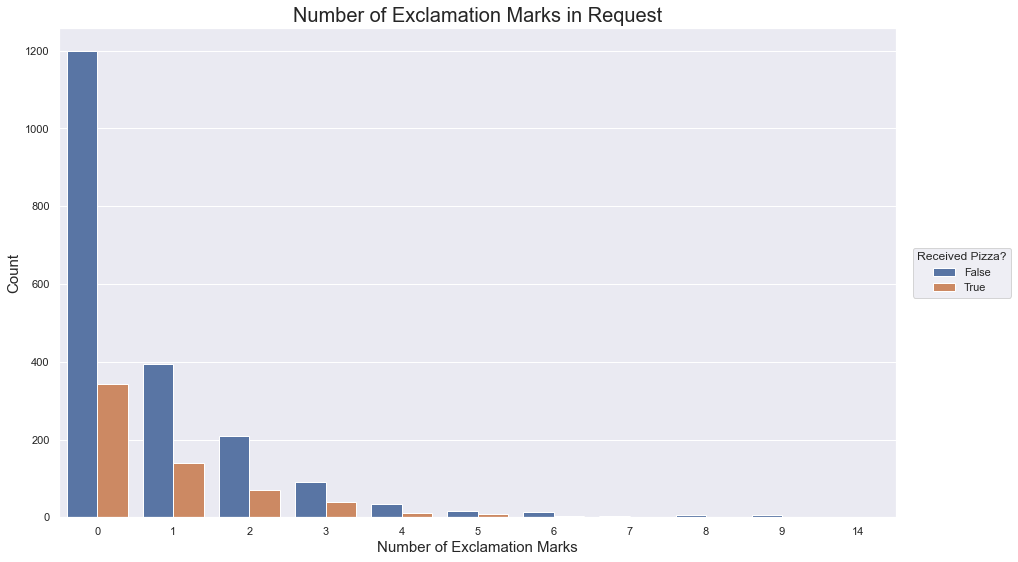

In [192]:
# bar chart of the number of exclamation marks in requests

sns.set(rc = {'figure.figsize':(15,9)})

sns.countplot(data = train, x="num_exclam", hue="requester_received_pizza")
plt.title("Number of Exclamation Marks in Request" ,size = 20)
plt.xlabel("Number of Exclamation Marks", size=15)
plt.ylabel("Count", size=15)
plt.legend( title="Received Pizza?", bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0)

plt.show()


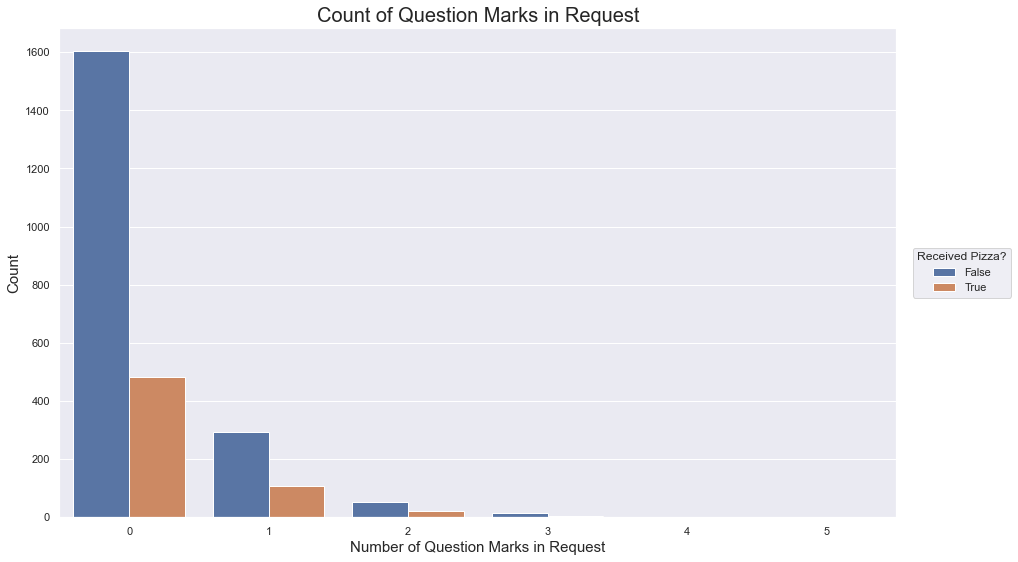

In [193]:
# bar chart of the number of question marks in requests

sns.set(rc = {'figure.figsize':(15,9)})

sns.countplot(data = train, x="num_quest", hue="requester_received_pizza")
plt.title("Count of Question Marks in Request" ,  size = 20)
plt.xlabel("Number of Question Marks in Request" ,size = 15)
plt.ylabel("Count" , size = 15)
plt.legend(title="Received Pizza?", bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0)


plt.show()

In the two plots above, we see that the number of exclamation marks in a request can range from 0 to 14, while the number of question marks can range from 0 to 5. There are more exclamation marks than question marks used in requests. The majority of both successful and unsuccessful requests have no exclamation marks or question marks. A successful request means a request recevied a pizza and unsuccessful request means a request did not receive a pizza.

In [194]:
# get average number of exclamation marks for each group 
exclam_df = train.groupby(['requester_received_pizza'])['num_exclam'].mean().reset_index()
exclam_df['type'] = 'Exclamation'
exclam_df = exclam_df.rename(columns = {'num_exclam': 'Avg Number'})
exclam_df

# get average number of question marks for each group 
quest_df = train.groupby(['requester_received_pizza'])['num_quest'].mean().reset_index()
quest_df['type'] = 'Question'
quest_df = quest_df.rename(columns = {'num_quest': 'Avg Number'})

quest_df

,requester_received_pizza,Avg Number,type
0,False,0.233740,Question
1,True,0.269044,Question


In [195]:
# concatenate punctuation dataframes for plotting 
mean_punt_df = pd.concat([exclam_df, quest_df], ignore_index=True)
rec_li = mean_punt_df.apply(lambda x: "Recevied" if x['requester_received_pizza'] == True else "Not Received", axis=1)
mean_punt_df['requester_received_pizza'] = rec_li
mean_punt_df

,requester_received_pizza,Avg Number,type
0,Not Received,0.761687,Exclamation
1,Recevied,0.850891,Exclamation
2,Not Received,0.233740,Question
3,Recevied,0.269044,Question


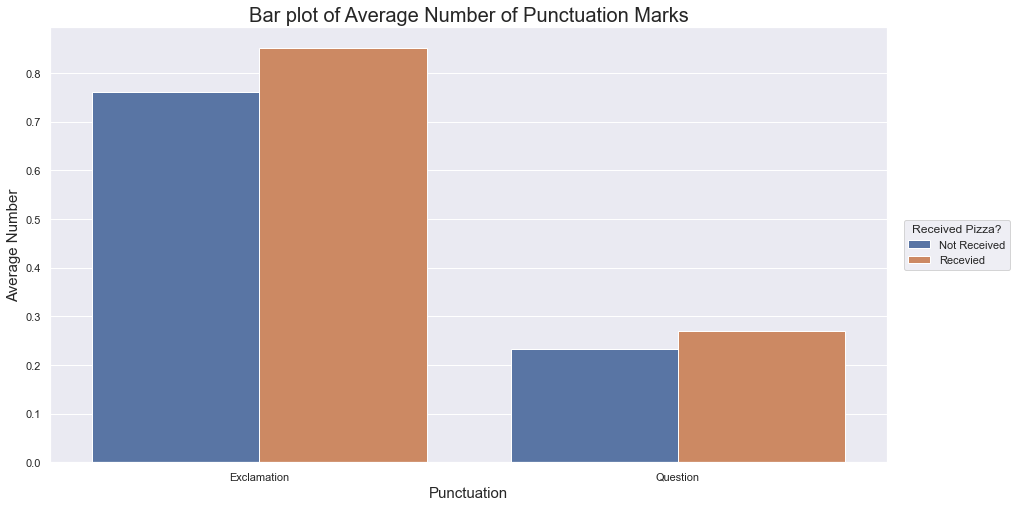

In [196]:
# bar plot of average number of punctuation
sns.set(rc = {'figure.figsize':(15,8)})

sns.barplot(x="type", y="Avg Number", hue="requester_received_pizza", data=mean_punt_df)
plt.title("Bar plot of Average Number of Punctuation Marks",size = 20)
plt.xlabel("Punctuation", size=15)
plt.ylabel("Average Number", size=15)

plt.legend( title="Received Pizza?", bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0)


plt.show()

In the plot above, we can see that the requests that received pizza have a slightly higher number of exclamation marks and question marks on average. This demonstrates that successful request may be more emphatic in their dialogue by exclaiming more and asking questions.

In [197]:

# get average negative sentiment score for each group 
neg_df = train.groupby(['requester_received_pizza'])['neg_sent'].mean().reset_index()
neg_df['type'] = 'Negative'
neg_df = neg_df.rename(columns = {'neg_sent': 'Sentiment Score'})
neg_df

# get average positive sentiment score for each group 
pos_df = train.groupby(['requester_received_pizza'])['pos_sent'].mean().reset_index()
pos_df['type'] = 'Positive'
pos_df = pos_df.rename(columns = {'pos_sent': 'Sentiment Score'})

pos_df

# get average neutral sentiment score for each group 
neut_df = train.groupby(['requester_received_pizza'])['neut_sent'].mean().reset_index()
neut_df['type'] = 'Neutral'
neut_df = neut_df.rename(columns = {'neut_sent': 'Sentiment Score'})
neut_df

,requester_received_pizza,Sentiment Score,type
0,False,0.761080,Neutral
1,True,0.773953,Neutral


In [198]:
# concatenate sentiment dataframes for plotting 
mean_sent_df = pd.concat([neg_df, pos_df, neut_df], ignore_index=True)
rec_li = mean_sent_df.apply(lambda x: "Recevied" if x['requester_received_pizza'] == True else "Not Received", axis=1)
mean_sent_df['requester_received_pizza'] = rec_li
mean_sent_df

,requester_received_pizza,Sentiment Score,type
0,Not Received,0.074297,Negative
1,Recevied,0.070332,Negative
2,Not Received,0.164631,Positive
3,Recevied,0.155737,Positive
4,Not Received,0.761080,Neutral
5,Recevied,0.773953,Neutral


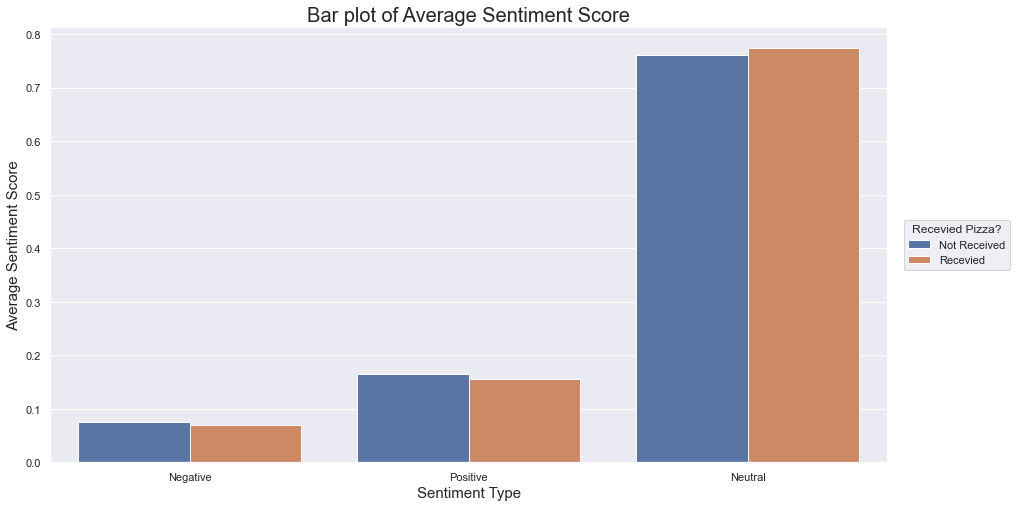

In [199]:
# bar plot of average of sentiment scores
sns.set(rc = {'figure.figsize':(15,8)})

sns.barplot(x="type", y="Sentiment Score", hue="requester_received_pizza", data=mean_sent_df)
plt.title("Bar plot of Average Sentiment Score",size = 20)
plt.xlabel("Sentiment Type", size=15)
plt.ylabel("Average Sentiment Score", size=15)

plt.legend( title="Recevied Pizza?", bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0)


plt.show()

In the plot, we can see that requests on average are more on the neutral side. Most requests have non-emphatic language. Successful requests have a lower negative and positive sentiment and a higher neutral sentiment than unsuccessful requests.

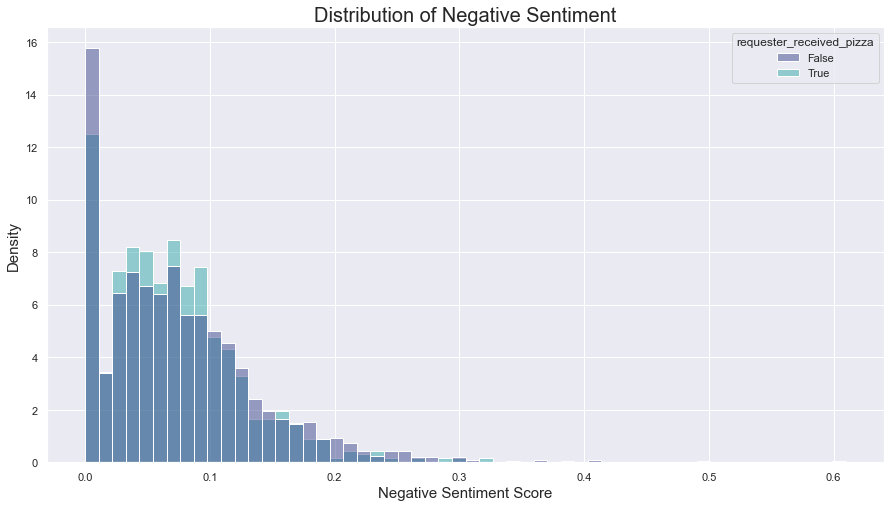

In [200]:
# histogram of negative sentiment 

sns.set(rc = {'figure.figsize':(15,8)})

# density > 1, beacuse the x values are fractions
sns.histplot(data=train, x="neg_sent", hue="requester_received_pizza", stat="density", common_norm=False, palette = "mako")
plt.title("Distribution of Negative Sentiment" ,size = 20)
plt.xlabel("Negative Sentiment Score", size=15)
plt.ylabel("Density", size=15)

plt.show()


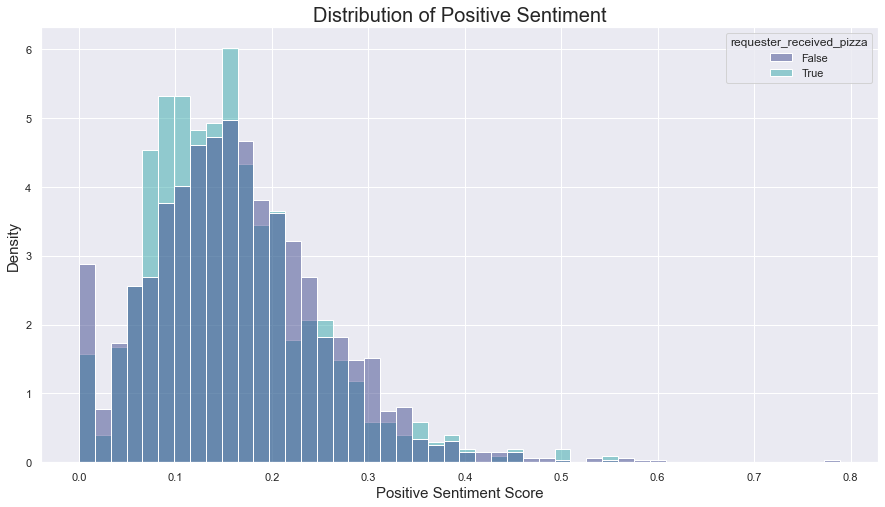

In [201]:
# histogram of positive sentiment 

sns.set(rc = {'figure.figsize':(15,8)})

# density > 1, cuz values are fractions
sns.histplot(data=train, x="pos_sent", hue="requester_received_pizza", stat="density", common_norm=False, palette = "mako")
plt.title("Distribution of Positive Sentiment" ,size = 20)
plt.xlabel("Positive Sentiment Score", size=15)
plt.ylabel("Density", size=15)

plt.show()


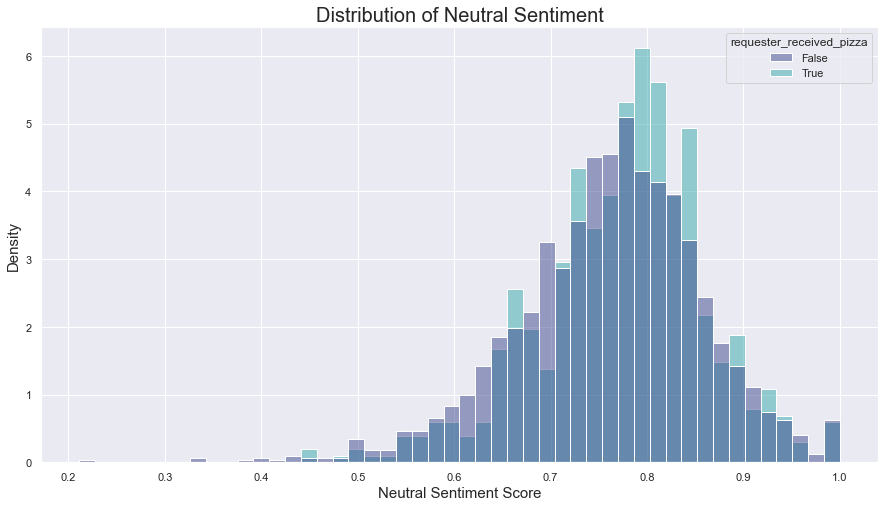

In [202]:
# histogram of neutral sentiment 

sns.set(rc = {'figure.figsize':(15,8)})

# density > 1, cuz values are fractions
# The height of a bar * its width = the probability density that a value would fall in that range.
sns.histplot(data=train, x="neut_sent", hue="requester_received_pizza", stat="density", common_norm=False, palette = "mako")
plt.title("Distribution of Neutral Sentiment" ,size = 20)
plt.xlabel("Neutral Sentiment Score", size=15)
plt.ylabel("Density", size=15)

plt.show()


In the above histograms, we can see the distributions of different sentiment scores. A lot of the requests had strong neutral sentiment scores. In all 3 plots, we can see that requests that recevied pizza had more positive, negative and neutral sentiment than those that didn't receive pizza. Furthermore, we see that requests were more neutral than positive and more positive than negative.

In [203]:
# requests that received pizzas
got_pizza_df = train[train['requester_received_pizza'] == True]
got_pizza_df


,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,unix_timestamp_of_request,unix_timestamp_of_request_utc,received_pizza_bin,concat_text,num_exclam,num_quest,sent_di,neg_sent,pos_sent,neut_sent
1356,harrisonfire,1,1,False,t3_1lodmo,3,"Hey Raop,\n\nI recently got a job as a Standar...","Hey Raop,\n\nI recently got a job as a Standar...",[Request] Pizza please. Read more inside. US,86.326019,...,1.378254e+09,1.378250e+09,1,"please. Read more inside. US Hey Raop,\n\nI ...",0,1,"{'neg': 0.035, 'neu': 0.855, 'pos': 0.111, 'co...",0.035,0.111,0.855
201,kigood,1,9,False,t3_15mvwr,2,I could use a pizza since my job hasn't been o...,I could use a pizza since my job hasn't been o...,"[REQUEST] [Union, NJ] Pizza needed for a broke...",696.842986,...,1.356809e+09,1.356809e+09,1,"[Union, NJ] needed for a broke snowman. I co...",0,0,"{'neg': 0.128, 'neu': 0.64, 'pos': 0.231, 'com...",0.128,0.231,0.640
2333,fogdelune,1,2,False,t3_15cmbc,1,"I'm a student who just finished with finals, s...","I'm a student who just finished with finals, s...",[Request] Hungry during the holidays (Ann Arbo...,105.071389,...,1.356311e+09,1.356311e+09,1,"Hungry during the holidays (Ann Arbor, MI) I'...",0,0,"{'neg': 0.087, 'neu': 0.823, 'pos': 0.09, 'com...",0.087,0.090,0.823
2680,N/A,1,12,False,t3_o2oml,5,"Well, the wife and I have been married a year ...","Well, the wife and I have been married a year ...","[Request] in Rockford, IL for our anniversary ...",0.000000,...,1.325697e+09,1.325697e+09,1,"in Rockford, IL for our anniversary dinner We...",2,0,"{'neg': 0.084, 'neu': 0.627, 'pos': 0.29, 'com...",0.084,0.290,0.627
2177,N/A,0,2,True,t3_qzw8j,1,Don't want to get all bluh bluh with my person...,Don't want to get all bluh bluh with my person...,[Request] Seattle/Redmond - Laid Off and Hungry,303.932373,...,1.331934e+09,1.331931e+09,1,Seattle/Redmond - Laid Off and Hungry Don't w...,0,0,"{'neg': 0.017, 'neu': 0.882, 'pos': 0.101, 'co...",0.017,0.101,0.882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,N/A,1,4,False,t3_ivw59,1,Anyone willing to order us a pizza just for to...,Anyone willing to order us a pizza just for to...,[REQUEST] Me and the girlfriend are starving! ...,13.440509,...,1.311266e+09,1.311262e+09,1,Me and the girlfriend are starving! Checks co...,1,1,"{'neg': 0.048, 'neu': 0.845, 'pos': 0.106, 'co...",0.048,0.106,0.845
3100,N/A,5,10,False,t3_iaeax,6,"Just closed on our new house, no food or money...","Just closed on our new house, no food or money...","Requesting Pizza... Cibolo, TX 78108",58.503831,...,1.309192e+09,1.309189e+09,1,"ing ... Cibolo, TX 78108 Just closed on our ne...",0,0,"{'neg': 0.187, 'neu': 0.711, 'pos': 0.102, 'co...",0.187,0.102,0.711
1658,N/A,1,10,False,t3_rx1kn,5,"SO, I lost my job about a month ago, waiting/h...","SO, I lost my job about a month ago, waiting/h...","[request] Savannah, GA - I cannot afford food ...",395.982523,...,1.333757e+09,1.333753e+09,1,"Savannah, GA - I cannot afford food and a wo...",0,0,"{'neg': 0.082, 'neu': 0.831, 'pos': 0.087, 'co...",0.082,0.087,0.831
535,cutfloss,1,3,False,t3_1cc30t,7,I hope it's okay to request on behalf of other...,I hope it's okay to request on behalf of other...,"[Request] Aberystwyth, UK. Friend's loan doesn...",323.907812,...,1.365966e+09,1.365962e+09,1,"Aberystwyth, UK. Friend's loan doesn't arrive...",0,0,"{'neg': 0.046, 'neu': 0.851, 'pos': 0.103, 'co...",0.046,0.103,0.851


In [204]:
# requests that did not receive pizzas
no_pizza_df = train[train['requester_received_pizza'] == False]
# no_pizza_df

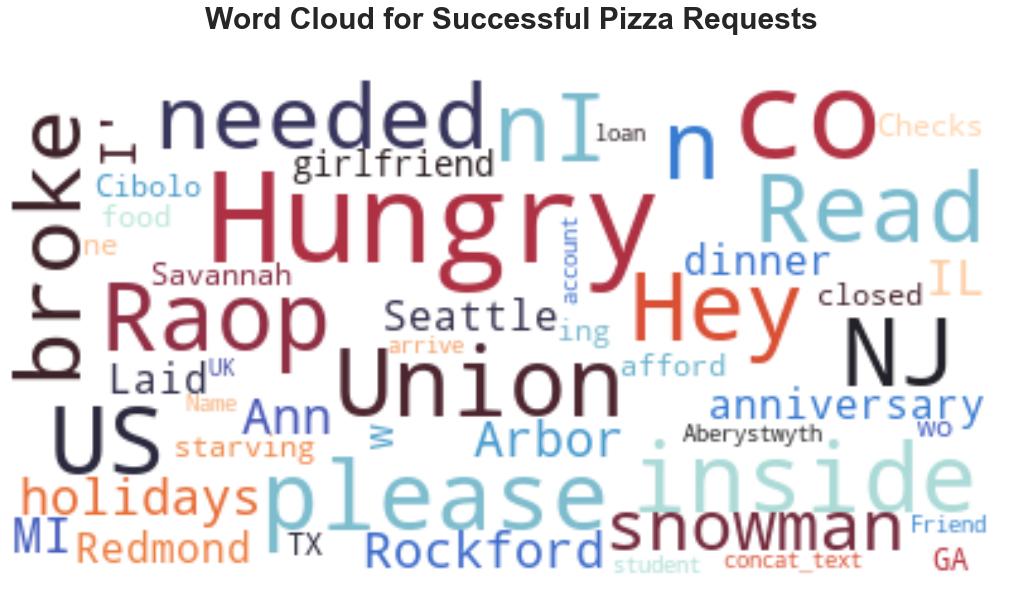

In [205]:
# Word cloud of successful requests

plt.rcParams['font.size']=13        
plt.rcParams['savefig.dpi']=200         
plt.rcParams['figure.subplot.bottom']=.5 

# remove stop words
stopwords = set(STOPWORDS)

#set word cloud parameters
pizza_wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=50,
                          max_font_size=50, 
                          random_state=42,  colormap="icefire"
                         ).generate(str(got_pizza_df['concat_text']))

fig = plt.figure(1)
plt.title("Word Cloud for Successful Pizza Requests",fontsize=30, fontweight='bold', pad = 50)

plt.imshow(pizza_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()




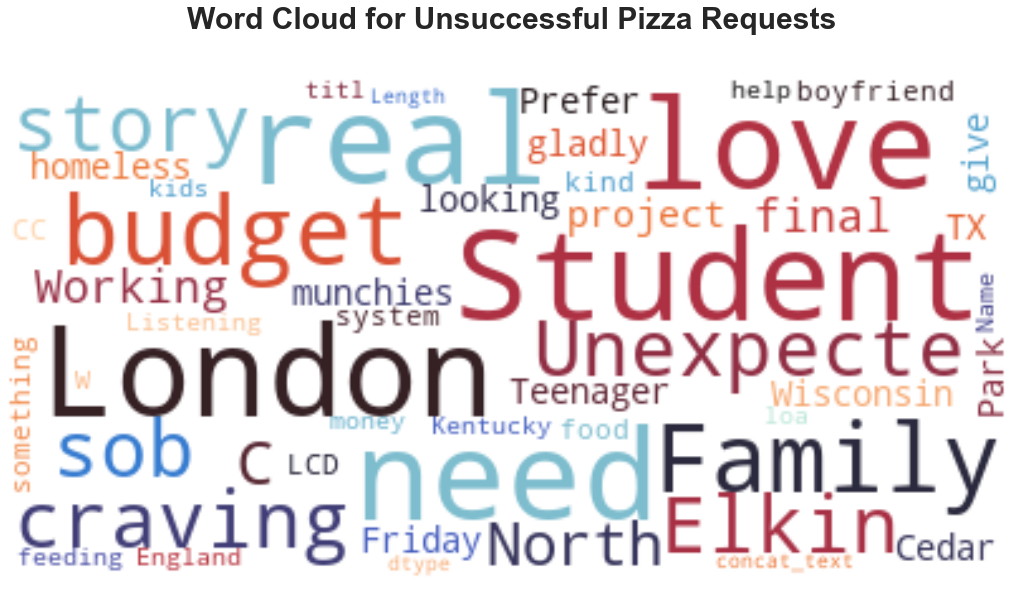

In [206]:
#  Word Cloud of unsuccessful requests

plt.rcParams['font.size']=13        
plt.rcParams['savefig.dpi']=200         
plt.rcParams['figure.subplot.bottom']=.5 


#set word cloud parameters
nopizza_wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=50,
                          max_font_size=50, 
                          random_state=42,  colormap="icefire"
                         ).generate(str(no_pizza_df['concat_text']))

fig = plt.figure(1)
plt.imshow(nopizza_wordcloud, interpolation="bilinear")
plt.title("Word Cloud for Unsuccessful Pizza Requests", fontsize=30, fontweight='bold', pad = 50)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Successful requests had words like "hungry", "broke", "needed", "starving", "holidays", "please". The language seemed more directly related to hunger and food insecurity. "Please" was a very common word, so it seems like being polite and respectful helped people receive pizzas.

Unsuccessful requests had words like "budget", "student", "London", "love", "family". The language seemed to revolve around other factors that are not directly related to hunger.

Both word clouds contain lots of locations and geographical entitites, like "Seattle", "US", "London", etc. Most of these locations came from the request titles.



### Summary of EDA on Textual Data


We see that there is serious data imbalance, since the number of successful requests is almost 1/3 of the number of unsuccessful requests. We will likely have to balance the data before training and fitting the models.

We believe the words and emotion used in a request will heavily determine whether a person will receive a pizza. Thus, we looked at the number of exclamation marks and questions marks in each request and also looked at the sentiment scores of each request. Exclamation marks are more popular across all request types. We can see that the requests that received pizzas have a slightly higher number of exclamation marks and question marks on average. This demonstrates that successful request may be more emphatic in their dialogue by exclaiming more and asking questions. Most requests, however, have no exclamation or question marks in them. Furthermore, we see that most requests have a neutral sentiment. On average, successful requests have slightly lower negative and positive sentiment scores than unsuccessful requests.

In the word clouds, we can see that words directly related to hunger and need are more common in successful pizza requests.




## 1.3 EDA on Non-Textual (Numeric) Data

In this section we will look at non-text metadata to see whether these are potential candidates as additional features to predict request outcome. These data include the time and day the requests where made, activity of the requester at Reddit and in the RAOP channel, and reactions to the post.


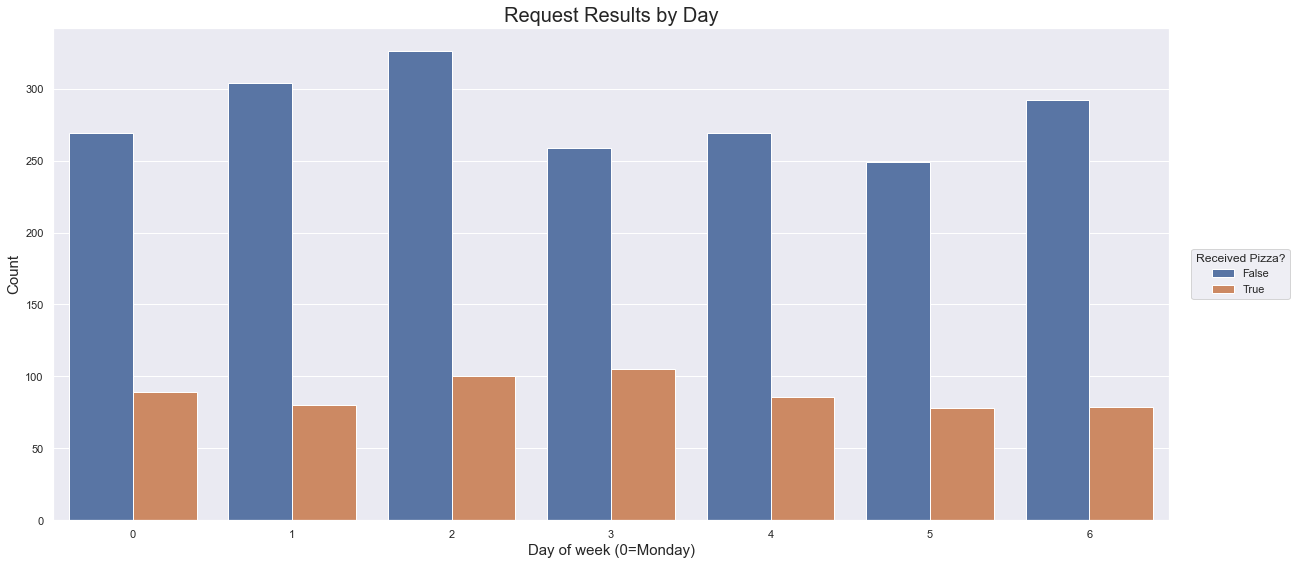

In [207]:
# requests per day: unix_timestamp_of_request_utc

#print(train.unix_timestamp_of_request_utc[0:5])
ts = train['unix_timestamp_of_request_utc'].astype(float)
train['date_time'] = np.asarray(ts, dtype = 'datetime64[s]')
#print(train.date_time[0:5])
train['day_of_week'] = train['date_time'].dt.dayofweek

dev['date_time'] = np.asarray(dev['unix_timestamp_of_request_utc'].astype(float), dtype = 'datetime64[s]')
test['date_time'] = np.asarray(test['unix_timestamp_of_request_utc'].astype(float), dtype = 'datetime64[s]')

dev['day_of_week'] = dev['date_time'].dt.dayofweek
test['day_of_week'] = test['date_time'].dt.dayofweek
#print(train.day_of_week[0:5])
#
sns.set(rc = {'figure.figsize':(20,18)})
# plot counts
sns.countplot(x='day_of_week', hue='requester_received_pizza', data=train)

plt.title("Request Results by Day" ,size = 20)
plt.xlabel("Day of week (0=Monday)", size=15)
plt.ylabel("Count", size=15)
plt.legend( title="Received Pizza?", bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0)


plt.show()


The figure above shows that there are some variations in the number of pizzas being given out according to the day of the week. There seems to be more pizza given out on Wednesdays and Thursdays compared to other days of the week, and fewest on weekends. 


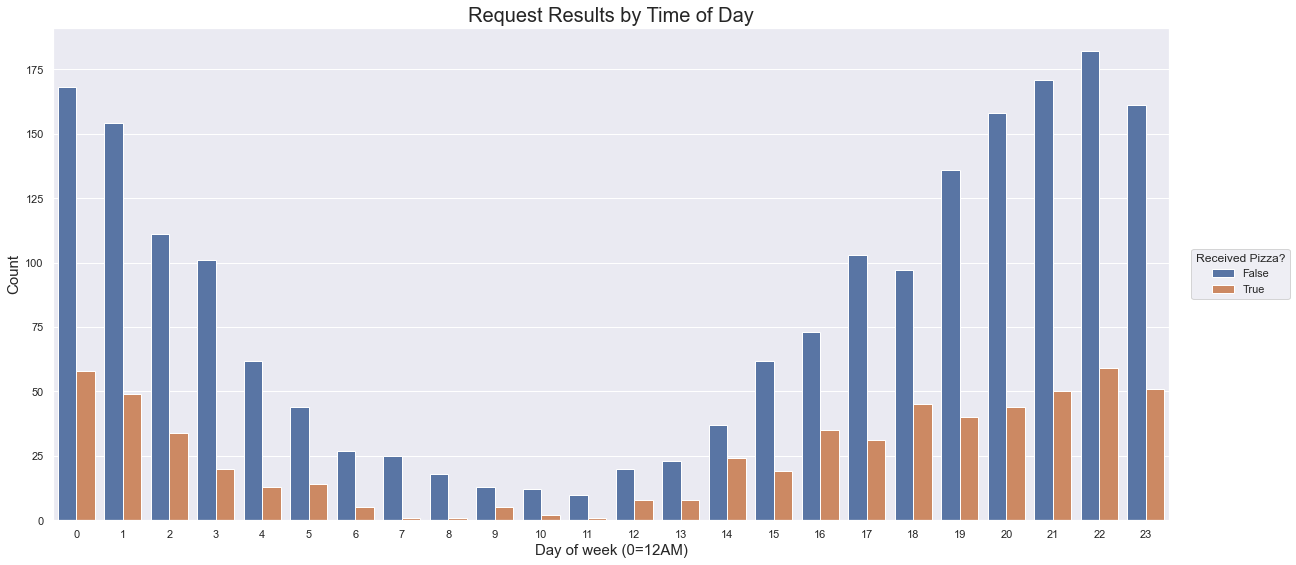

In [208]:
# requests by time of day: unix_timestamp_of_request_utc

train['time_of_day'] = train['date_time'].dt.hour

#apply on test and dev set
dev['time_of_day'] = dev['date_time'].dt.hour
test['time_of_day'] = test['date_time'].dt.hour

#print(train.time_of_day[0:5])

sns.set(rc = {'figure.figsize':(20,18)})

# plot counts
sns.countplot(x='time_of_day', hue='requester_received_pizza', data=train)
plt.title("Request Results by Time of Day" ,size = 20)
plt.xlabel("Day of week (0=12AM)", size=15)
plt.ylabel("Count", size=15)
plt.legend( title="Received Pizza?", bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0)


plt.show()



The figure above shows that the number of successful requests also vary by time of day. However, this is also driven by the number of total requests in a given hour.


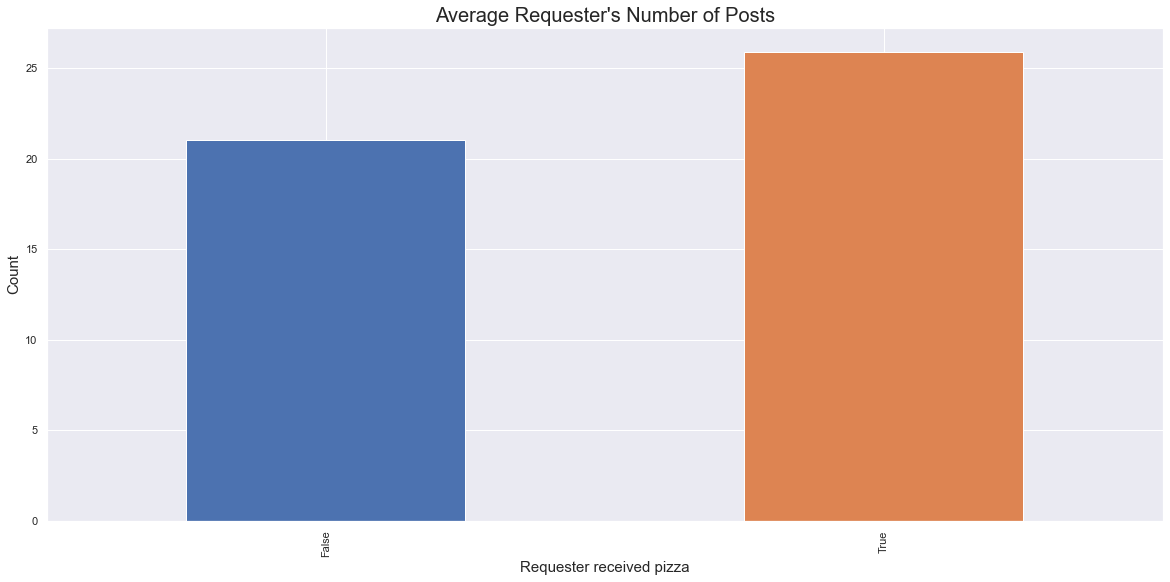

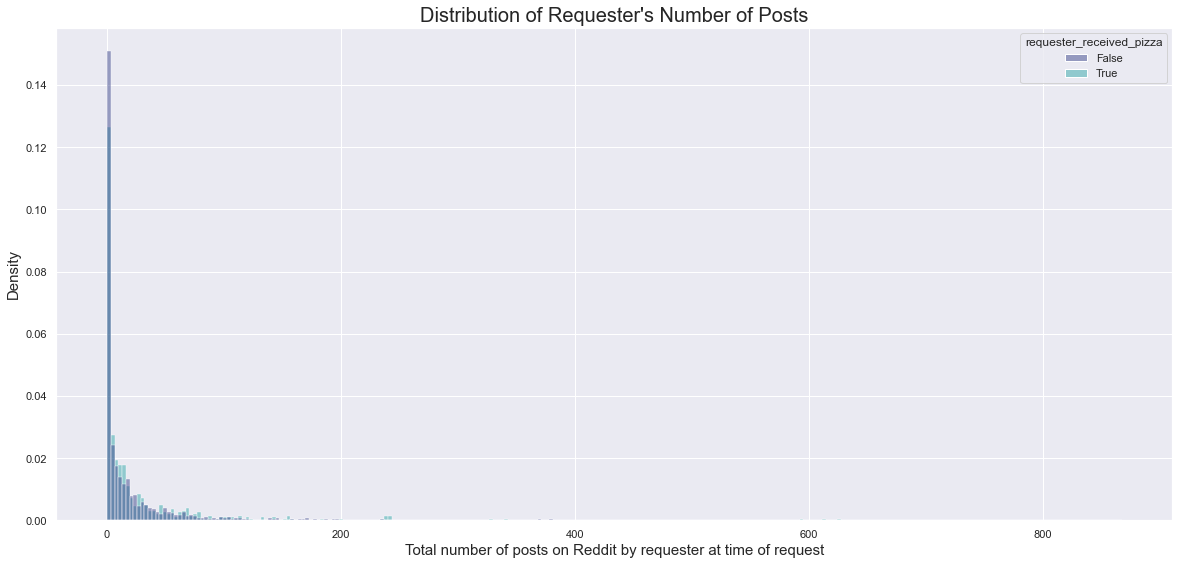

,count,mean,std,min,25%,50%,75%,max
requester_received_pizza,,,,,,,,
False,1968.0,21.017276,51.671902,0.0,0.0,4.0,21.0,867.0
True,617.0,25.923825,58.990994,0.0,1.0,7.0,26.0,627.0


Number of zeros: 772 (29.86 percent)


requester_received_pizza
False    631
True     141
Name: 0, dtype: int64

In [209]:
# requester number of posts: requester_number_of_posts_at_request

sns.set(rc = {'figure.figsize':(20,18)})
# plot bar chart
train.groupby('requester_received_pizza').requester_number_of_posts_at_request.mean().plot(kind='bar', color=['C0', 'C1'])
plt.title("Average Requester's Number of Posts" ,size = 20)
plt.xlabel("Requester received pizza", size=15)
plt.ylabel("Count", size=15)
plt.show()

# plot histogram
sns.histplot(data=train, x="requester_number_of_posts_at_request", hue="requester_received_pizza", stat="density", common_norm=False, palette = "mako")

plt.title("Distribution of Requester's Number of Posts" ,size = 20)
plt.xlabel("Total number of posts on Reddit by requester at time of request", size=15)
plt.ylabel("Density", size=15)

plt.show()

# describe
summ = train.groupby('requester_received_pizza').requester_number_of_posts_at_request.describe()
display(summ)

# zeros

n_zeros=train.requester_number_of_posts_at_request.size-np.count_nonzero(train.requester_number_of_posts_at_request)
print("Number of zeros: %d (%0.2f percent)" %(n_zeros, n_zeros/train.requester_number_of_posts_at_request.size*100))

n_zeros_group = train.groupby('requester_received_pizza').requester_number_of_posts_at_request.value_counts().unstack(fill_value=0).loc[:,0]
n_zeros_group

The average number of posts on Reddit by the requester, a proxy for active participation in Reddit, is higher for successful requests at 26 compared to 21. The difference is lower for the median which is not affected by the outliers. 


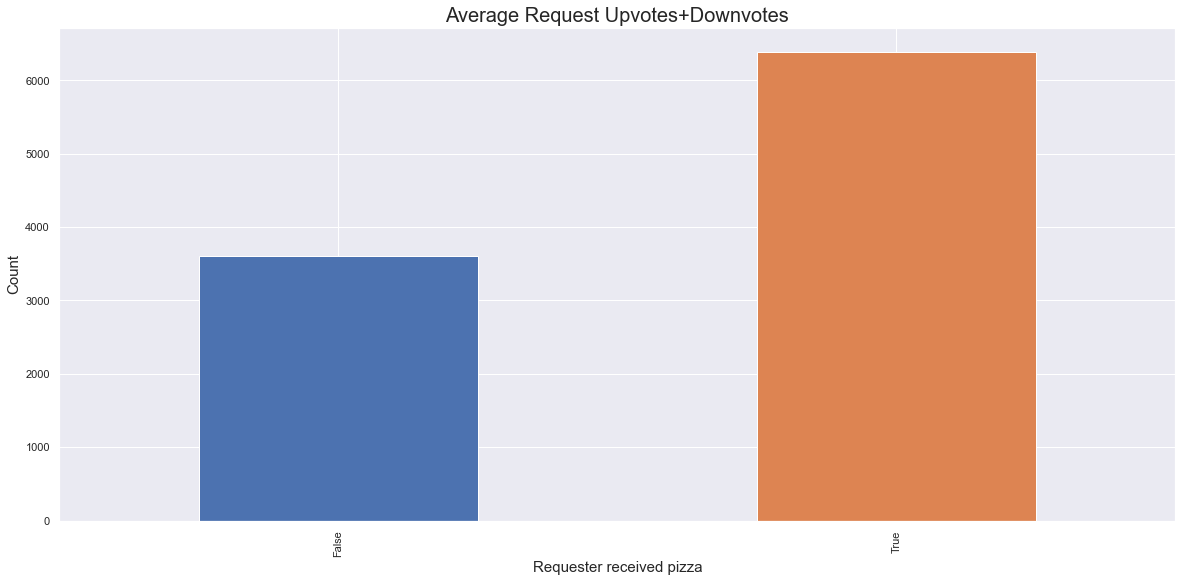

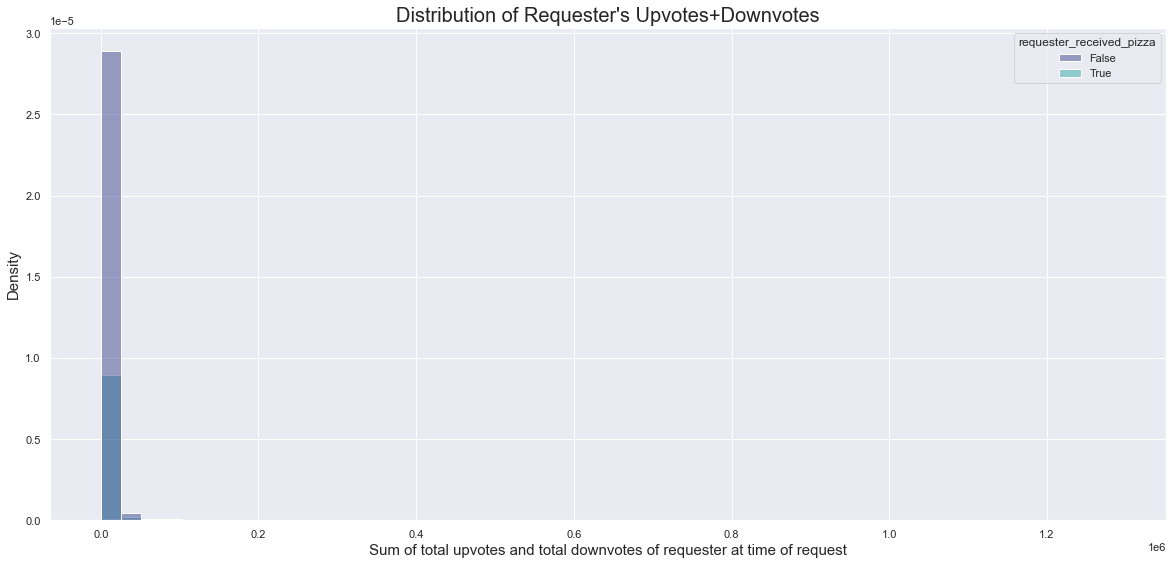

,count,mean,std,min,25%,50%,75%,max
requester_received_pizza,,,,,,,,
False,1968.0,3610.211382,20883.708770,0.0,4.0,267.5,2165.25,789287.0
True,617.0,6394.165316,53312.040426,0.0,62.0,595.0,3332.00,1286864.0


Number of zeros: 473 (18.30 percent)


requester_received_pizza
False    397
True      76
Name: 0, dtype: int64

In [210]:
# number of upvotes + downvotes: requester_upvotes_plus_downvotes_at_request


sns.set(rc = {'figure.figsize':(20,18)})
# plot bar chart
train.groupby('requester_received_pizza').requester_upvotes_plus_downvotes_at_request.mean().plot(kind='bar', color=['C0', 'C1'])
plt.title("Average Request Upvotes+Downvotes" ,size = 20)
plt.xlabel("Requester received pizza", size=15)
plt.ylabel("Count", size=15)
plt.show()

# plot histogram
sns.histplot(data=train, x="requester_upvotes_plus_downvotes_at_request", bins=50, hue="requester_received_pizza", stat="density", palette = "mako")


# f.fig.set_size_inches(15,8)
plt.title("Distribution of Requester's Upvotes+Downvotes" ,size = 20)
plt.xlabel("Sum of total upvotes and total downvotes of requester at time of request", size=15)
plt.ylabel("Density", size=15)

plt.show()

# describe
summ = train.groupby('requester_received_pizza').requester_upvotes_plus_downvotes_at_request.describe()
display(summ)

# zeros
n_zeros=np.count_nonzero(train.requester_upvotes_plus_downvotes_at_request==0)
print("Number of zeros: %d (%0.2f percent)" %(n_zeros, n_zeros/train.requester_upvotes_plus_downvotes_at_request.size*100))

n_zeros_group = train.groupby('requester_received_pizza').requester_upvotes_plus_downvotes_at_request.value_counts().unstack(fill_value=0).loc[:,0]
n_zeros_group

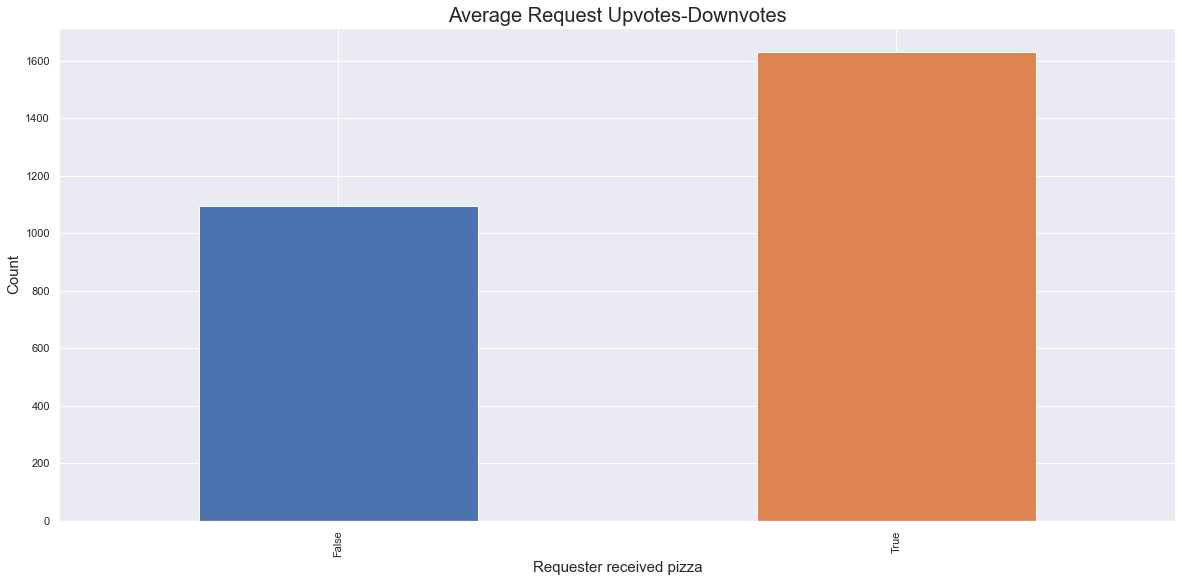

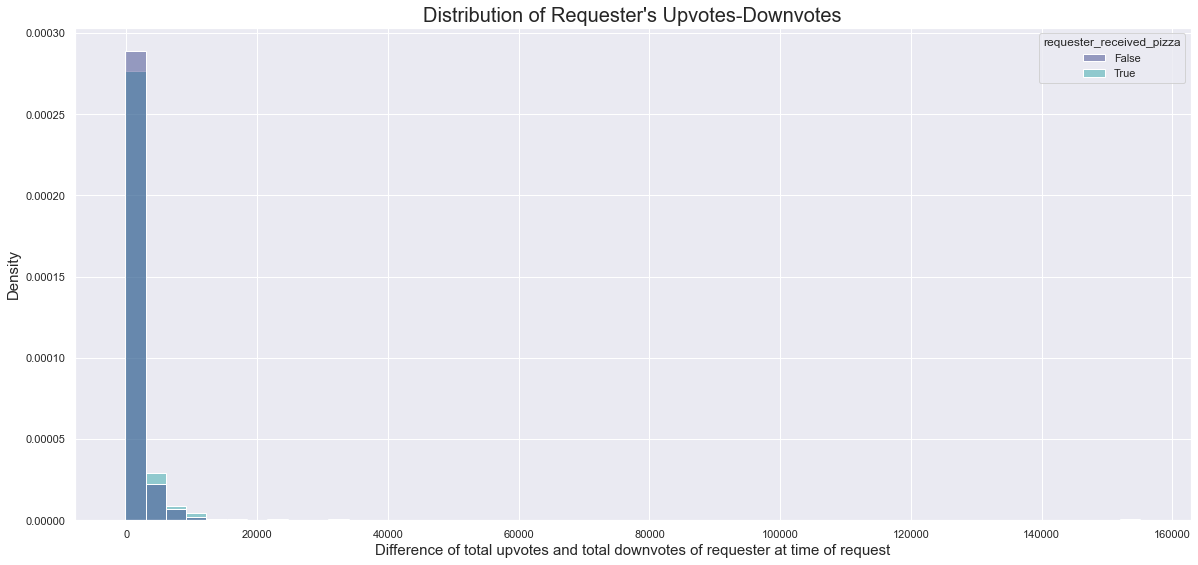

,count,mean,std,min,25%,50%,75%,max
requester_received_pizza,,,,,,,,
False,1968.0,1095.460366,3267.669049,-173.0,1.0,129.5,1077.5,87911.0
True,617.0,1631.792545,6737.261545,-39.0,29.0,316.0,1689.0,155010.0


Number of zeros: 499 (19.30 percent)


requester_received_pizza
False    422
True      77
Name: 0, dtype: int64

In [211]:
# number of upvotes - downvotes: requester_upvotes_minus_downvotes_at_request

sns.set(rc = {'figure.figsize':(20,18)})
# plot bar chart
train.groupby('requester_received_pizza').requester_upvotes_minus_downvotes_at_request.mean().plot(kind='bar', color=['C0', 'C1'])
plt.title("Average Request Upvotes-Downvotes" ,size = 20)
plt.xlabel("Requester received pizza", size=15)
plt.ylabel("Count", size=15)
plt.show()

# plot histogram
sns.histplot(data=train, x="requester_upvotes_minus_downvotes_at_request", bins=50, hue="requester_received_pizza", common_norm=False, stat="density", palette = "mako")

# f.fig.set_size_inches(15,8)
plt.title("Distribution of Requester's Upvotes-Downvotes" ,size = 20)
plt.xlabel("Difference of total upvotes and total downvotes of requester at time of request", size=15)
plt.ylabel("Density", size=15)

plt.show()

# describe
summ = train.groupby('requester_received_pizza').requester_upvotes_minus_downvotes_at_request.describe()
display(summ)

# zeros
n_zeros=np.count_nonzero(train.requester_upvotes_minus_downvotes_at_request==0)
print("Number of zeros: %d (%0.2f percent)" %(n_zeros, n_zeros/train.requester_upvotes_minus_downvotes_at_request.size*100))

n_zeros_group = train.groupby('requester_received_pizza').requester_upvotes_minus_downvotes_at_request.value_counts().unstack(fill_value=0).loc[:,0]
n_zeros_group

The number of total reactions (upvotes plus downvotes) and net reaction (upvotes minus downvotes) seem to correlate with the success of requests. The average number of total and net reactions for successful requests is almost twice as that of failed requests. This is the same for the median as well.

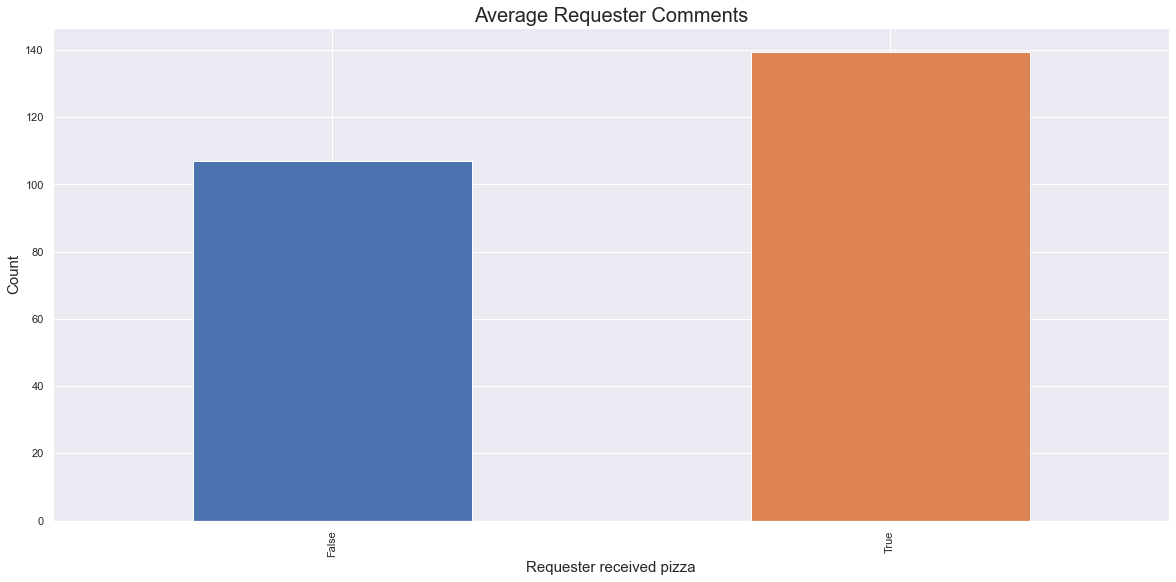

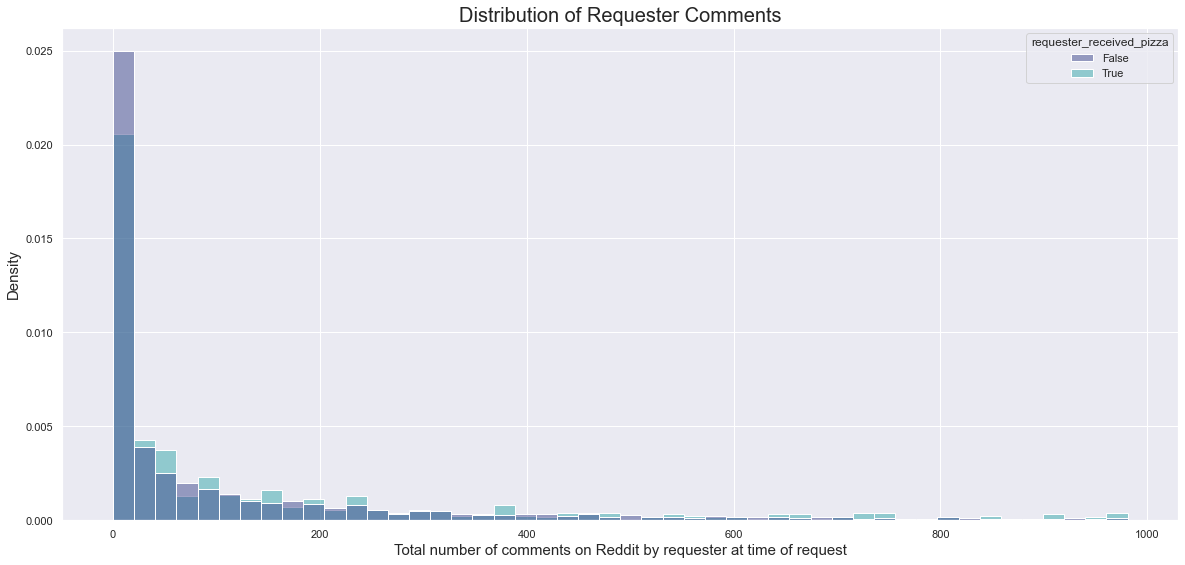

,count,mean,std,min,25%,50%,75%,max
requester_received_pizza,,,,,,,,
False,1968.0,107.029472,184.211744,0.0,0.0,18.0,128.0,981.0
True,617.0,139.554295,217.455520,0.0,1.0,39.0,179.0,981.0


Number of zeros: 807 (31.22 percent)


requester_received_pizza
False    656
True     151
Name: 0, dtype: int64

In [212]:
# number of comments at request: requester_number_of_comments_at_request

sns.set(rc = {'figure.figsize':(20,18)})
# plot bar chart
train.groupby('requester_received_pizza').requester_number_of_comments_at_request.mean().plot(kind='bar', color=['C0', 'C1'])
plt.title("Average Requester Comments" ,size = 20)
plt.xlabel("Requester received pizza", size=15)
plt.ylabel("Count", size=15)
plt.show()

# plot histogram
sns.histplot(data=train, x="requester_number_of_comments_at_request", hue="requester_received_pizza", common_norm=False, stat="density", palette = "mako")

# f.fig.set_size_inches(15,8)
plt.title("Distribution of Requester Comments" ,size = 20)
plt.xlabel("Total number of comments on Reddit by requester at time of request", size=15)
plt.ylabel("Density", size=15)

plt.show()

# describe
summ = train.groupby('requester_received_pizza').requester_number_of_comments_at_request.describe()
display(summ)

# zeros
n_zeros=np.count_nonzero(train.requester_number_of_comments_at_request==0)
print("Number of zeros: %d (%0.2f percent)" %(n_zeros, n_zeros/train.requester_number_of_comments_at_request.size*100))

n_zeros_group = train.groupby('requester_received_pizza').requester_number_of_comments_at_request.value_counts().unstack(fill_value=0).loc[:,0]
n_zeros_group

More successful requests were from requesters who are relatively more active at Reddit based on the number of comments they have posted at the time of request. This is reflected in both the mean and median of the distribution.

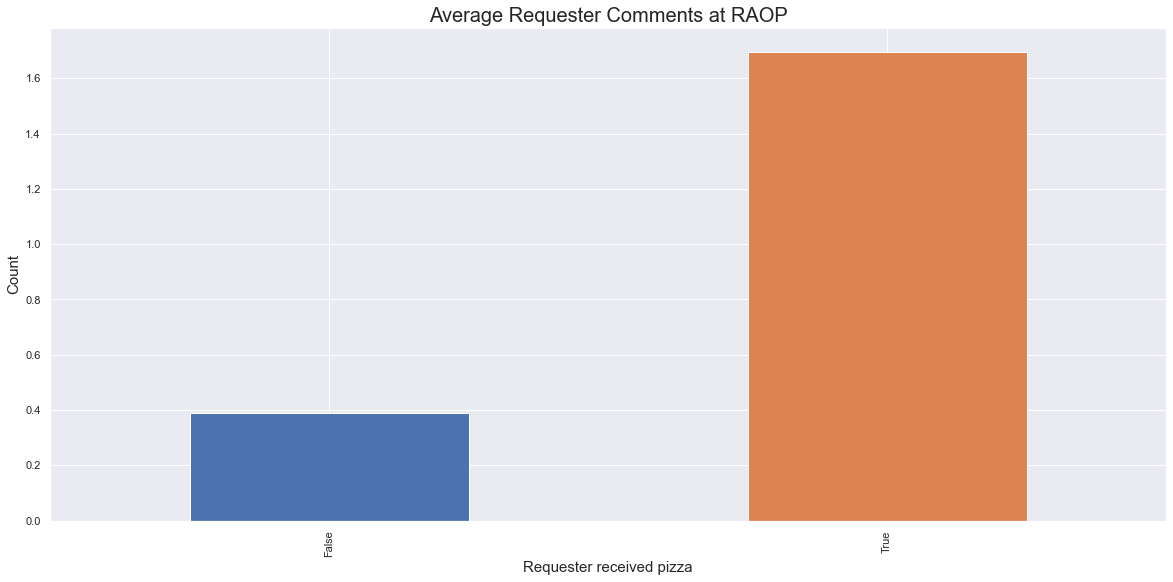

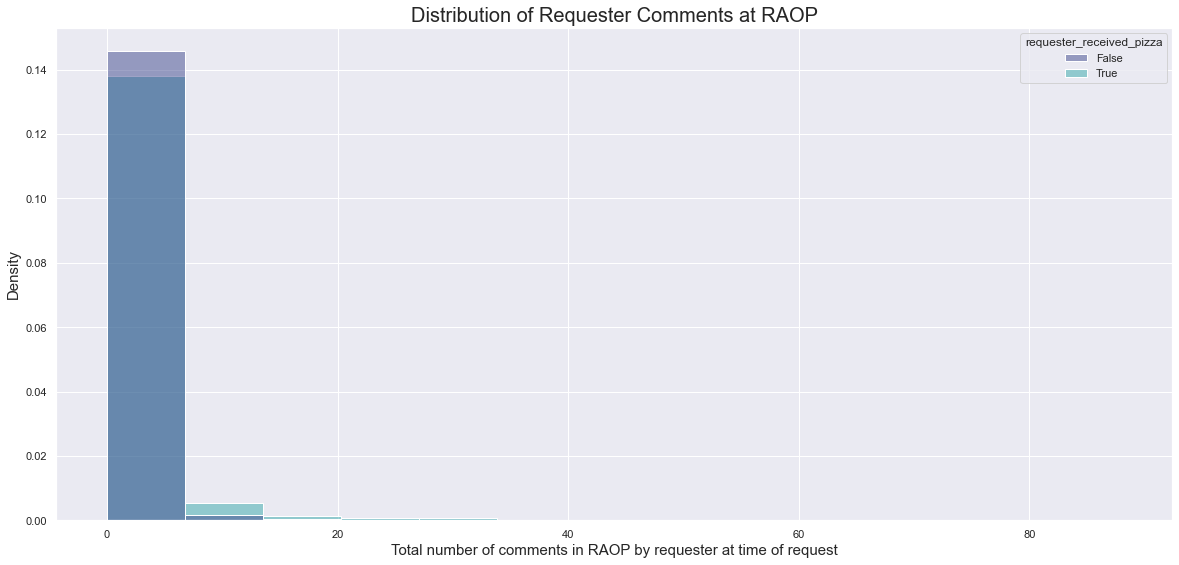

,count,mean,std,min,25%,50%,75%,max
requester_received_pizza,,,,,,,,
False,1968.0,0.390244,2.123571,0.0,0.0,0.0,0.0,52.0
True,617.0,1.696921,6.987039,0.0,0.0,0.0,0.0,88.0


Number of zeros: 2220 (85.88 percent)


requester_received_pizza
False    1744
True      476
Name: 0, dtype: int64

In [213]:
# requester number of posts_raop: requester_number_of_comments_in_raop_at_request

sns.set(rc = {'figure.figsize':(20,18)})
# plot bar chart
train.groupby('requester_received_pizza').requester_number_of_comments_in_raop_at_request.mean().plot(kind='bar',color=['C0', 'C1'])
plt.title("Average Requester Comments at RAOP" ,size = 20)
plt.xlabel("Requester received pizza", size=15)
plt.ylabel("Count", size=15)
plt.show()

# plot histogram
sns.histplot(data=train, x="requester_number_of_comments_in_raop_at_request", hue="requester_received_pizza", common_norm=False, stat="density", palette = "mako")
plt.title("Distribution of Requester Comments at RAOP" ,size = 20)
plt.xlabel("Total number of comments in RAOP by requester at time of request", size=15)
plt.ylabel("Density", size=15)

plt.show()

# describe
summ = train.groupby('requester_received_pizza').requester_number_of_comments_in_raop_at_request.describe()
display(summ)

# zeros
n_zeros=np.count_nonzero(train.requester_number_of_comments_in_raop_at_request==0)
print("Number of zeros: %d (%0.2f percent)" %(n_zeros, n_zeros/train.requester_number_of_comments_in_raop_at_request.size*100))

n_zeros_group = train.groupby('requester_received_pizza').requester_number_of_comments_in_raop_at_request.value_counts().unstack(fill_value=0).loc[:,0]
n_zeros_group


The information on requester's comments at the RAOP channel is sparse where 85% of requesters did not have prior comments at RAOP. This may not be a good candidate as a feature for prediction.

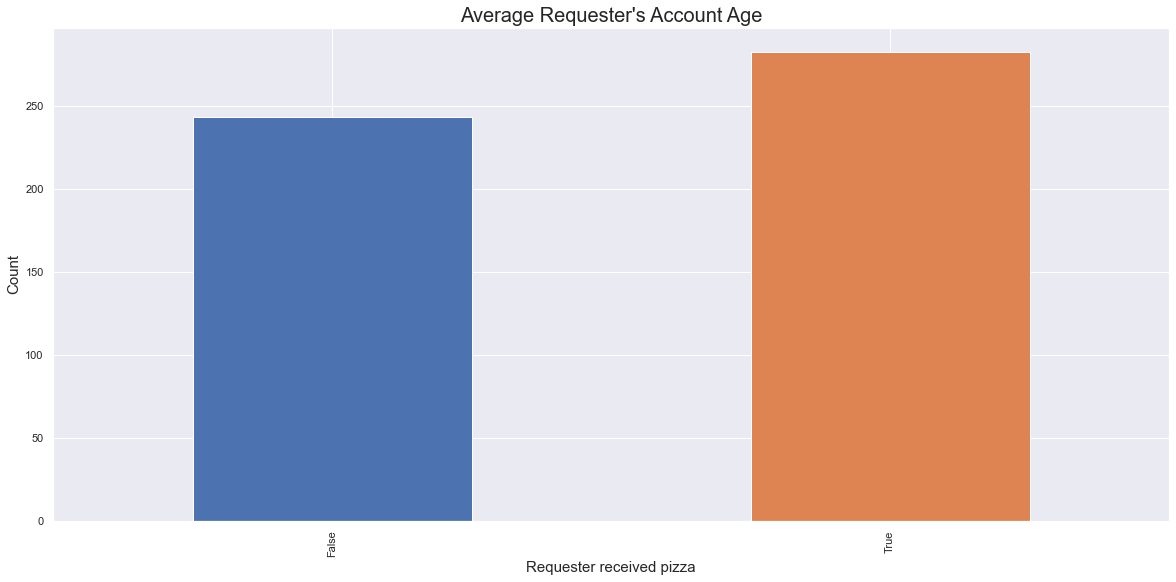

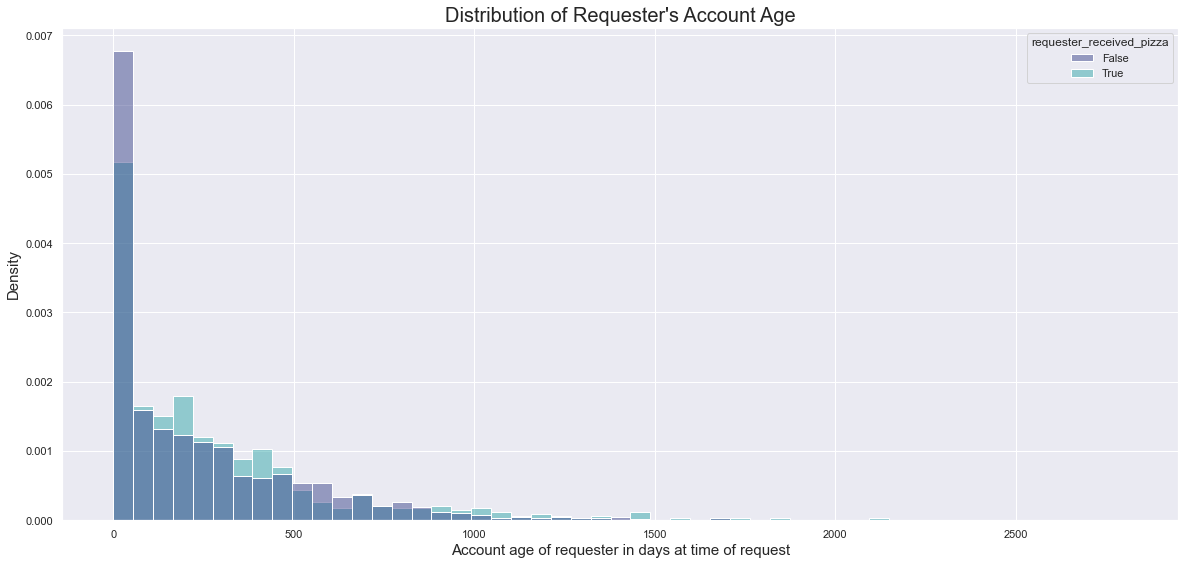

,count,mean,std,min,25%,50%,75%,max
requester_received_pizza,,,,,,,,
False,1968.0,242.970167,301.966270,0.0,0.000000,139.878860,377.137049,2809.750787
True,617.0,282.574893,324.879456,0.0,41.967685,189.841169,397.100810,2124.362650


Number of zeros: 590 (22.82 percent)


requester_received_pizza
False    502
True      88
Name: 0.0, dtype: int64

In [214]:
# requester account age: requester_account_age_in_days_at_request

sns.set(rc = {'figure.figsize':(20,18)})
# plot bar chart
train.groupby('requester_received_pizza').requester_account_age_in_days_at_request.mean().plot(kind='bar', color=['C0', 'C1'])
plt.title("Average Requester's Account Age" ,size = 20)
plt.xlabel("Requester received pizza", size=15)
plt.ylabel("Count", size=15)
plt.show()

# plot histogram
sns.histplot(data=train, x="requester_account_age_in_days_at_request", hue="requester_received_pizza", common_norm=False, stat="density", palette = "mako")
plt.title("Distribution of Requester's Account Age" ,size = 20)
plt.xlabel("Account age of requester in days at time of request", size=15)
plt.ylabel("Density", size=15)

plt.show()

# describe
summ = train.groupby('requester_received_pizza').requester_account_age_in_days_at_request.describe()
display(summ)

# zeros
n_zeros=np.count_nonzero(train.requester_account_age_in_days_at_request==0)
print("Number of zeros: %d (%0.2f percent)" %(n_zeros, n_zeros/train.requester_account_age_in_days_at_request.size*100))

n_zeros_group = train.groupby('requester_received_pizza').requester_account_age_in_days_at_request.value_counts().unstack(fill_value=0).loc[:,0]
n_zeros_group


There is not much variation in the success or failure of request based on the age of the requester's account at Reddit. Theis may not be a good candidate for a feature for prediction.

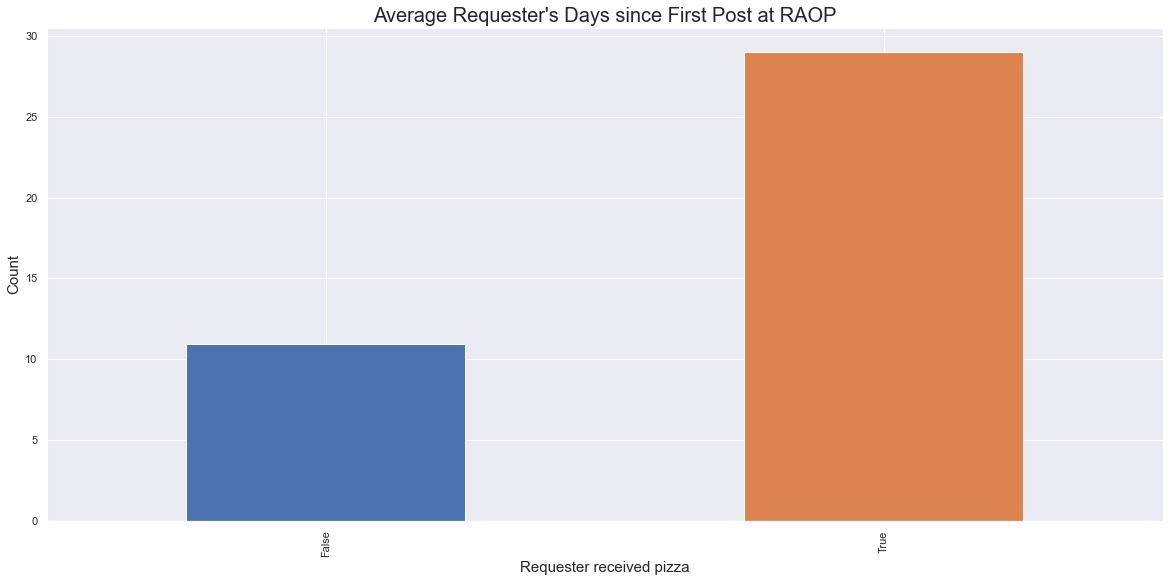

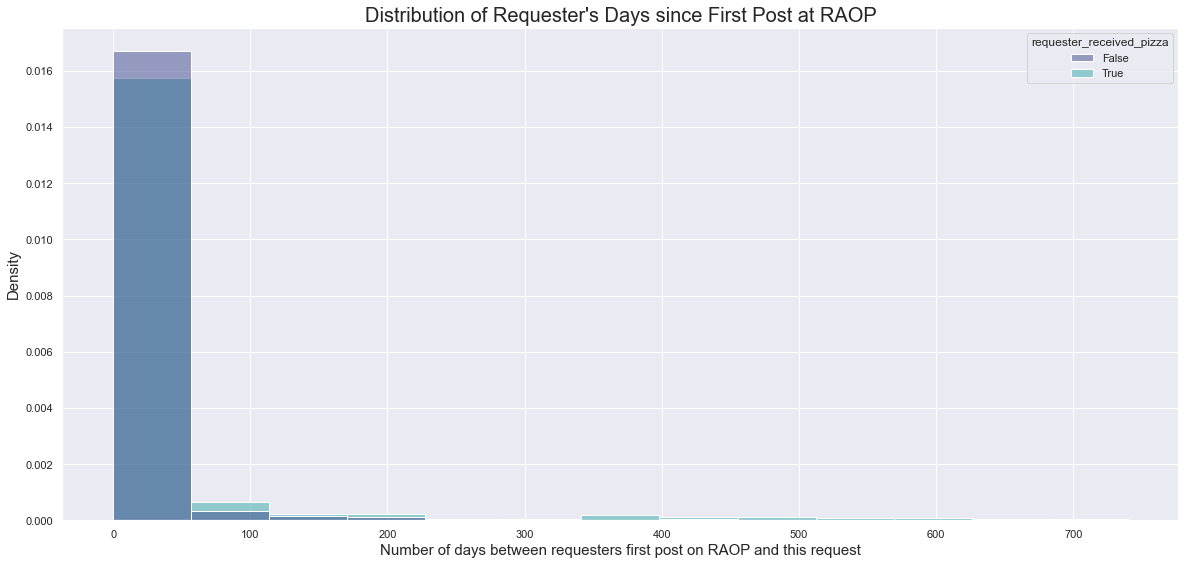

,count,mean,std,min,25%,50%,75%,max
requester_received_pizza,,,,,,,,
False,1968.0,10.952289,53.643922,0.0,0.0,0.0,0.0,739.771007
True,617.0,29.049898,99.881745,0.0,0.0,0.0,0.0,689.326713


Number of zeros: 2179 (84.29 percent)


requester_received_pizza
False    1713
True      466
Name: 0.0, dtype: int64

In [215]:
# 'requester_days_since_first_post_on_raop_at_request'

sns.set(rc = {'figure.figsize':(20,18)})
# plot bar chart
train.groupby('requester_received_pizza').requester_days_since_first_post_on_raop_at_request.mean().plot(kind='bar', color=['C0', 'C1'])
plt.title("Average Requester's Days since First Post at RAOP" ,size = 20)
plt.xlabel("Requester received pizza", size=15)
plt.ylabel("Count", size=15)
plt.show()

# plot histogram
sns.histplot(data=train, x="requester_days_since_first_post_on_raop_at_request", hue="requester_received_pizza", common_norm=False, stat="density", palette = "mako")
plt.title("Distribution of Requester's Days since First Post at RAOP" ,size = 20)
plt.xlabel("Number of days between requesters first post on RAOP and this request", size=15)
plt.ylabel("Density", size=15)

plt.show()

# describe
summ = train.groupby('requester_received_pizza').requester_days_since_first_post_on_raop_at_request.describe()
display(summ)

# zeros
n_zeros=np.count_nonzero(train.requester_days_since_first_post_on_raop_at_request==0)
print("Number of zeros: %d (%0.2f percent)" %(n_zeros, n_zeros/train.requester_days_since_first_post_on_raop_at_request.size*100))

n_zeros_group = train.groupby('requester_received_pizza').requester_days_since_first_post_on_raop_at_request.value_counts().unstack(fill_value=0).loc[:,0]
n_zeros_group


The information on the day since the requester post at the RAOP channel is sparse where 84% of requesters did not have prior post at RAOP.

Text(0.5, 1.0, 'Correlation matrix of potential non-text features')

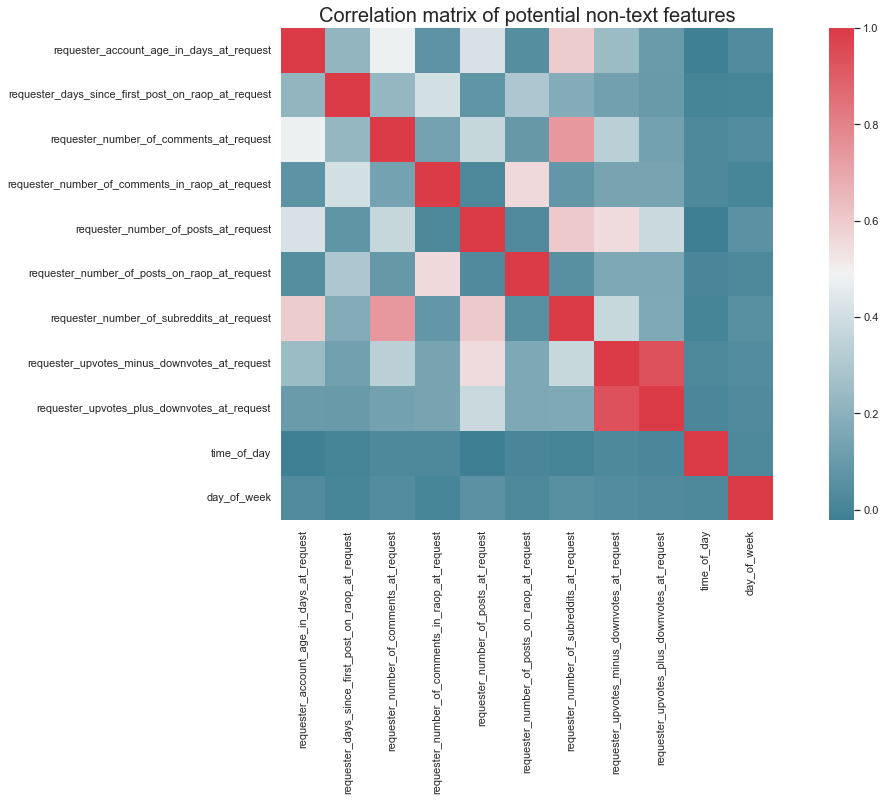

In [216]:
## Correlations

# Add Title 

non_text_features = [
      'requester_account_age_in_days_at_request',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_subreddits_at_request',
       'requester_subreddits_at_request',
       'requester_upvotes_minus_downvotes_at_request',
       'requester_upvotes_plus_downvotes_at_request', 
       'time_of_day', 'day_of_week']
f, ax = plt.subplots()
corr = train[non_text_features].corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.title("Correlation matrix of potential non-text features" ,size = 20)



The correlation matrix above shows that the the total reaction (upvotes plus downvotes) is highly correlated with the reactions (upvotes minus downvotes). It may be prudent to use just one of these as features in the predictive models.

Similarly, the number of comments of the requester is highly correlated with number of subreddits. Both reflect how active the requestor is on Reddit.

### Summary of EDA on Non-Textual (Numeric) Data

In this section we looked at the distribution of requests by time and day, request reactions (such as upvotes, downvotes, and comments), and requestor activity (such as number of posts in the RAOP channel or in Reddit in gereral and age of account) to identify potential features for prediction. We note the skewness and sparseness of the data and their correlation with the success or failure of the request. We observed that: 

1. There are some variations in the number of pizzas being given out according to the day of the week. There seems to be more pizza given out on Wednesdays and Thursdays compared to other days of the week, and fewest on weekends. 
2. The number of successful requests also vary by time of day. However, this is also driven by the number of total requests in a given hour.
3. The average number of posts on Reddit by the requester, a proxy for active participation in Reddit, is higher for successful requests. 
4. The number of total reactions (upvotes plus downvotes) and net reaction (upvotes minus downvotes) seem to correlate with the success of requests. The average number of total and net reactions for successful requests is almost twice as that of failed requests. 
5. More successful requests were from requesters who are relatively more active at Reddit based on the number of comments they have posted at the time of request. 
6. The information on requester's comments at the RAOP channel, age of the requester's account at Reddit, the day since the requester post at the RAOP channel is sparse. These may not be good feature candidates.

We also present a correlation matrix that shows that the the total reaction (upvotes plus downvotes) is highly correlated with the reactions (upvotes minus downvotes) suggesting to use just one of these as features in the models. Similarly, the number of comments of the requester is highly correlated with number of subreddits. Both features reflect how active the requestor is on Reddit.

In summary, non-textual metadata may be used to increase the predictive power of the models given observable relationship with the success/failure of requests. However, some of these features are highly sparsed and skewed. Some transformations may be necessary, such as trandforming into binary values.

## Data Cleaning

In [217]:
def remove_feature(df, feature_list_to_drop):
    if isinstance(feature_list_to_drop, list):
        df_new = df.drop(feature_list_to_drop, axis = 1)
       
    return df_new

# Natalie Ahn: https://github.com/MIDS-W207/coursework
#/blob/master/Natalie/Week5
#/linear_and_logistic_regression.ipynb


def print_metrics(test_name, y_true, y_pred):
    print('%s: accuracy = %.4f, precision = %.4f, recall = %.4f, f1 = %.4f'
          % (test_name,
             metrics.accuracy_score(y_true, y_pred),
             metrics.precision_score(y_true, y_pred),
             metrics.recall_score(y_true, y_pred),
             metrics.f1_score(y_true, y_pred)))



In [218]:
train.columns

Index(['giver_username_if_known',
       'number_of_downvotes_of_request_at_retrieval',
       'number_of_upvotes_of_request_at_retrieval', 'post_was_edited',
       'request_id', 'request_number_of_comments_at_retrieval', 'request_text',
       'request_text_edit_aware', 'request_title',
       'requester_account_age_in_days_at_request',
       'requester_account_age_in_days_at_retrieval',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_days_since_first_post_on_raop_at_retrieval',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_at_retrieval',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_comments_in_raop_at_retrieval',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_at_retrieval',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_posts_on_raop_at_retrieval',
       'requester_number_of_subreddits_at_request', 'r

We came up with an initial list of features we think are significant in determining pizza request success.

In [219]:
# initial list of features we think are significant in determining pizza request success
features_list = ['concat_text', 
      'requester_account_age_in_days_at_request',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_subreddits_at_request',
       'requester_subreddits_at_request',
       'requester_upvotes_minus_downvotes_at_request',
       'requester_upvotes_plus_downvotes_at_request', 
       'time_of_day', 'day_of_week',
       'num_exclam', 'num_quest',
        'neg_sent', 'pos_sent', 'neut_sent']

In [220]:
# get labels for each set
train_labels = train.received_pizza_bin
#print(train_labels)
train_data = train[['concat_text']]
#train_data
dev_labels = dev.received_pizza_bin
#print(dev_labels)
dev_data = dev[['concat_text']]
#dev_data
test_labels = test.received_pizza_bin
#print(test_labels)
test_data = test[['concat_text']]
#test_data

In [221]:
nltk.download('stopwords', quiet=True)

# get stop words list
stop_words = nltk.corpus.stopwords.words('english')

# stemmer = nltk.stem.porter.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# preproccesing function 
nltk.download('words')
from nltk.corpus import words as eng_words

english_words = eng_words.words()

# first preproccesing function 
def preprocess(t):
    """
    Function to preprocess text
    """
    
    # lowercase
    text = t.lower()
    # clean text
    text = re.sub("[^0-9a-zA-Z]+", " ", text)
    
    # lemmatize verbs only
    split_text = text.split()
    text  = " ".join([lemmatizer.lemmatize(word, 'v') for word in split_text]) 

    # split text into words
    words = text.split()
    # remove stop words 
    cleaned_words = [w for w in words if w not in stop_words and w in english_words]
    
    # join words together back into full text
    fin_text = " ".join(cleaned_words)

    return fin_text

  

[nltk_data] Downloading package words to /Users/ericling/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [222]:
# clean the input text for transformer vectorization: train_data_cleaned, dev_data_cleaned, test_data_cleaned
train_data_cleaned = []
for i in range(train_data.shape[0]):
    train_data_cleaned.append( preprocess(train_data.concat_text.iloc[i]))
#train_data_cleaned[0]

dev_data_cleaned = []
for i in range(dev_data.shape[0]):
    dev_data_cleaned.append( preprocess(dev_data.concat_text.iloc[i]))

test_data_cleaned = []
for i in range(test_data.shape[0]):
    test_data_cleaned.append( preprocess(test_data.concat_text.iloc[i]))

In [223]:
#vectorize the words using the preprocessor
vectorizer = TfidfVectorizer(preprocessor = preprocess)
vectorizer.fit(train_data['concat_text'] )

train_vec = vectorizer.transform(train_data['concat_text'] )
dev_vec = vectorizer.transform(dev_data['concat_text'])
test_vec = vectorizer.transform(test_data['concat_text'])



In [224]:
#only select numeric features for train
numeric_df_train = remove_feature(train[features_list], 
              ['concat_text', 'requester_subreddits_at_request'])
numeric_df_train = numeric_df_train.values

# concatenate numeric features and text words
numeric_text_features_train = np.concatenate((train_vec.toarray().tolist(),
                                              list(numeric_df_train)),
                                              axis = 1)
print(numeric_text_features_train.shape)
print(numeric_df_train.shape)
print(train_vec.shape)

(2585, 5186)
(2585, 16)
(2585, 5170)


In [225]:
#only select numeric features for dev data
numeric_df_dev = remove_feature(dev[features_list], 
              ['concat_text', 'requester_subreddits_at_request'])
numeric_df_dev = numeric_df_dev.values

# concatenate numeric features and text words
numeric_text_features_dev = np.concatenate((dev_vec.toarray().tolist(),
                                              list(numeric_df_dev)),
                                              axis = 1)
print(numeric_text_features_dev.shape)
print(numeric_df_dev.shape)
print(dev_vec.shape)

(808, 5186)
(808, 16)
(808, 5170)


In [226]:
#only select numeric features for test data
numeric_df_test = remove_feature(test[features_list], 
              ['concat_text', 'requester_subreddits_at_request'])
numeric_df_test = numeric_df_test.values

# concatenate numeric features and text words
numeric_text_features_test = np.concatenate((test_vec.toarray().tolist(),
                                              list(numeric_df_test)),
                                              axis = 1)
print(numeric_text_features_test.shape)
print(numeric_df_test.shape)
print(test_vec.shape)

(647, 5186)
(647, 16)
(647, 5170)


We have more Unsuccessful requests (False) than Successful requests (True), so we use SMOTE to upsample the Successful requests in order to balance the data.

In [227]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Before SMOTE oversampling to create more successful values: '
      , Counter(train_labels))
oversample = SMOTE()
X, y = oversample.fit_resample(numeric_text_features_train, train_labels)
print ('After SMOTE, the new balanced dataset. Equal success and failure: ',
       Counter(y))

train_vec_balanced = X
train_labels_balanced = y

Before SMOTE oversampling to create more successful values:  Counter({0: 1968, 1: 617})
After SMOTE, the new balanced dataset. Equal success and failure:  Counter({0: 1968, 1: 1968})


## 1.4 Baseline Models with both Numeric (Non-Textual) and Textual Features

In this section we do exploration using both numeric (non-textual) and textual features in order to find a decent baseline model.

In [228]:
# normalize and scale the features

from sklearn import preprocessing

#scale 
scaler = preprocessing.StandardScaler()
numeric_text_features_scaled_train = \
  scaler.fit_transform(numeric_text_features_train)

numeric_text_features_scaled_dev = \
  scaler.transform(numeric_text_features_dev)

numeric_text_features_scaled_test = \
  scaler.transform(numeric_text_features_test)



### Logistic Regression

The C values were optimized through separate exploration.

**Logistic Regression model that uses the in-built balancing function.**
- Includes both Numeric and Text features.

In [229]:
#model uses the logistic regression's in-built balancing
for C in [ 0.001]:
    lr_inbuilt_balanced = LogisticRegression(C=C, solver="liblinear", multi_class="auto",
                          class_weight = 'balanced')
    lr_inbuilt_balanced.fit (numeric_text_features_scaled_train, train_labels)

    dev_pred = lr_inbuilt_balanced.predict(numeric_text_features_scaled_dev)
    train_pred = lr_inbuilt_balanced.predict(numeric_text_features_scaled_train)

    print_metrics('tfidf model f1 score, train data: ', train_labels, 
                train_pred)
    print_metrics('tfidf model f1 score, dev data: ', dev_labels, 
                dev_pred)

    # error analysis with confusion matrix see what's misclassified
    print('train confusion matrix:\n',confusion_matrix(train_labels, train_pred))
    print('dev confusion matrix:\n',confusion_matrix(dev_labels, dev_pred))

tfidf model f1 score, train data: : accuracy = 0.9501, precision = 0.8306, recall = 0.9935, f1 = 0.9048
tfidf model f1 score, dev data: : accuracy = 0.5582, precision = 0.2663, recall = 0.4175, f1 = 0.3251
train confusion matrix:
 [[1843  125]
 [   4  613]]
dev confusion matrix:
 [[365 237]
 [120  86]]


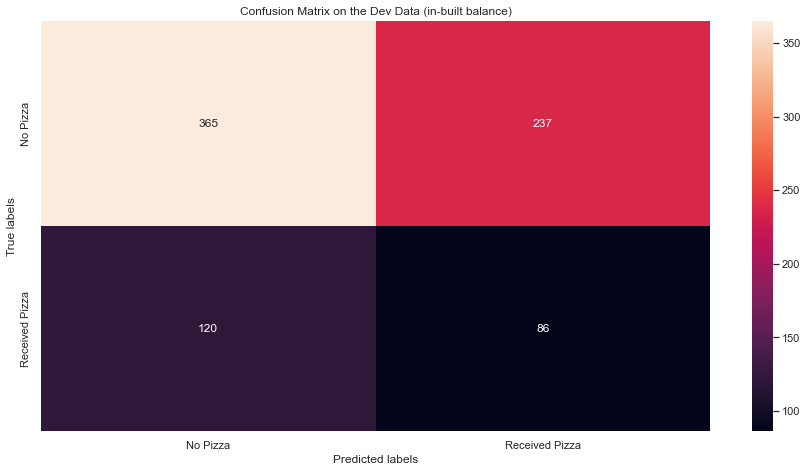

In [230]:
# Confusion matrix
sns.set(rc = {'figure.figsize':(15,15)})

ax= plt.subplot()
sns.heatmap(confusion_matrix(dev_labels, dev_pred), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix on the Dev Data (in-built balance)'); 
ax.xaxis.set_ticklabels(['No Pizza', 'Received Pizza']); ax.yaxis.set_ticklabels(['No Pizza', 'Received Pizza']);

**Logistic Regression model that does NOT use the in-built balancing function.**
- Includes both Numeric and Text features.

In [231]:
#model doesn't the logistic regression's in-built balancing
for C in [ 0.001]:
    lr_inbuilt_balanced = LogisticRegression(C=C, solver="liblinear", multi_class="auto")
    lr_inbuilt_balanced.fit (numeric_text_features_scaled_train, train_labels)

    dev_pred = lr_inbuilt_balanced.predict(numeric_text_features_scaled_dev)
    train_pred = lr_inbuilt_balanced.predict(numeric_text_features_scaled_train)

    print_metrics('tfidf model f1 score, train data: ', train_labels, 
                train_pred)
    print_metrics('tfidf model f1 score, dev data: ', dev_labels, 
                dev_pred)

    # error analysis with confusion matrix see what's misclassified
    print('train confusion matrix:\n',confusion_matrix(train_labels, train_pred))
    print('dev confusion matrix:\n',confusion_matrix(dev_labels, dev_pred))

tfidf model f1 score, train data: : accuracy = 0.9787, precision = 0.9812, recall = 0.9287, f1 = 0.9542
tfidf model f1 score, dev data: : accuracy = 0.6238, precision = 0.2731, recall = 0.2864, f1 = 0.2796
train confusion matrix:
 [[1957   11]
 [  44  573]]
dev confusion matrix:
 [[445 157]
 [147  59]]


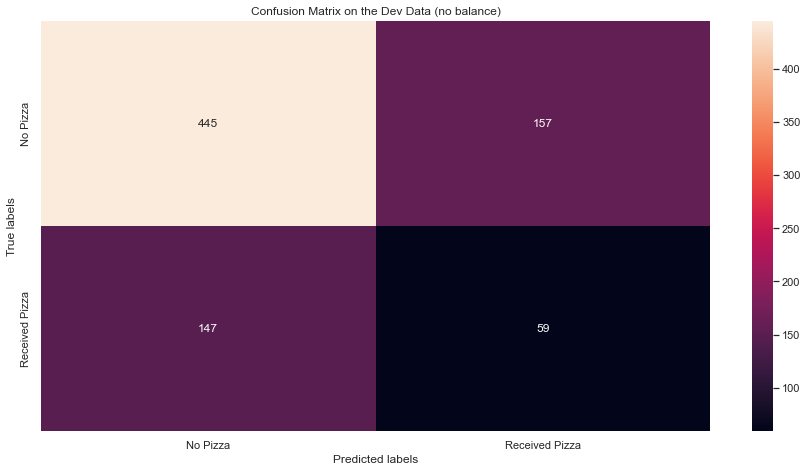

In [232]:
sns.set(rc = {'figure.figsize':(15, 15)})

ax= plt.subplot()
sns.heatmap(confusion_matrix(dev_labels, dev_pred), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix on the Dev Data (no balance)'); 
ax.xaxis.set_ticklabels(['No Pizza', 'Received Pizza']); ax.yaxis.set_ticklabels(['No Pizza', 'Received Pizza']);

**Logistic Regression model using SMOTE balancing technique.**
- Includes both Numeric and Text features.

In [233]:
# trying with the SMOTE balanced data set
for C in [0.0018]:
    lr_SMOTE_trainbalance = LogisticRegression(C=C, solver="liblinear", multi_class="auto")
    # wihtout balancing weight from logisitc regression, had higher acc?
    lr_SMOTE_trainbalance.fit (train_vec_balanced, train_labels_balanced)

    dev_pred = lr_SMOTE_trainbalance.predict(numeric_text_features_dev)
    train_pred = lr_SMOTE_trainbalance.predict(train_vec_balanced)

    print_metrics('tfidf model f1 score, train data: ', train_labels_balanced,
                train_pred)
    print_metrics('tfidf model f1 score, dev data: ', dev_labels, dev_pred)

    # error analysis
    print('train confusion matrix:\n',confusion_matrix(train_labels_balanced, 
                                                    train_pred))
    print('dev confusion matrix:\n',confusion_matrix(dev_labels, dev_pred))


tfidf model f1 score, train data: : accuracy = 0.5600, precision = 0.5908, recall = 0.3902, f1 = 0.4700
tfidf model f1 score, dev data: : accuracy = 0.6238, precision = 0.3144, recall = 0.4029, f1 = 0.3532
train confusion matrix:
 [[1436  532]
 [1200  768]]
dev confusion matrix:
 [[421 181]
 [123  83]]


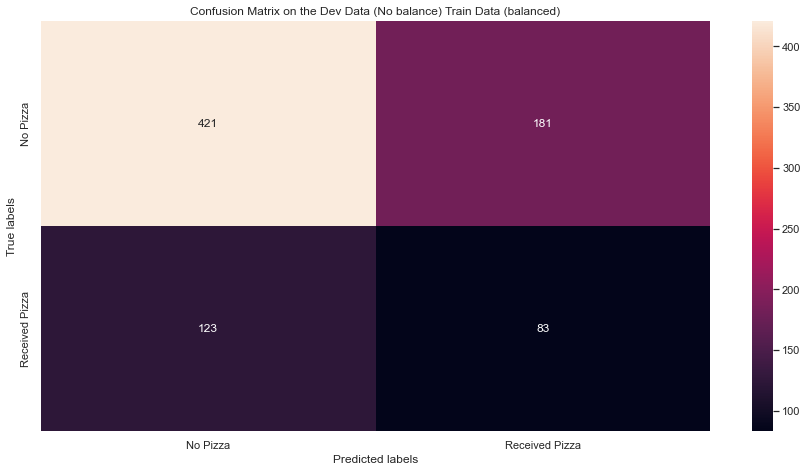

In [234]:
sns.set(rc = {'figure.figsize':(15,15)})
ax= plt.subplot()
sns.heatmap(confusion_matrix(dev_labels, dev_pred), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix on the Dev Data (No balance) Train Data (balanced)'); 
ax.xaxis.set_ticklabels(['No Pizza', 'Received Pizza']); ax.yaxis.set_ticklabels(['No Pizza', 'Received Pizza']);

### Bernoulli Naive Bayes

**Bernoulli Naive Bayes model on unbalanced data**
- Includes both Numeric and Text features.

In [235]:
BernoulliNB_unbalanced = BernoulliNB(alpha = 0.1)
BernoulliNB_unbalanced.fit(numeric_text_features_scaled_train, train_labels)
dev_pred = BernoulliNB_unbalanced.predict(numeric_text_features_scaled_dev)
train_pred = BernoulliNB_unbalanced.predict(numeric_text_features_scaled_train)

print_metrics('tfidf model f1 score, train data: ', train_labels, train_pred)
print_metrics('tfidf model f1 score, dev data: ', dev_labels, dev_pred)

# error analysis with confusion matrix see what's misclassified
print('train confusion matrix:\n',confusion_matrix(train_labels, train_pred))
print('dev confusion matrix:\n',confusion_matrix(dev_labels, dev_pred))


tfidf model f1 score, train data: : accuracy = 0.8781, precision = 0.7996, recall = 0.6532, f1 = 0.7190
tfidf model f1 score, dev data: : accuracy = 0.6671, precision = 0.3179, recall = 0.2670, f1 = 0.2902
train confusion matrix:
 [[1867  101]
 [ 214  403]]
dev confusion matrix:
 [[484 118]
 [151  55]]


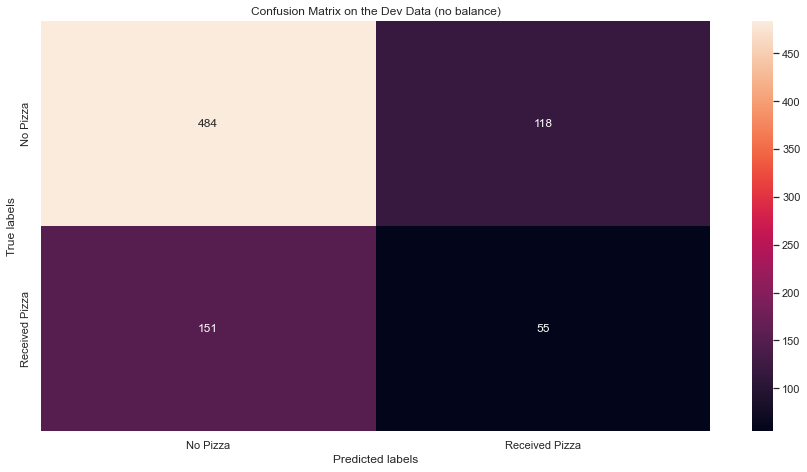

In [236]:
sns.set(rc = {'figure.figsize':(15,15)})

ax= plt.subplot()
sns.heatmap(confusion_matrix(dev_labels, dev_pred), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix on the Dev Data (no balance)'); 
ax.xaxis.set_ticklabels(['No Pizza', 'Received Pizza']); ax.yaxis.set_ticklabels(['No Pizza', 'Received Pizza']);

**Bernoulli Naive Bayes model on SMOTE balanced data**
- Includes both Numeric and Text features.

In [237]:
# try with balanced training set 
'''
# used for preliminary fine tuning 
for alpha in [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]:
    clf = BernoulliNB(alpha = alpha)
    clf.fit(train_vec_balanced, train_labels_balanced)
    dev_pred = clf.predict(dev_vec)
    print('alpha value: ', alpha, 'f1 value: ',metrics.f1_score(dev_labels, 
                        dev_pred)) 
'''
BernoulliNB_balanced_train = BernoulliNB(alpha = 1)
BernoulliNB_balanced_train.fit(train_vec_balanced, train_labels_balanced)
dev_pred = BernoulliNB_balanced_train.predict(numeric_text_features_dev)
train_pred = BernoulliNB_balanced_train.predict(train_vec_balanced)

print_metrics('tfidf model f1 score, train data: ', train_labels_balanced, train_pred)
print_metrics('tfidf model f1 score, dev data: ', dev_labels, dev_pred)

# error analysis with confusion matrix see what's misclassified
print('train confusion matrix:\n',confusion_matrix(train_labels_balanced, train_pred))
print('dev confusion matrix:\n',confusion_matrix(dev_labels, dev_pred))


tfidf model f1 score, train data: : accuracy = 0.8130, precision = 0.8775, recall = 0.7276, f1 = 0.7956
tfidf model f1 score, dev data: : accuracy = 0.6993, precision = 0.3566, recall = 0.2233, f1 = 0.2746
train confusion matrix:
 [[1768  200]
 [ 536 1432]]
dev confusion matrix:
 [[519  83]
 [160  46]]


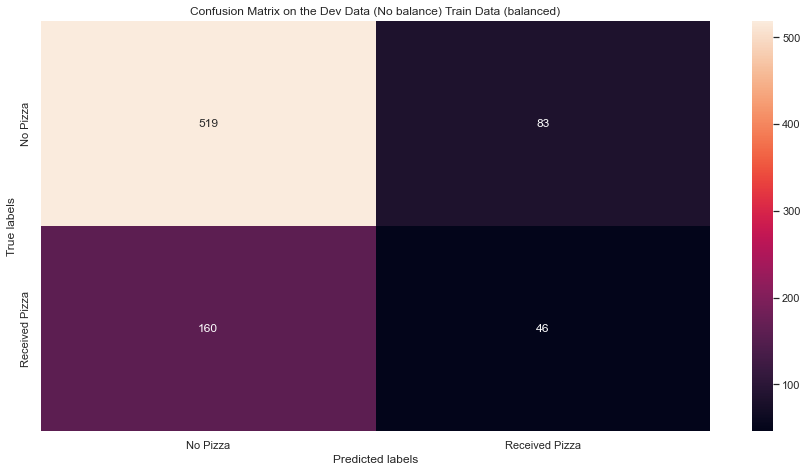

In [238]:
sns.set(rc = {'figure.figsize':(15, 15)})
ax= plt.subplot()
sns.heatmap(confusion_matrix(dev_labels, dev_pred), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix on the Dev Data (No balance) Train Data (balanced)'); 
ax.xaxis.set_ticklabels(['No Pizza', 'Received Pizza']); ax.yaxis.set_ticklabels(['No Pizza', 'Received Pizza']);

## 1.5 Baseline Models with only Textual  Features



In this section we do exploration using only textual features, the request word vectors, in order to find a decent baseline model.

### Logistic Regression

The C values were optimized through separate exploration.

**Logistic Regression model that uses the in-built balancing function.**
- Includes ONLY Text features.

**NOTE: This is our best performing model from this exploration, so we use it as the baseline model.**

In [239]:
#simple model is only cleaned_request_text_edit_aware and predicting recived_pizza
for C in [ 0.001]:
    lr_inbuilt_balanced = LogisticRegression(C=C, solver="liblinear", multi_class="auto",
                          class_weight = 'balanced')
    lr_inbuilt_balanced.fit (train_vec, train_labels)

    dev_pred = lr_inbuilt_balanced.predict(dev_vec)
    train_pred = lr_inbuilt_balanced.predict(train_vec)

    print_metrics('tfidf model f1 score, train data: ', train_labels, train_pred)
    print_metrics('tfidf model f1 score, dev data: ', dev_labels, dev_pred)

    # error analysis with confusion matrix see what's misclassified
    print('train confusion matrix:\n',confusion_matrix(train_labels, train_pred))
    print('dev confusion matrix:\n',confusion_matrix(dev_labels, dev_pred))

tfidf model f1 score, train data: : accuracy = 0.4963, precision = 0.3154, recall = 0.9481, f1 = 0.4733
tfidf model f1 score, dev data: : accuracy = 0.3998, precision = 0.2789, recall = 0.8544, f1 = 0.4205
train confusion matrix:
 [[ 698 1270]
 [  32  585]]
dev confusion matrix:
 [[147 455]
 [ 30 176]]


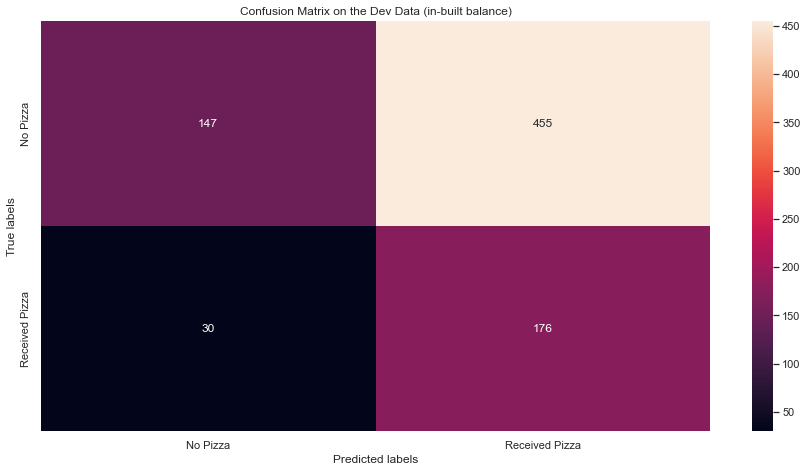

In [240]:
sns.set(rc = {'figure.figsize':(15,15)})

ax= plt.subplot()
sns.heatmap(confusion_matrix(dev_labels, dev_pred), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix on the Dev Data (in-built balance)'); 
ax.xaxis.set_ticklabels(['No Pizza', 'Received Pizza']); ax.yaxis.set_ticklabels(['No Pizza', 'Received Pizza']);

**Logistic Regression model with no balancing function.**
- Includes ONLY Text features.

In [241]:
lr_noBalance = LogisticRegression(C=0.0018, solver="liblinear", multi_class="auto")
# wihtout balancing weight from logisitc regression, had higher acc?
lr_noBalance.fit (train_vec, train_labels)

dev_pred = lr_noBalance.predict(dev_vec)
train_pred = lr_noBalance.predict(train_vec)

print_metrics('tfidf model f1 score, train data: ', train_labels, train_pred)
print_metrics('tfidf model f1 score, dev data: ', dev_labels, dev_pred)

# error analysis
print('train confusion matrix:\n',confusion_matrix(train_labels, train_pred))
print('dev confusion matrix:\n',confusion_matrix(dev_labels, dev_pred))


tfidf model f1 score, train data: : accuracy = 0.7613, precision = 0.0000, recall = 0.0000, f1 = 0.0000
tfidf model f1 score, dev data: : accuracy = 0.7450, precision = 0.0000, recall = 0.0000, f1 = 0.0000
train confusion matrix:
 [[1968    0]
 [ 617    0]]
dev confusion matrix:
 [[602   0]
 [206   0]]


/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


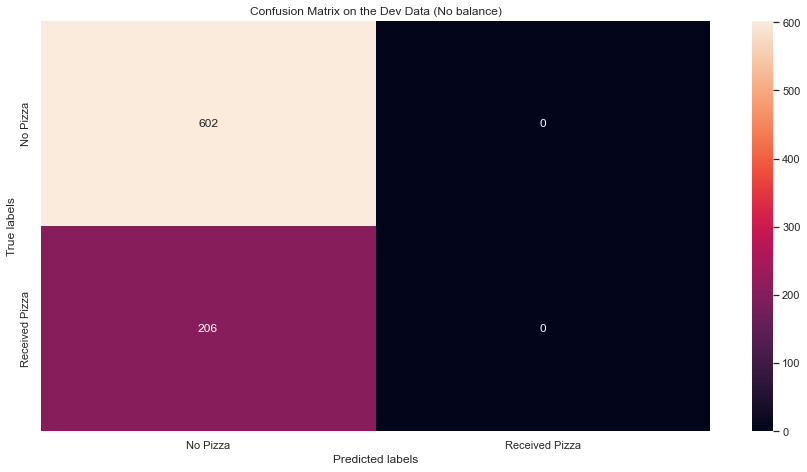

In [242]:
sns.set(rc = {'figure.figsize':(15,15)})
ax= plt.subplot()

sns.heatmap(confusion_matrix(dev_labels, dev_pred), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix on the Dev Data (No balance)'); 
ax.xaxis.set_ticklabels(['No Pizza', 'Received Pizza']); ax.yaxis.set_ticklabels(['No Pizza', 'Received Pizza']);

### Bernoulli Naive Bayes

**Bernoulli Naive Bayes model that on unbalanced data.**
- Includes ONLY Text features.

In [243]:
''' 
# used for preliminary fine tuning 
for alpha in [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]:
    clf = BernoulliNB(alpha = alpha)
    clf.fit(train_vec, train_labels)
    dev_pred = clf.predict(dev_vec)
    print('alpha value: ', alpha, 'f1 value: ',metrics.f1_score(dev_labels, 
                        dev_pred))  
'''
BernoulliNB_unbalanced = BernoulliNB(alpha = 0.1)
BernoulliNB_unbalanced.fit(train_vec, train_labels)
dev_pred = BernoulliNB_unbalanced.predict(dev_vec)
train_pred = BernoulliNB_unbalanced.predict(train_vec)

print_metrics('tfidf model f1 score, train data: ', train_labels, train_pred)
print_metrics('tfidf model f1 score, dev data: ', dev_labels, dev_pred)

# error analysis with confusion matrix see what's misclassified
print('train confusion matrix:\n',confusion_matrix(train_labels, train_pred))
print('dev confusion matrix:\n',confusion_matrix(dev_labels, dev_pred))


tfidf model f1 score, train data: : accuracy = 0.8708, precision = 0.7748, recall = 0.6467, f1 = 0.7049
tfidf model f1 score, dev data: : accuracy = 0.6609, precision = 0.3068, recall = 0.2621, f1 = 0.2827
train confusion matrix:
 [[1852  116]
 [ 218  399]]
dev confusion matrix:
 [[480 122]
 [152  54]]


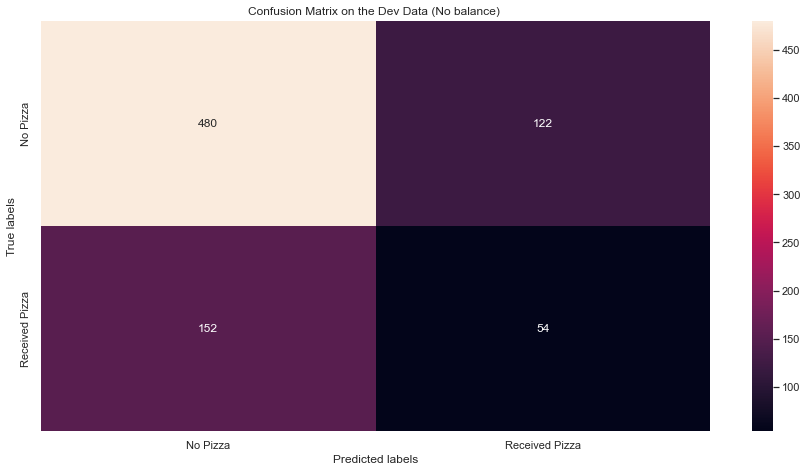

In [244]:
sns.set(rc = {'figure.figsize':(15,15)})
ax= plt.subplot()
sns.heatmap(confusion_matrix(dev_labels, dev_pred), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix on the Dev Data (No balance) '); 
ax.xaxis.set_ticklabels(['No Pizza', 'Received Pizza']); ax.yaxis.set_ticklabels(['No Pizza', 'Received Pizza']);

## 1.6 Baseline Summary:

The data set we use is fairly clean, with very few missing values. We have performed exploratory data analysis on textual and non-textual data and implemented feature engineering to create new features.

In exploring the textual data, we counted the number of specific punctuation marks and applied sentiment analysis. We first combined the request title and request body into a single text entity. We found that posts that were successful in receiving pizzas had a higher number of exclamation marks and question marks. Furthermore we use sentiment analysis to calculate the positive, negative and neutral sentiment score for each request. We found that most requests were neutral. Successful requests had more exclamation marks and question marks and higher positive and negative scores than unsuccessful requests, which means successful requests were more emphatic than unsuccessful requests.

We then looked at word clouds to understand the most common words used in successful and unsuccessful pizza requests. Successful requests had words more directly related to hunger and food insecurity. "Please" was a very common word, so it seems like being polite and respectful helped people receive pizzas. Unsuccessful requests had words that are not directly related to hunger. We will vectorize the request text for our baseline model.

We also performed exploratory data analysis on the non-textual, numeric metadata. More successful requests were from requesters who are relatively more active at Reddit based on the number of comments they have posted at the time of request. Requests that were made outside of the 7 AM to 1 PM time were more likely to receive a pizza. Furthermore, successful requests had more upvotes and downvotes than unsuccessful requests. Requestor activity and popularity of a  request contribute heavily to whether or not a person receives a pizza.

We utilized the textual and non-textual features to create the baseline models. To establish the baseline performance and reveal some of the issues we may encounter, we have built a couple of types of models: Logistic Regression and Bernoulli Naive Bayes. The best baseline model was Logistic Regression on Textual data with in-built balaning, which produced a 0.4 accuracy score and a 0.42 F1 score on our dev set. 

The baseline model exploration helped us to spot a couple of issues that need to be resolved, such as imbalanced data and overfitting. From our EDA, we see about only 25% of requests were granted pizzas. In an initial attempt to address the imbalanced data, we implemented SMOTE upsampling for the successful pizza requests. We upsampled our training data, but not our dev data in order to ensure more comprehensive performance analysis. We also tried in-built balancing techniques for Logistic Regression.

We have about 2585 train samples, and up to 5186 numeric and text features. Our feature vectors are in a high-dimensional space and are very sparse and we run into the curse of dimensionality problem, causing our models to overfit. We also scale the numeric features in an attempt to increase performance. 

In the Part 2 of this analysis, we aim to utilize what we learned from Part 1 to create more accurate models. We run the models on subset of enhancements at a time to figure out their true impact on performance. To account for imbalance data, we will chose proper models like Logistic Regression with _class_weight_ parameter and XGBoost models that perform well on unbalanced data. We also will use cross validation to fix overfitting and absorb our development set data into our training set. Furthermore, we will experiment with different vocabulary sizes to decrease data dimensionality. To counter the curse of dimensionality, we will try to limit the feature size by reducing the vocabulary size in our word vectorizer using preprocessing and L1 regularization with Logistic Regression. 




----


# 2. Final Submission

## Libraries

In [2]:
# reset the kernel for efficiency and to free up space
%reset -f

In [1]:
# import the necessary libraries again with new kernel

import math
import numpy as np
import pandas as pd
#import psycopg2 #prob don't need this
import json
import csv
from datetime import datetime as dt

from IPython.display import display, HTML

# This tells matplotlib not to open a new window for each plot.
%matplotlib inline

# general libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import nltk
import xgboost as xgb 

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV


# Libraries for neural networks
import tensorflow as tf
import tensorflow.keras.backend as K

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import optimizers

from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn import preprocessing

/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Helper Functions

In [2]:
def remove_feature(df, feature_list_to_drop):
    if isinstance(feature_list_to_drop, list):
        df_new = df.drop(feature_list_to_drop, axis = 1)
       
    return df_new

# Natalie Ahn: https://github.com/MIDS-W207/coursework
#/blob/master/Natalie/Week5
#/linear_and_logistic_regression.ipynb

In [3]:
def print_metrics(test_name, y_true, y_pred):
    print('%s: accuracy = %.4f, precision = %.4f, recall = %.4f, f1 = %.4f'
          % (test_name,
             metrics.accuracy_score(y_true, y_pred),
             metrics.precision_score(y_true, y_pred),
             metrics.recall_score(y_true, y_pred),
             metrics.f1_score(y_true, y_pred)))

In [4]:
def print_metrics_cv(test_name, cv):
    print('%s: accuracy = %.4f, precision = %.4f, recall = %.4f, f1 = %.4f'
          % (test_name,
             cv.cv_results_['mean_test_accuracy'][cv.best_index_],
             cv.cv_results_['mean_test_precision'][cv.best_index_],
             cv.cv_results_['mean_test_recall'][cv.best_index_],
             cv.cv_results_['mean_test_f1'][cv.best_index_]))

## Load full dataset

In [6]:
# Load full data in
with open('train.json') as fin:
    trainjson = json.load(fin)
all_data = pd.json_normalize(trainjson)

# check load
#all_data

## 2.1 Further Data Cleaning

We will clean our entire dataset, remove missing values, handle outliers before we split it.

In [7]:
# review all imported data
all_data.columns

Index(['giver_username_if_known',
       'number_of_downvotes_of_request_at_retrieval',
       'number_of_upvotes_of_request_at_retrieval', 'post_was_edited',
       'request_id', 'request_number_of_comments_at_retrieval', 'request_text',
       'request_text_edit_aware', 'request_title',
       'requester_account_age_in_days_at_request',
       'requester_account_age_in_days_at_retrieval',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_days_since_first_post_on_raop_at_retrieval',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_at_retrieval',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_comments_in_raop_at_retrieval',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_at_retrieval',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_posts_on_raop_at_retrieval',
       'requester_number_of_subreddits_at_request', 'r

### Concatenate request  title and body into 1 field

The request body and title are in two separate fields and we concatenate them together into 1 field, since we want to capture more comprehensive text. We follow a similar concatenation procedure as in the initial baseline submission. This will allow for easier vectorization for later models.

In [8]:
# concatenate title and body to form a full text
clean_data = all_data.copy()

# this is oncatenated text
clean_data['request_text_edit_aware'] = clean_data['request_title'] + " " + clean_data['request_text_edit_aware']

# remove request_title column
clean_data.drop('request_title', axis=1, inplace=True)

### Requester subredits

We experimented with creating one hot encoding for the requester subreddits feature, which did not produce a significant result and also increase the number of features to an extremely. Since this exacerbated the high dimensionality issue in our data, we decided to drop this feature as well.

In [9]:
# get one hot encoding from requester_subreddits_at_request
# TO-DO: see if cwe can keep certain subreddits

# remove subreddits , not enough space
# df2 = pd.get_dummies(clean_data['requester_subreddits_at_request'].apply(pd.Series).stack(), prefix="subr").sum(level=0)


# clean_data = clean_data.join(df2)

# empty lists will be converted to NaN values on join so imputing them back to 0 (there are not a lot of empty lists)
# clean_data.iloc[:,31:] = clean_data.iloc[:,31:].fillna(0)

# make values that are greater than 1 to 1, seems like a mistake in data

### Imputing large numbers in the boolean variable

There is a boolean feature indicating wheather the post was edited. Most values contain 0s and 1s, but about 10% of data in that column contains very large numbers, which are outliers. We impute these large numbers with 1s, assuming that a large number means that the post was edited, and maybe got accidentally filled with a unix timestamp instead of a 1. This imputation made an improvement to the models below.

In [10]:
# make values that are greater than 1 to 1, seems like a mistake in data
clean_data['post_was_edited'].values[clean_data['post_was_edited'].values > 1] = 1
clean_data['post_was_edited'].value_counts()

False    3395
True      645
Name: post_was_edited, dtype: int64

In [11]:
#double check
#clean_data.columns

In [12]:
# convert boolean to int so we have 0s and 1s as values
clean_data['requester_received_pizza'] = clean_data.requester_received_pizza.astype(int)
clean_data['post_was_edited'] = clean_data.post_was_edited.astype(int)

### Checking for missing values

The feature requester_user_flair has a more than 70% of it's values missing. Since we do not believe this feature is of high importance, we will drop this feature from the dataset. Also most of  usernames are unknown so we will be dropping that feature as well. We will also remove some of the text features such as ids and usernames, since they may introduce noise into our model instead of improve learning.

In [13]:
# check for missing values
all_data.isna().sum()

giver_username_if_known                                    0
number_of_downvotes_of_request_at_retrieval                0
number_of_upvotes_of_request_at_retrieval                  0
post_was_edited                                            0
request_id                                                 0
request_number_of_comments_at_retrieval                    0
request_text                                               0
request_text_edit_aware                                    0
request_title                                              0
requester_account_age_in_days_at_request                   0
requester_account_age_in_days_at_retrieval                 0
requester_days_since_first_post_on_raop_at_request         0
requester_days_since_first_post_on_raop_at_retrieval       0
requester_number_of_comments_at_request                    0
requester_number_of_comments_at_retrieval                  0
requester_number_of_comments_in_raop_at_request            0
requester_number_of_comm

In [14]:
#missing values
print(sum(clean_data['giver_username_if_known']=="N/A"))
print(sum(clean_data['requester_user_flair'].isna()))

3753
3046


In [15]:
# drop features
clean_data = remove_feature(clean_data, ['requester_user_flair', 'giver_username_if_known', 'request_id', 'requester_subreddits_at_request', 'requester_username'])

In [16]:
#double check
# clean_data

## Split data

`full_train` - initial dataset

`clean_data` - dataset after cleaning

**v1**

`train` - 80% split of the full_train

`dev` - 20% split of the full_train

`test` - 20% split of the train


**v2** - No dev set and just use cross validation. The train data set becomes larger in this case.

`train_cv, test_cv` - 80% / 20% split


In [17]:
# new train is on cleaned data
# split clean data into a mid training and development set 
mid_train, dev = train_test_split(clean_data, test_size=0.2, random_state = 0)

# split the mid training set into a final train set and test set
train, test = train_test_split(mid_train, test_size=0.2, random_state = 0)

In [18]:
print("Train size: ", train.shape)
print("Dev size:   ", dev.shape)
print("Test size:  ", test.shape)

Train size:  (2585, 26)
Dev size:    (808, 26)
Test size:   (647, 26)


### Dataset size

Our training dataset contains only 2585 points which is fairly small. Increasing the number of training data points will help offset the issues too many textual word features and high dimensionality. So, we also performed a different splitting technique, in which we absorbed the initial development set into the train set to make a larger train set. Then we can use cross validation on the larger training set to check model performance. This step increased our train size by 800 data points, and from prior experiments, we saw that this change increased accuracy and F1 score of models.

In the future models in this section, we will use the larger training set for model tuning and at the end, we will run the top 2 best performing modes on this test set.

In [19]:
# train test split for cross validation
train_cv, test_cv = train_test_split(clean_data, test_size=0.2, random_state = 0)

print("Train size: ", train_cv.shape)
print("Test size:  ", test_cv.shape)

Train size:  (3232, 26)
Test size:   (808, 26)


In [20]:
# drop the labeled data from the train dataset
#fields to drop
drop_features = ['requester_received_pizza']

# create labels
train_labels = train['requester_received_pizza']
dev_labels = dev['requester_received_pizza']
test_labels = test['requester_received_pizza']

train_cv_labels = train_cv['requester_received_pizza']
test_cv_labels = test_cv['requester_received_pizza']

# remove features
train = remove_feature(train, drop_features)
dev = remove_feature(dev, drop_features)
test = remove_feature(test, drop_features)

train_cv = remove_feature(train_cv, drop_features)
test_cv = remove_feature(test_cv, drop_features)

In [21]:
# make sure the feature size went down
print("Train size: ", train.shape)
print("Train labels: ", train_labels.shape)

print("Dev size:   ", dev.shape)
print("Dev labels: ", dev_labels.shape)

print("Test size:  ", test.shape)
print("Test labels: ", test_labels.shape)

print("\n")

# make sure the feature size went down
print("Train CV size: ", train_cv.shape)
print("Train CV labels: ", train_cv_labels.shape)

print("Test CV size:  ", test_cv.shape)
print("Test CV labels: ", test_cv_labels.shape)

Train size:  (2585, 25)
Train labels:  (2585,)
Dev size:    (808, 25)
Dev labels:  (808,)
Test size:   (647, 25)
Test labels:  (647,)


Train CV size:  (3232, 25)
Train CV labels:  (3232,)
Test CV size:   (808, 25)
Test CV labels:  (808,)


In [22]:
# create a separate label for text data and drop text features from the numeric dataset
need_to_vectorize_train = train['request_text_edit_aware']
need_to_vectorize_dev = dev['request_text_edit_aware']
need_to_vectorize_test = test['request_text_edit_aware']

# text data only
need_to_vectorize_train_cv = train_cv['request_text_edit_aware']
need_to_vectorize_test_cv = test_cv['request_text_edit_aware']

train_trial = remove_feature(train, ['request_text', 'request_text_edit_aware'])
dev_trial = remove_feature(dev, ['request_text', 'request_text_edit_aware'])
test_trial = remove_feature(test, ['request_text', 'request_text_edit_aware'])

train_cv_trial = remove_feature(train_cv, ['request_text', 'request_text_edit_aware'])
test_cv_trial = remove_feature(test_cv, ['request_text', 'request_text_edit_aware'])

train_cv_trial.shape

(3232, 23)

## 2.2 Models with only Numeric (Non-Textual) Features

In [23]:
# numeric baseline
# -------- Logistic ----------

def run_logistic_cv(train, labels):
    """ 
    Function to run a cross-validated Logistic Regression model with in-built balancing.
    """

    cs = {'C': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

    #model uses the logistic regression's in-built balancing
    lr = LogisticRegression(solver="liblinear", class_weight = 'balanced')

    # cross-val
    clf = GridSearchCV(lr, cs, scoring=['f1', 'accuracy', 'recall', 'precision'], refit='f1')
    clf.fit (train, labels)

    # print
    print("\nBest C parameter:", clf.best_params_)
    print("Best f1 score:", clf.best_score_)
    
    print_metrics_cv('Logistic baseline best scores', clf)
    
    # Convert the confusion matrix to Cross Val
    train_pred = clf.predict(train)
    #error analysis with confusion matrix see what's misclassified
    print('\nconfusion matrix:\n',confusion_matrix(labels, train_pred))
    
    #return clf

In [24]:
# -------- KNN ----------

def run_knn_cv(train, labels):
    """ 
    Function to run a cross-validated KNN model with in-built balancing.
    """

    k_range = list(range(2, 20))
    k_range = dict(n_neighbors=k_range)

    # Initiatilize a model
    knn = KNeighborsClassifier()

    # cross-val
    cv_knn = GridSearchCV(knn, k_range, scoring=['f1', 'accuracy', 'recall', 'precision'], refit='f1')
    cv_knn.fit(train, labels)

    # print
    print("\nBest parameters:", cv_knn.best_params_)
    print("Best f1 score:", cv_knn.best_score_)

    print_metrics_cv('KNN baseline best scores', cv_knn)
    
   
    train_pred = cv_knn.predict(train)    
    #error analysis with confusion matrix see what's misclassified
    print('\nconfusion matrix:\n',confusion_matrix(labels, train_pred))

Check if the data cleaning and cross validation works

In [25]:
# Check if the data cleaning and cross validation works 
run_logistic_cv(train_cv_trial, train_cv_labels)


Best C parameter: {'C': 0.5}
Best f1 score: 0.36081180659869994
Logistic baseline best scores: accuracy = 0.6566, precision = 0.3305, recall = 0.4010, f1 = 0.3608

confusion matrix:
 [[1865  579]
 [ 504  284]]


In [26]:
# Check if the data cleaning and cross validation works
run_knn_cv(train_cv_trial, train_cv_labels)


Best parameters: {'n_neighbors': 3}
Best f1 score: 0.24722744910009692
KNN baseline best scores: accuracy = 0.7027, precision = 0.3238, recall = 0.2005, f1 = 0.2472

confusion matrix:
 [[2307  137]
 [ 420  368]]


####  Data Cleaning and Cross Validation Impact

We run preliminary Logistic Regression and KNN models with numeric features in order to see what the impact of data cleaning and cross validation was.
Logistic Regression model performs slightly better than the KNN model. We see very low results for the KNN model, and that is because our data is not scaled. KNN model is more affected by unscaled data because it measures distance from each data point, and on unscaled data those distances may become very large. Scaling will normalize the data and improve KNN performance. 

The next step is to do use both numeric and textual features to perform feature engineering and scale the data.

## 2.3 More Feature Engineering

We did feature engineering in Part 1 on request text and date columns and we will do similar feature engineering in this section. Here, we want to see if extracting these new features (sentiment analysis features, number of exclamation points, number of question marks, day of week, time of day ) will improve our model performance.

In [27]:
def add_new_features(df):
    """
    Function that adds the new features from request text and date columns
    """
    
    df_return = df.copy()

    df_return['num_exclam'] = df_return.apply(lambda x: x['request_text_edit_aware'].count('!'), axis=1)

    # add a column to count the number of question marks in the full text
    df_return['num_quest'] = df_return.apply(lambda x: x['request_text_edit_aware'].count('?'), axis=1)

    sent = SentimentIntensityAnalyzer()

    df_return['sent_di'] = df_return.apply(lambda x: sent.polarity_scores(x['request_text_edit_aware']), axis=1)

    # create columns for positive, negative, and neutral sentiment
    df_return['neg_sent'] = df_return.apply(lambda x: x['sent_di']['neg'], axis=1)
    df_return['pos_sent'] = df_return.apply(lambda x: x['sent_di']['pos'], axis=1)
    df_return['neut_sent'] = df_return.apply(lambda x: x['sent_di']['neu'], axis=1)

    df_return.drop('sent_di', axis=1, inplace=True)


    df_return['date_time'] = np.asarray(df_return['unix_timestamp_of_request_utc'].astype(float), dtype = 'datetime64[s]')
    
    df_return['day_of_week'] = df_return['date_time'].dt.dayofweek
    df_return['time_of_day'] = df_return['date_time'].dt.hour

    df_return.drop('date_time', axis=1, inplace=True)
    
    return df_return

In [28]:
train_cv.shape

(3232, 25)

In [29]:
# add new features to train
train_cv_fetures = add_new_features(train_cv)
# add new features to test
test_cv_fetures = add_new_features(test_cv)

print(train_cv_fetures.shape)
print(test_cv_fetures.shape)

# double check
# train_cv_fetures

(3232, 32)
(808, 32)


In [30]:
# drop text features

# these datasets do not have the new features since we are focusing on the larger train set
train = remove_feature(train, ['request_text', 'request_text_edit_aware'])
dev = remove_feature(dev, ['request_text', 'request_text_edit_aware'])
test = remove_feature(test, ['request_text', 'request_text_edit_aware'])

# this is the test/train split that we continue working with
train_cv_fetures = remove_feature(train_cv_fetures, ['request_text', 'request_text_edit_aware'])
test_cv_fetures = remove_feature(test_cv_fetures, ['request_text', 'request_text_edit_aware'])

In [31]:
print(train_cv_fetures.shape)
print(test_cv_fetures.shape)

(3232, 30)
(808, 30)


## Scale the data

We scale the numeric features in order to normalize the data and improve model performance. 

At retrieval features have more importance, more predictive power than at request features.

In [32]:
# list of boolean features
boolean_features = ['post_was_edited']

# list of numeric features
numeric_features = ['number_of_downvotes_of_request_at_retrieval',
                   'number_of_upvotes_of_request_at_retrieval',
                   'request_number_of_comments_at_retrieval',
                   'requester_account_age_in_days_at_request',
                   'requester_account_age_in_days_at_retrieval',
                   'requester_days_since_first_post_on_raop_at_request',
                   'requester_days_since_first_post_on_raop_at_retrieval',
                   'requester_number_of_comments_at_request',
                   'requester_number_of_comments_at_retrieval',
                   'requester_number_of_comments_in_raop_at_request',
                   'requester_number_of_comments_in_raop_at_retrieval',
                   'requester_number_of_posts_at_request',
                   'requester_number_of_posts_at_retrieval',
                   'requester_number_of_posts_on_raop_at_request',
                   'requester_number_of_posts_on_raop_at_retrieval',
                   'requester_number_of_subreddits_at_request',
                   'requester_upvotes_minus_downvotes_at_request',
                   'requester_upvotes_minus_downvotes_at_retrieval',
                   'requester_upvotes_plus_downvotes_at_request',
                   'requester_upvotes_plus_downvotes_at_retrieval',
                   'unix_timestamp_of_request',
                   'unix_timestamp_of_request_utc',  'time_of_day',
                   'num_exclam',
                   'num_quest',
                   'neg_sent',
                   'pos_sent',
                   'neut_sent',
                   'day_of_week']

In [33]:
#scale 
scaler = preprocessing.StandardScaler()

# only use numeric features
train_cv_scaled = \
  scaler.fit_transform(train_cv_fetures[numeric_features])


test_cv_scaled = \
  scaler.transform(test_cv_fetures[numeric_features])

In [34]:
#convert back to dataframe
train_cv_scaled = pd.DataFrame(train_cv_scaled, columns=train_cv_fetures[numeric_features].columns)

test_cv_scaled = pd.DataFrame(test_cv_scaled, columns=test_cv_fetures[numeric_features].columns)

In [35]:
test_cv_scaled

,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,request_number_of_comments_at_retrieval,requester_account_age_in_days_at_request,requester_account_age_in_days_at_retrieval,requester_days_since_first_post_on_raop_at_request,requester_days_since_first_post_on_raop_at_retrieval,requester_number_of_comments_at_request,requester_number_of_comments_at_retrieval,requester_number_of_comments_in_raop_at_request,...,requester_upvotes_plus_downvotes_at_retrieval,unix_timestamp_of_request,unix_timestamp_of_request_utc,time_of_day,num_exclam,num_quest,neg_sent,pos_sent,neut_sent,day_of_week
0,-0.142443,-0.398541,-0.601379,-0.285413,-0.993805,-0.230524,-0.970909,-0.523299,-0.744447,-0.181257,...,-0.161895,0.907161,0.907171,-1.307433,-0.596021,-0.435245,-0.089189,-0.875874,0.892984,1.542879
1,-0.807244,0.386039,0.675383,3.520689,3.546556,-0.230524,0.361861,-0.273867,2.022792,-0.181257,...,-0.047880,-0.415138,-0.415170,0.918490,-0.596021,-0.435245,0.075662,-1.815857,1.678710,1.542879
2,-0.142443,0.189894,0.462589,2.535080,3.047355,-0.230524,0.858889,0.105479,-0.063932,-0.181257,...,-0.147256,-0.908287,-0.908179,-1.307433,0.186726,-0.435245,-1.193694,1.680419,-0.809422,-1.481432
3,-0.474843,-0.398541,1.739351,0.030485,0.262707,-0.230524,0.234524,1.529322,1.040140,-0.181257,...,0.135005,-0.288817,-0.288845,1.035644,-0.596021,-0.435245,1.987939,-0.784169,-0.569339,1.038827
4,-0.142443,-0.104323,-0.601379,-0.493523,-1.697240,-0.230524,-1.610282,0.199016,-0.230531,-0.181257,...,-0.121192,1.541525,1.541554,1.152798,0.186726,1.363619,0.026207,0.270446,-0.285605,-0.977380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,-0.807244,-0.496614,-0.388585,-0.526125,-0.252830,0.418036,0.392843,-0.102382,-0.179704,2.058977,...,-0.166104,-0.278748,-0.278775,0.215567,0.969473,1.363619,-1.193694,0.843606,-0.012783,-0.977380
804,0.522358,-0.104323,-0.175792,-0.832693,-0.003982,-0.230524,0.882050,-0.590854,-0.798097,-0.181257,...,-0.186548,-0.931259,-0.931152,0.918490,0.969473,-0.435245,0.059177,-0.245398,0.194561,-1.481432
805,-0.474843,-0.496614,-0.388585,0.212730,-0.952375,-0.230524,-1.484494,-0.133561,0.049017,-0.181257,...,-0.120753,1.416718,1.416743,-0.604509,0.186726,1.363619,-0.517803,-0.738316,1.045764,0.030723
806,-0.142443,-0.104323,-0.175792,0.635628,0.810996,-0.230524,0.230368,0.100282,-0.021576,-0.181257,...,-0.079263,-0.284696,-0.284723,-1.541740,0.186726,-0.435245,-0.385922,0.098498,0.161822,-1.481432


In [36]:
# exclude numeric features from the main dataset
train_cv_boolean = train_cv_fetures.loc[:, ~train_cv_fetures.columns.isin(numeric_features)]

# merge the 2 again
train_cv_scaled.index = train_cv_boolean.index # set index to be the same since scaled was a new datframe
train_cv_scaled = train_cv_boolean.join(train_cv_scaled)

In [37]:
# same on test data
# exclude numeric features from the main dataset
test_cv_boolean = test_cv_fetures.loc[:, ~test_cv_fetures.columns.isin(numeric_features)]

# merge the 2 again
test_cv_scaled.index = test_cv_boolean.index # set index to be the same since scaled was a new datframe
test_cv_scaled = test_cv_boolean.join(test_cv_scaled)

In [38]:
# check number of features
train_cv_scaled

,post_was_edited,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,request_number_of_comments_at_retrieval,requester_account_age_in_days_at_request,requester_account_age_in_days_at_retrieval,requester_days_since_first_post_on_raop_at_request,requester_days_since_first_post_on_raop_at_retrieval,requester_number_of_comments_at_request,requester_number_of_comments_at_retrieval,...,requester_upvotes_plus_downvotes_at_retrieval,unix_timestamp_of_request,unix_timestamp_of_request_utc,time_of_day,num_exclam,num_quest,neg_sent,pos_sent,neut_sent,day_of_week
159,0,-0.807244,-0.496614,-0.388585,-0.628664,-0.307256,-0.230524,0.272973,-0.590854,1.455226,...,0.027374,-0.326962,-0.326991,0.215567,0.186726,-0.435245,-1.193694,-0.325641,1.100328,-0.473328
3899,0,-0.474843,-0.300469,0.037002,-0.377367,0.357338,-0.230524,0.815167,-0.570068,-0.741623,...,-0.182269,-0.864902,-0.864793,0.567029,0.969473,-0.435245,0.702098,0.419467,-0.863987,0.534775
1462,1,-0.807244,-0.300469,-0.388585,2.022716,1.910464,-0.230524,0.025071,1.466964,2.014321,...,-0.075147,-0.081004,-0.081025,0.918490,-0.596021,-0.435245,-0.748595,-0.176619,0.663814,1.038827
1127,0,3.181562,0.484112,-0.388585,1.083937,-0.080214,-0.230524,-1.387419,-0.242688,-0.583495,...,-0.147186,1.320405,1.320427,-0.487356,-0.596021,-0.435245,4.658532,-0.864411,-2.260833,1.038827
1861,1,0.189958,-0.300469,-0.601379,1.788762,0.750136,-0.230524,-1.153618,-0.232295,2.022792,...,0.203159,1.088443,1.088458,1.035644,-0.596021,1.363619,0.421850,-1.150991,0.805681,1.038827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1,0.189958,-0.202396,-0.601379,-0.832693,0.268560,-0.230524,1.221249,-0.590854,-0.798097,...,-0.186502,-1.267800,-1.267858,-0.955971,-0.596021,1.363619,-0.023249,1.657493,-1.562410,-0.977380
3264,0,0.854759,-0.006251,-0.388585,-0.832693,-0.686708,-0.230524,0.032347,-0.590854,-0.800921,...,-0.186525,-0.088223,-0.088245,1.152798,-0.596021,-0.435245,-0.105674,-0.577831,0.620163,0.030723
1653,0,3.513963,2.739780,0.249796,1.913853,0.768837,8.947819,1.109748,4.449762,1.946552,...,0.083664,1.206147,1.206166,0.215567,-0.596021,-0.435245,2.317642,-0.669537,-0.896725,-0.473328
2607,1,-0.807244,-0.496614,-0.601379,-0.832693,-0.386763,-0.230524,0.405651,-0.590854,-0.368893,...,-0.119087,-0.458596,-0.458629,-1.073125,4.100460,-0.435245,-0.616714,-0.531978,0.925723,-0.473328


In [39]:
test_cv_scaled

,post_was_edited,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,request_number_of_comments_at_retrieval,requester_account_age_in_days_at_request,requester_account_age_in_days_at_retrieval,requester_days_since_first_post_on_raop_at_request,requester_days_since_first_post_on_raop_at_retrieval,requester_number_of_comments_at_request,requester_number_of_comments_at_retrieval,...,requester_upvotes_plus_downvotes_at_retrieval,unix_timestamp_of_request,unix_timestamp_of_request_utc,time_of_day,num_exclam,num_quest,neg_sent,pos_sent,neut_sent,day_of_week
927,0,-0.142443,-0.398541,-0.601379,-0.285413,-0.993805,-0.230524,-0.970909,-0.523299,-0.744447,...,-0.161895,0.907161,0.907171,-1.307433,-0.596021,-0.435245,-0.089189,-0.875874,0.892984,1.542879
217,0,-0.807244,0.386039,0.675383,3.520689,3.546556,-0.230524,0.361861,-0.273867,2.022792,...,-0.047880,-0.415138,-0.415170,0.918490,-0.596021,-0.435245,0.075662,-1.815857,1.678710,1.542879
773,0,-0.142443,0.189894,0.462589,2.535080,3.047355,-0.230524,0.858889,0.105479,-0.063932,...,-0.147256,-0.908287,-0.908179,-1.307433,0.186726,-0.435245,-1.193694,1.680419,-0.809422,-1.481432
1544,1,-0.474843,-0.398541,1.739351,0.030485,0.262707,-0.230524,0.234524,1.529322,1.040140,...,0.135005,-0.288817,-0.288845,1.035644,-0.596021,-0.435245,1.987939,-0.784169,-0.569339,1.038827
2690,1,-0.142443,-0.104323,-0.601379,-0.493523,-1.697240,-0.230524,-1.610282,0.199016,-0.230531,...,-0.121192,1.541525,1.541554,1.152798,0.186726,1.363619,0.026207,0.270446,-0.285605,-0.977380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,0,-0.807244,-0.496614,-0.388585,-0.526125,-0.252830,0.418036,0.392843,-0.102382,-0.179704,...,-0.166104,-0.278748,-0.278775,0.215567,0.969473,1.363619,-1.193694,0.843606,-0.012783,-0.977380
1095,0,0.522358,-0.104323,-0.175792,-0.832693,-0.003982,-0.230524,0.882050,-0.590854,-0.798097,...,-0.186548,-0.931259,-0.931152,0.918490,0.969473,-0.435245,0.059177,-0.245398,0.194561,-1.481432
882,1,-0.474843,-0.496614,-0.388585,0.212730,-0.952375,-0.230524,-1.484494,-0.133561,0.049017,...,-0.120753,1.416718,1.416743,-0.604509,0.186726,1.363619,-0.517803,-0.738316,1.045764,0.030723
1900,1,-0.142443,-0.104323,-0.175792,0.635628,0.810996,-0.230524,0.230368,0.100282,-0.021576,...,-0.079263,-0.284696,-0.284723,-1.541740,0.186726,-0.435245,-0.385922,0.098498,0.161822,-1.481432


#### Feature Engineering and Scaling Impact


We run Logistic Regression and KNN models with numeric features in order to see what the impact of creating new numeric features and scaling was. We see feature Engineering and scaling almost doubled the F1 scores and solidly increased the accuracy, precision and recall of the models that had just data cleaning and cross validation. Scaling likely was the main booster in performance, because both Logistic Regression and KNN learn better on normalized data. 

Logistic Regression again is performing much better than the KNN model, possibly because it includes in-built balancing and because the data may follow a more linear or logistic pattern.

In [40]:
run_logistic_cv(train_cv_scaled, train_cv_labels)


Best C parameter: {'C': 0.1}
Best f1 score: 0.6591684382515327
Logistic baseline best scores: accuracy = 0.8230, precision = 0.6211, recall = 0.7031, f1 = 0.6592

confusion matrix:
 [[2107  337]
 [ 223  565]]


In [41]:
run_knn_cv(train_cv_scaled, train_cv_labels)


Best parameters: {'n_neighbors': 3}
Best f1 score: 0.48983404673407377
KNN baseline best scores: accuracy = 0.8014, precision = 0.6574, recall = 0.3909, f1 = 0.4898

confusion matrix:
 [[2369   75]
 [ 302  486]]


## Numeric Feature Correlation

#### Initial Numeric Feature Correlation

Text(0.5, 1.0, 'Correlation matrix of potential non-text features')

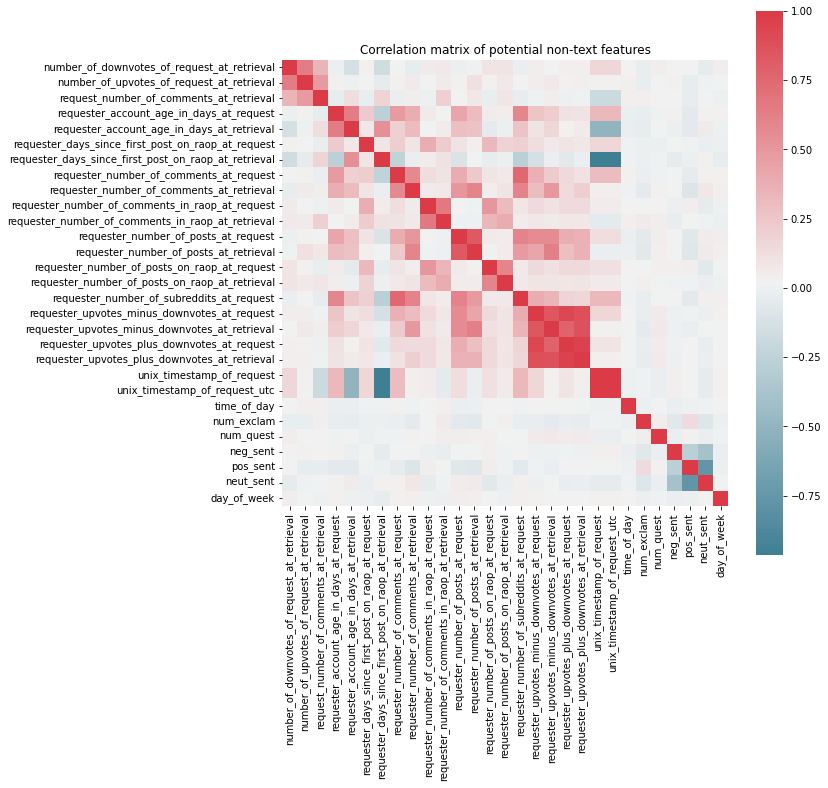

In [42]:
# Correlation matrix of numeric features
train_cv_numeric = train_cv_scaled[numeric_features]


f, ax = plt.subplots(figsize=(10,10))
corr = train_cv_numeric.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.title("Correlation matrix of potential non-text features")

Most numeric features are not heavily correlated with each other. We may look into some of the features that are highly correlated, and consider dropping them, since for models such as Logistic Regression, perfect colliniearity would cause extreme overfitting.

In [43]:
corr[corr > 0.8].iloc[:,10:]

# features that are a highly correlated

# requester_number_of_posts_at_request <-> requester_number_of_posts_at_retrieval = 0.835951

# requester_upvotes_minus_downvotes_at_request <-> requester_upvotes_minus_downvotes_at_retrieval = 0.847088
# requester_upvotes_minus_downvotes_at_request <-> requester_upvotes_plus_downvotes_at_request 0.924393
# requester_upvotes_minus_downvotes_at_request <-> requester_upvotes_plus_downvotes_at_retrieval 0.882648
# requester_upvotes_minus_downvotes_at_retrieval <-> requester_upvotes_plus_downvotes_at_retrieval 0.872668

# requester_upvotes_plus_downvotes_at_request <-> requester_upvotes_plus_downvotes_at_retrieval = 0.954903
# unix_timestamp_of_request <-> unix_timestamp_of_request_utc = 1.0

,requester_number_of_comments_in_raop_at_retrieval,requester_number_of_posts_at_request,requester_number_of_posts_at_retrieval,requester_number_of_posts_on_raop_at_request,requester_number_of_posts_on_raop_at_retrieval,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,unix_timestamp_of_request,unix_timestamp_of_request_utc,time_of_day,num_exclam,num_quest,neg_sent,pos_sent,neut_sent,day_of_week
number_of_downvotes_of_request_at_retrieval,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_upvotes_of_request_at_retrieval,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
request_number_of_comments_at_retrieval,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requester_account_age_in_days_at_request,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requester_account_age_in_days_at_retrieval,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requester_days_since_first_post_on_raop_at_request,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requester_days_since_first_post_on_raop_at_retrieval,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requester_number_of_comments_at_request,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requester_number_of_comments_at_retrieval,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requester_number_of_comments_in_raop_at_request,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# list of highly correlated features to remove
remove_features_high_corr = ['requester_number_of_posts_at_retrieval', 
                               'requester_upvotes_minus_downvotes_at_retrieval', 
                               'requester_upvotes_plus_downvotes_at_retrieval',
                               'requester_upvotes_minus_downvotes_at_request',
                               'requester_upvotes_plus_downvotes_at_request',
                               'unix_timestamp_of_request']

# list of highly correlated at request features to remove
remove_features_high_corr_all_request = [  'requester_account_age_in_days_at_request',
                                           'requester_days_since_first_post_on_raop_at_request',
                                           'requester_number_of_comments_at_request',
                                           'requester_number_of_comments_in_raop_at_request',
                                           'requester_number_of_posts_at_request',
                                           'requester_number_of_posts_on_raop_at_request',
                                           'requester_upvotes_minus_downvotes_at_request',
                                           'requester_upvotes_plus_downvotes_at_request',
                                           'requester_upvotes_minus_downvotes_at_retrieval',
                                           'requester_upvotes_plus_downvotes_at_retrieval',
                                           'unix_timestamp_of_request']

# list of highly correlated at retrieval features to remove
remove_features_high_corr_all_retrieve = [ 'request_number_of_comments_at_retrieval',
                                           'requester_account_age_in_days_at_retrieval',
                                           'requester_days_since_first_post_on_raop_at_retrieval',
                                           'requester_number_of_comments_at_retrieval',
                                           'requester_number_of_comments_in_raop_at_retrieval',
                                           'requester_number_of_posts_at_retrieval',
                                           'requester_number_of_posts_on_raop_at_retrieval',
                                           'requester_upvotes_minus_downvotes_at_retrieval',
                                           'requester_upvotes_plus_downvotes_at_retrieval',
                                           'requester_upvotes_minus_downvotes_at_request',
                                           'requester_upvotes_plus_downvotes_at_request',
                                           'unix_timestamp_of_request']



In [45]:
# train_cv_scaled[numeric_features].columns

#### Check numeric feature correlation again after removing highly correlated features

Text(0.5, 1.0, 'Correlation matrix of potential non-text features')

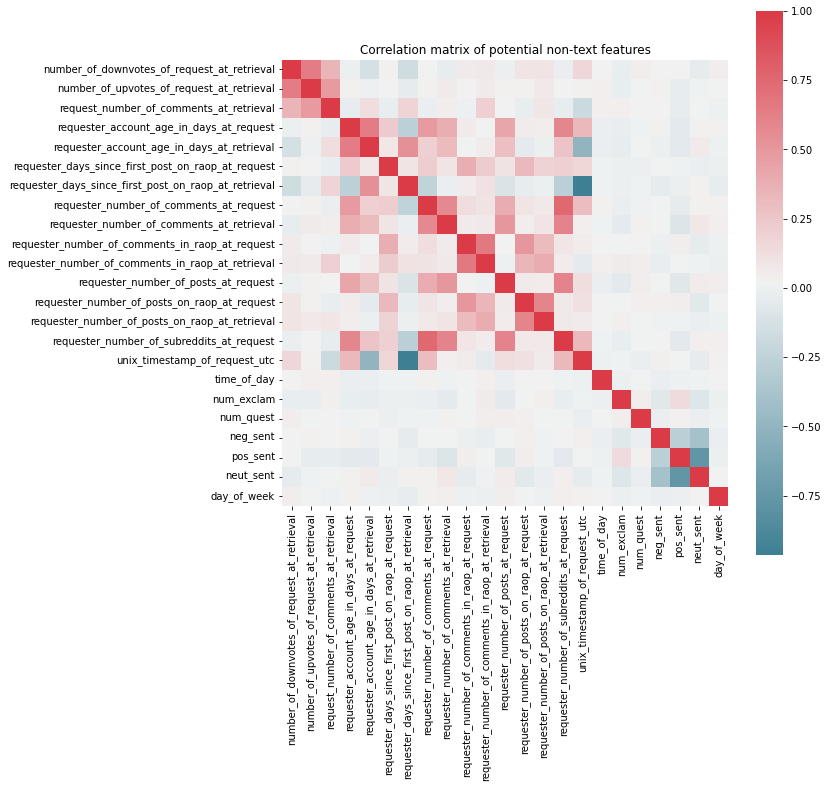

In [46]:
train_cv_test_numeric = remove_feature(train_cv_scaled[numeric_features], remove_features_high_corr)

f, ax = plt.subplots(figsize=(10,10))
corr = train_cv_test_numeric.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.title("Correlation matrix of potential non-text features")

In [47]:
train_cv_scaled_reduced = remove_feature(train_cv_scaled, remove_features_high_corr)
train_cv_scaled_reduced.shape

(3232, 24)

In [48]:
train_cv_scaled.shape

(3232, 30)

In [49]:
# do the same on test
test_cv_scaled_reduced = remove_feature(test_cv_scaled, remove_features_high_corr)
test_cv_scaled_reduced.shape

(808, 24)

In [50]:
run_logistic_cv(train_cv_scaled_reduced, train_cv_labels)


Best C parameter: {'C': 0.5}
Best f1 score: 0.6582495364714591
Logistic baseline best scores: accuracy = 0.8227, precision = 0.6213, recall = 0.7006, f1 = 0.6582

confusion matrix:
 [[2111  333]
 [ 226  562]]


In [51]:
run_knn_cv(train_cv_scaled_reduced, train_cv_labels)


Best parameters: {'n_neighbors': 3}
Best f1 score: 0.5054593472829483
KNN baseline best scores: accuracy = 0.8026, precision = 0.6504, recall = 0.4137, f1 = 0.5055

confusion matrix:
 [[2358   86]
 [ 291  497]]


#### Impact of removing highly correlated numeric features

The KNN model performance increased as we dropped highly correlated features, and Logisitc Regression model performance stayed at the same level. Removing highly correlated features help reduce overfitting of the model.


In [52]:
# expriment with just 'at request' features
run_logistic_cv(remove_feature(train_cv_scaled, remove_features_high_corr_all_retrieve), train_cv_labels)


Best C parameter: {'C': 10.0}
Best f1 score: 0.4522834342310418
Logistic baseline best scores: accuracy = 0.6683, precision = 0.3794, recall = 0.5608, f1 = 0.4523

confusion matrix:
 [[1728  716]
 [ 339  449]]


In [53]:
# expriment with just 'at retrieval' features
run_logistic_cv(remove_feature(train_cv_scaled, remove_features_high_corr_all_request), train_cv_labels)


Best C parameter: {'C': 0.01}
Best f1 score: 0.6543956746542848
Logistic baseline best scores: accuracy = 0.8153, precision = 0.6014, recall = 0.7183, f1 = 0.6544

confusion matrix:
 [[2076  368]
 [ 217  571]]


#### 'at retrieval'  vs. 'at request' features

Some of the 'at retrieval' and 'at request' features are highly correlated and we wanted to understand the performance of both. We previously experimented with using only the 'at request' features and saw the Logistic Regression model performance F1 score drop by about 0.2, but using only the 'at retrieval' features decreased Logisitc Regression model performance by 0.004. It seems that 'at retrieval' features, what happens on Reddit after the post was made, are more important than the 'at request' features, what happens just as the post is made. So prolonged Reddit activity affects pizza request success rate more.

Dataset to use after this operation

`train_cv_scaled_reduced, train_cv_labels`

In [54]:
train_cv_scaled_reduced.shape

(3232, 24)

In [55]:
test_cv_scaled_reduced.shape

(808, 24)

## 2.4 Logistic Regression and KNN Enhancements


## Text Preprocessing

We started with testing different pre-processing functions, and evaluated on best performance. Vectorizing the request texts creates over 5000 extra features in our model. We seek to use preprocessing as a means to reduce vocabulary size, and thus reduce number of resulting features.

In [56]:
nltk.download('words')

nltk.download('wordnet')

nltk.download('stopwords', quiet=True)

from nltk.corpus import words as eng_words

english_words = eng_words.words()

# get stop words list
stop_words = nltk.corpus.stopwords.words('english')

# stemmer = nltk.stem.porter.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# verb, adverb parameters for lemmatization
pos = ['v', 'a'] 


# new preproccesing function 
def preprocess_new(t):
    """
    Function to preprocess text with lemmatization improvements
    """
    
    # lowercase
    text = t.lower()
    # clean text
    text = re.sub("[^0-9a-zA-Z]+", " ", text)
    
    # lemmatize
    # for each part of speech
    for p in pos:
        #print(p)
        split_text = text.split()
        text  = " ".join([lemmatizer.lemmatize(word, p) for word in split_text]) 

    # split text into words
    words = text.split()
    # remove stop words 
    
    
    

    cleaned_words = [w for w in words if w not in stop_words and w in english_words]
    # join words together back into full text
    fin_text = " ".join(cleaned_words)

    return fin_text


[nltk_data] Downloading package words to /Users/ericling/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ericling/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [57]:
#vectorize the words to numbers
vectorizer = TfidfVectorizer(preprocessor = preprocess_new)

vectorizer.fit(need_to_vectorize_train_cv)

train_vec = vectorizer.transform(need_to_vectorize_train_cv)
test_vec = vectorizer.transform(need_to_vectorize_test_cv)

In [58]:
train_cv_text = pd.DataFrame(train_vec.toarray(), columns = vectorizer.get_feature_names_out())

In [59]:
train_cv_scaled_reduced.shape

(3232, 24)

In [60]:
# merge the 2 again
train_cv_text.index = train_cv_scaled_reduced.index # set index to be the same since scaled was a new datframe
train_cv_text_numeric = train_cv_scaled_reduced.join(train_cv_text)

train_cv_text_numeric.columns

Index(['post_was_edited', 'number_of_downvotes_of_request_at_retrieval',
       'number_of_upvotes_of_request_at_retrieval',
       'request_number_of_comments_at_retrieval',
       'requester_account_age_in_days_at_request',
       'requester_account_age_in_days_at_retrieval',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_days_since_first_post_on_raop_at_retrieval',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_at_retrieval',
       ...
       'za', 'zero', 'zig', 'zip', 'zodiac', 'zombie', 'zone', 'zoo',
       'zoology', 'zucchini'],
      dtype='object', length=5597)

In [61]:
train_cv_text_numeric.shape

(3232, 5597)

In [62]:
test_cv_scaled_reduced.shape

(808, 24)

In [63]:
test_vec.shape

(808, 5573)

In [64]:
test_text = pd.DataFrame(test_vec.toarray(), columns = vectorizer.get_feature_names_out())

In [65]:
# merge the 2 again: test set
test_text.index = test_cv_scaled_reduced.index # set index to be the same since scaled was a new datframe
test_final = test_cv_scaled_reduced.join(test_text) 
test_final.shape


(808, 5597)

#### Text Preprocessing Impact


The Logistic Regression and KNN model are using numeric and preprocessed text features.
Preprocessing the text data seems to increase the Logistic Regression model's (that removed highly correlated features) F1 score by 0.2 and decrease the KNN model's F1 score by 0.004. 
Thus, prepocessing is an effective way to reduce dimensionality of the models.


In [66]:
run_logistic_cv(train_cv_text_numeric, train_cv_labels)


Best C parameter: {'C': 1.0}
Best f1 score: 0.6717120317368076
Logistic baseline best scores: accuracy = 0.8348, precision = 0.6510, recall = 0.6955, f1 = 0.6717

confusion matrix:
 [[2202  242]
 [ 132  656]]


In [67]:
run_knn_cv(train_cv_text_numeric, train_cv_labels)


Best parameters: {'n_neighbors': 3}
Best f1 score: 0.5071094435873676
KNN baseline best scores: accuracy = 0.8032, precision = 0.6523, recall = 0.4150, f1 = 0.5071

confusion matrix:
 [[2357   87]
 [ 287  501]]


## Reducing Vocab size

In [68]:
# read in words used in older vectorizer. words ordered by descending frequency
top_full_words  = pd.read_csv('full_vocab.csv')

In [69]:
#vectorize the words to numbers
# choose top 1000 most frequent words in older Vectorizer as reduced vocabulary for this newer vectorizer
vectorizer_limit = TfidfVectorizer(preprocessor = preprocess_new, vocabulary = list(top_full_words['words'])[:1000]  )

vectorizer_limit.fit(need_to_vectorize_train_cv)

train_vec_limit = vectorizer_limit.transform(need_to_vectorize_train_cv)
test_vec_limit = vectorizer_limit.transform(need_to_vectorize_test_cv)

In [70]:
#convert to DataFrame
train_cv_text_limit = pd.DataFrame(train_vec_limit.toarray(), columns = vectorizer_limit.get_feature_names_out())

In [71]:
train_cv_text_limit.index = train_cv_scaled_reduced.index # set index to be the same since scaled was a new datframe
train_cv_text_numeric_limit = train_cv_scaled_reduced.join(train_cv_text_limit)

#### Reducing Vocab Impact

Limiting the vocabulary to 1000 top words didn't really change the Logistic Regression model F1 score and increased KNN model F1 score by 0.00176. This did not significantly increase model performance. Thus, we will look at other vocabulary reduction techniques later on.

In [72]:
run_logistic_cv(train_cv_text_numeric_limit, train_cv_labels)


Best C parameter: {'C': 0.5}
Best f1 score: 0.6716166150933837
Logistic baseline best scores: accuracy = 0.8311, precision = 0.6379, recall = 0.7107, f1 = 0.6716

confusion matrix:
 [[2167  277]
 [ 180  608]]


In [73]:
run_knn_cv(train_cv_text_numeric_limit, train_cv_labels)


Best parameters: {'n_neighbors': 3}
Best f1 score: 0.5086719585518111
KNN baseline best scores: accuracy = 0.8038, precision = 0.6544, recall = 0.4162, f1 = 0.5087

confusion matrix:
 [[2357   87]
 [ 287  501]]


In [74]:
train_final = train_cv_text_numeric.copy()
train_final_limited_vocab = train_cv_text_numeric_limit.copy()

`train_final` - final dataset 

`train_cv_labels` - final labels

### Note: don't clean up the text before feeding into the transformers

train_cv_data_cleaned -> need_to_vectorize_train_cv


In [75]:
'''
# clean the input text for transformer vectorization or l1 reduce vocab: train_cv_data_cleaned
train_cv_data_cleaned = []
for i in range(need_to_vectorize_train_cv.shape[0]):
    train_cv_data_cleaned.append(preprocess_new(need_to_vectorize_train_cv.iloc[i]))
train_cv_data_cleaned[0]
'''

'\n# clean the input text for transformer vectorization or l1 reduce vocab: train_cv_data_cleaned\ntrain_cv_data_cleaned = []\nfor i in range(need_to_vectorize_train_cv.shape[0]):\n    train_cv_data_cleaned.append(preprocess_new(need_to_vectorize_train_cv.iloc[i]))\ntrain_cv_data_cleaned[0]\n'

## Logistic Regression


**Logistic Regression - L1 regularization**
- Includes both Numeric and Text features

We tune the performance of L1 regularized Logistic Regression model with different level of regularization. 

The smaller the regularization, C, value the stronger and more penalizing the cost function is with "complex" model. Complex model here means having a lot of features with high coefficient values --- perhaps overfitting. 

Ideally, with L1 regularization, only the features that are of the most importance are left in the model. Any other features would have coefficients close to 0 due to the absolute value penalizing term in the cost function. 

Result: F1 score is 0.636, which is about 0.4 lower than L2 Logistic Regression model with text preprocessing (F1 score of 0.6717). L1 Regularization by itself does not seem to improve model performance.


In [137]:
parameters = {'C': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0,10.0, 100, 500, 800, 1000, 2000, 2750,3000, 5000, 10000]}
#'tol': [0.0000001,0.000001,0.00001, 0.0001, 0.015 ]
model = LogisticRegression( solver="liblinear", multi_class="auto", penalty = 'l1', tol = 0.0015)  
clf = GridSearchCV(model, parameters, cv = 5, scoring=['f1', 'accuracy', 'recall', 'precision'], refit='f1') #iid depreciated 
clf.fit (train_final, train_cv_labels)
#print('\n',clf.cv_results_)

print("\nBest C parameter:", clf.best_params_)
print("Best f1 score:", clf.best_score_)
print_metrics_cv('Logistic', clf)


# train_pred = clf.predict(train_final)    
# print_metrics('Logistic baseline', train_cv_labels, train_pred)

# #error analysis with confusion matrix see what's misclassified
# print('confusion matrix:\n',confusion_matrix(train_cv_labels, train_pred))


/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Best C parameter: {'C': 0.1}
Best f1 score: 0.6360321591888554
Logistic: accuracy = 0.8490, precision = 0.7709, recall = 0.5433, f1 = 0.6360


#### Impact of L1 Regularization on Logistic Regression model

Below, we outputted the list of most important features in the L1 regularized Logistic Regression model. These features are "most important", because their coefficients are greater than 0. L1 Regularization sets unimportant featrure coefficients to 0. L1 regularization helps with "dropping" or masking the unimportant features, so the model can focus more on the important featrures. .

There are 34 resulting important features. Only 14 out of 5573 words in our original cleaned text data are considered important from this L1 regularized Logistic Regression model. This means that the majority of the features that are impactful in the predictions come from the numeric and feature-engineered features (time_of_day, sentiment scores, number of exclamation and question marks). The textual data may simply be too noisy for the models to learn effectively what distinguishes a successful pizza request from an unsuccessful pizza request.

Features 'requester_number_of_comments_at_retrieval', 'make' and 'rice' seem to be the 3 most important features. We think that 'requester_number_of_comments_at_retrieval' may be a strong predictive feature because more comments increases the chance for pizza shop owners to see the request and send a pizza. For the sake of free publicity or pure good will, the pizza chains are probably more likely to give out pizzas to people with lots of comments and attention. Such reasoning is also backed by 'requester_number_of_posts_on_raop_at_retrieval' also being one of the top features alongside with number of upvotes and downvotes. Sending pizza to a popoular request equates to free publicity and advertising for the pizza shops.   


We will be exploring alternative models in the later sections and we will see that the models that take text data into more consideration perform worse. 

In [144]:
model = LogisticRegression(C = 0.5, solver="liblinear", multi_class="auto", penalty = 'l1', tol = 0.0015)  
model.fit (train_final, train_cv_labels)

print('\nMost important features:\n',np.nonzero(model.coef_)[1].shape) # top 34 imp features
print('\nMost important features:\n',model.coef_[model.coef_>0],'\n') # top 34 coef value

#print('\nMost important features:\n',np.nonzero(model.coef_)[1]) # only 34 features important

for i in np.nonzero(model.coef_)[1]:
    print('Important features: ', model.feature_names_in_[i])





Most important features:
 (34,)

Most important features:
 [0.54582549 0.0539198  0.60456808 0.07906779 0.22551247 0.13487527
 0.42605194 1.59106737 0.06335189 0.04859296 0.05976078 0.51662219
 0.46795456 0.45906124 1.17455703 0.18317461 0.80878011 0.78437772
 2.13433869 1.03998332 0.74820591 0.07449936 0.38482532] 

Important features:  post_was_edited
Important features:  number_of_downvotes_of_request_at_retrieval
Important features:  number_of_upvotes_of_request_at_retrieval
Important features:  request_number_of_comments_at_retrieval
Important features:  requester_account_age_in_days_at_request
Important features:  requester_days_since_first_post_on_raop_at_request
Important features:  requester_number_of_comments_at_request
Important features:  requester_number_of_comments_at_retrieval
Important features:  requester_number_of_comments_in_raop_at_request
Important features:  requester_number_of_comments_in_raop_at_retrieval
Important features:  requester_number_of_posts_at_reques

**Logistic Regression - L2 regularization**
- Includes both Numeric and Text features

This model is similar to our Baseline model from Part 1 (Text only Logistic Regression model with in-built balancing) . L2 regularization adds a squared weight coefficient term to the cost function. It pushes unimportant feature coefficents close to 0 and important features to be greater. This regularization aims to use every feature in the prediction. Again, the smaller the C value, the greater the penalty. 

Results: The cross validated F1 score is 0.6325. This L2 regularization model performs only slightly worse than L1 regularization model above (F1 score of 0.636). We will continue to explore regularization techniques.

In [88]:
parameters = {'C': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0,10.0, 100, 500, 800, 1000, 2000, 2750,3000, 5000, 10000]}
#'tol': [0.0000001,0.000001,0.00001, 0.0001, 0.015 ]
model = LogisticRegression( solver="liblinear", multi_class="auto", penalty = 'l2', tol = 0.0015)  
clf = GridSearchCV(model, parameters, cv = 5, scoring=['f1', 'accuracy', 'recall', 'precision'], refit='f1') #iid depreciated 
clf.fit (train_final, train_cv_labels)
#print('\n',clf.cv_results_)

print("\nBest C parameter:", clf.best_params_)
print("Best f1 score:", clf.best_score_)
print_metrics_cv('Logistic', clf)

# train_pred = clf.predict(train_cv_l2_vec)    
# print_metrics('Logistic baseline', train_cv_labels, train_pred)

# #error analysis with confusion matrix see what's misclassified
# print('confusion matrix:\n',confusion_matrix(train_cv_labels, train_pred))


Best C parameter: {'C': 0.5}
Best f1 score: 0.6324906730983044
Logistic: accuracy = 0.8478, precision = 0.7672, recall = 0.5395, f1 = 0.6325



**Logistic Regression - L1 regularization**
- Includes ONLY Text features


Here, we are using L1 regularization Logistic Regression model on only the text features. L1 regularization will do feature selection on the more "important" textual information.

#### Impact 

Cross-validated F1 score is 0.2602. The L1 regularized text-only model's performance is significantly lower, than that of the 1 regularized model with both numeric and text features.



In [76]:
#vectorize the words to numbers
vectorizer_l1 = TfidfVectorizer(preprocessor = preprocess_new)
#cv train data vectorized with smaller l1-reduced vocab
train_cv_l1_vec = vectorizer_l1.fit_transform(train_cv_data_cleaned)

In [77]:
parameters = {'C': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0,10.0, 100, 500, 800, 1000, 2000, 2750,3000, 5000, 10000]}
#'tol': [0.0000001,0.000001,0.00001, 0.0001, 0.015 ]
model = LogisticRegression( solver="liblinear", multi_class="auto", penalty = 'l1', tol = 0.0015)  
clf = GridSearchCV(model, parameters, cv = 5, scoring=['f1', 'accuracy', 'recall', 'precision'], refit='f1') #iid depreciated 
clf.fit (train_cv_l1_vec, train_cv_labels)
#print('\n',clf.cv_results_)

print("\nBest C parameter:", clf.best_params_)
print("Best f1 score:", clf.best_score_)
print_metrics_cv('Logistic', clf)

# train_pred = clf.predict(train_cv_l1_vec)    
# print_metrics('Logistic baseline', train_cv_labels, train_pred)

# #error analysis with confusion matrix see what's misclassified
# print('confusion matrix:\n',confusion_matrix(train_cv_labels, train_pred))

    

/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Best C parameter: {'C': 10000}
Best f1 score: 0.26018113500941553
Logistic: accuracy = 0.6324, precision = 0.2564, recall = 0.2652, f1 = 0.2602



**Reduce vocabulary size with L1 regularization**

Currently, we have more features and not enough samples. In cases like this, the models are prone to overfit.
To mitigate this, we try to use a smaller feature space to tackle our problem of high dimensionality. We use L1 regularization to reduce the vocabulary size. We use C=5000 hyperparameter because this parameter had the best F1 performance.

'train_cv_data_cleaned' is the textual data that's been cleaned by the 'preprocessor_new' function. L2 regularization will be using this reduced vocab size of just 11 words and fit it on on 'train_cv_data_cleaned'. 


We got a reduced vocab size of 2474 from the original 5414, which is great as this is smaller than our sample size of of 3232. 

In [78]:
C = 5000
lr_l1reduced = LogisticRegression(C = C, solver="liblinear", multi_class="auto",
                      tol=0.0015, penalty = 'l1') 

lr_l1reduced.fit(train_cv_l1_vec, train_cv_labels)

### removing all 0 columns
# https://stackoverflow.com/questions/51769962/
#find-and-delete-all-zero-columns-from-numpy-array
#-using-fancy-indexing
idx = np.argwhere(np.all(lr_l1reduced.coef_[..., :] == 0, axis=0))

#print('indices to remove from vocab list: ', idx)
idx_to_remove = [idx for i in idx for idx in i]
l1_reg_vocab_num = list(set(vectorizer.vocabulary_.values()) - set(idx_to_remove))

new_train_data = []

for regularized_non0 in l1_reg_vocab_num:
    for text, index in vectorizer.vocabulary_.items():
        if index == regularized_non0:
            new_train_data.append(text)

print('C value for l1 regularization: ', C)


print('L1 regularization reduced train data size: ',
      len(new_train_data))

print('cv f1 score: 26.02%. Shown in the last cell')



C value for l1 regularization:  5000
L1 regularization reduced train data size:  3424
cv f1 score: 27.72%. Shown in the last cell



**Logistic Regression - L2 regularization using the reduced vocabulary size from L1 regularization**
- Includes ONLY Textual features 


We used the reduced vocabulary from L1 regularization and pass that into a new L2 regularized Logistic Regression model.


#### Impact:

Using L1 regularization to reduce vocab size does not improve L2 Logistic Regression model performance. The cross validated F1 score, 0.2787, is lower than that of the simple L1 regularized Logistic Regression model. This shows that text data alone does not have the most predictive power. 

In [79]:
#vectorize the words to numbers
vectorizer_l2 = TfidfVectorizer(preprocessor = preprocess_new, vocabulary = new_train_data )
#cv train data vectorized with smaller l1-reduced vocab
train_cv_l2_vec = vectorizer_l2.fit_transform(train_cv_data_cleaned)

In [80]:
parameters = {'C': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0,10.0, 100, 500, 800, 1000, 2000, 2750,3000, 5000, 10000]}
#'tol': [0.0000001,0.000001,0.00001, 0.0001, 0.015 ]
model = LogisticRegression( solver="liblinear", multi_class="auto", penalty = 'l2')  
clf = GridSearchCV(model, parameters, cv = 5, scoring=['f1', 'accuracy', 'recall', 'precision'], refit='f1') #iid depreciated 
clf.fit (train_cv_l2_vec, train_cv_labels)
#print('\n',clf.cv_results_)

print("\nBest C parameter:", clf.best_params_)
print("Best f1 score:", clf.best_score_)
print_metrics_cv('Logistic', clf)


# train_pred = clf.predict(train_cv_l2_vec)    
# print_metrics('Logistic baseline', train_cv_labels, train_pred)

# #error analysis with confusion matrix see what's misclassified
# print('confusion matrix:\n',confusion_matrix(train_cv_labels, train_pred))

    

/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Best C parameter: {'C': 10000}
Best f1 score: 0.27874631330926525
Logistic: accuracy = 0.6361, precision = 0.2706, recall = 0.2893, f1 = 0.2787



**Logistic Regression - L2 regularization using the reduced vocabulary size from top 1000 important words**
- Includes both Numeric and Text features

We run a L2 regularized Logistic Regression model with both numeric features and reduced text features (below).

#### Impact
F1 score is 0.6591. The reduced vocabulary only slightly decreases the L2 model performance on the full feature set. This tells us that vobaulary reduction is a promising technique to follow. In future iterations of this model we may want to explore different vocabulary sizes.

In [416]:
train_cv_l2_vec_df = pd.DataFrame(train_cv_l2_vec.toarray(), columns = vectorizer_l2.get_feature_names_out())

In [405]:
train_final_new_vocab = train_cv_l2_vec_df

# use just numeric dataset train_cv_text_numeric
# merge the 2 again
train_final_new_vocab.index = train_cv_numeric.index # set index to be the same since scaled was a new datframe
train_final_new_vocab = train_cv_numeric.join(train_final_new_vocab)

In [406]:
run_logistic_cv(train_final_new_vocab, train_cv_labels)


Best C parameter: {'C': 0.5}
Best f1 score: 0.6590868952448953
Logistic baseline best scores: accuracy = 0.8249, precision = 0.6273, recall = 0.6954, f1 = 0.6591

confusion matrix:
 [[2147  297]
 [ 172  616]]


### Comparison: Logistic Regression Models

L2 regularized Logistic Regression with numeric data and L1 reduced vocabulary (right above) vs. L2 regularized logistic regression with numeric data and full vocabulary.

L2 regularized Logistic Regression with numeric data and L1 reduced vocabulary (right above) had F1 score of 0.6591, which is less than F1 score of the L2 regularized Logistic Regression with numeric data and full vocabulary, 0.6717 (below). Thus the L1 regularization for vocabulary reduction reduces model performance.

Furthermore, the text-only L2 regularized model with reduced vocab was only able to produce a F1 score of 0.2787. This shows that the numeric data was more important than the text data in the Logistic Regression model prediction. 

In [407]:
run_logistic_cv(train_final, train_cv_labels)


Best C parameter: {'C': 1.0}
Best f1 score: 0.6717120317368076
Logistic baseline best scores: accuracy = 0.8348, precision = 0.6510, recall = 0.6955, f1 = 0.6717

confusion matrix:
 [[2202  242]
 [ 132  656]]


## 2.5 Random Forest with hyperparameter tuning

Random forest randomly picks a subset of the data and a subset of the features to train decision trees. These trees' results are then aggregated to produce the final random forest model. We are trying to hyperparameter tune our random forest with our train_final data (numeric and text) using 'min_samples_split', 'min_samples_split', and 'max_depth'. 

'min_samples_split' ensures there are more than X samples to split the node so that the model would be less likely to overfit. For example, in the extreme case where every different sample is split into a different node, the model would likely just remember the train data features and not generalize well to new data. With this minimum threshold requirement, the learning would not be too specific as the splitting would be stop earlier as to not learn the nuance details/ specific attributes of the train set. Similarly, 'max_depth' is closely related to 'min_samples_split' as this is how deep the decision tree should grow until. By setting this limit, the trees may not split until fully finish categorizing all the train information; thereby, would be more likely to generalize well to new data and not overfit. With 'min_samples_leaf', the aim is to set a requirement for how much samples each leaf node must have, anything that is too small and the tree has a lot of leaf of sample 1 (extreme case) would indicate that the model is drastically overfitting. In essence, these three parameters are trying to prevent the model from overfitting to the train set.  

#### Impact:

The highest performing Random Forest model is with the 'min_sample_split' of 7 with a F1 score of 0.4302. The poorer performance model parameters are 'min_samples_leaf' (best f1 score of 0.3423 with 'min_samples_leaf' of 2) and 'max_depth' (best f1 score of 0.2389)



In [410]:
parameters = {'min_samples_split': range(2,20)}

model = RandomForestClassifier(n_estimators=10, random_state=1)  
clf = GridSearchCV(model, parameters, cv = 5, scoring=['f1', 'accuracy', 'recall', 'precision'], refit='f1') #iid depreciated 
clf.fit (train_final, train_cv_labels)
#print('\n',clf.cv_results_)

print("\nBest C parameter:", clf.best_params_)
print("Best f1 score:", clf.best_score_)
print_metrics_cv('Random forest', clf)


Best C parameter: {'min_samples_split': 7}
Best f1 score: 0.43028047982931455
Random forest: accuracy = 0.8085, precision = 0.7747, recall = 0.2996, f1 = 0.4303


In [411]:
parameters = { 'min_samples_leaf': range(2,20)}

model = RandomForestClassifier(n_estimators=10, random_state=1)  
clf = GridSearchCV(model, parameters, cv = 5, scoring=['f1', 'accuracy', 'recall', 'precision'], refit='f1') #iid depreciated 
clf.fit (train_final, train_cv_labels)

print("\nBest C parameter:", clf.best_params_)
print("Best f1 score:", clf.best_score_)
print_metrics_cv('Random forest', clf)   

/Users/tflint/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tflint/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tflint/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tflint/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classi


Best C parameter: {'min_samples_leaf': 2}
Best f1 score: 0.34235747756007673
Random forest: accuracy = 0.7939, precision = 0.7861, recall = 0.2209, f1 = 0.3424


In [412]:
parameters = { 'max_depth': range(2,20)}

model = RandomForestClassifier(n_estimators=10, random_state=1)  
clf = GridSearchCV(model, parameters, cv = 5, scoring=['f1', 'accuracy', 'recall', 'precision'], refit='f1') #iid depreciated 
clf.fit (train_final, train_cv_labels)

print("\nBest C parameter:", clf.best_params_)
print("Best f1 score:", clf.best_score_)
print_metrics_cv('Random forest', clf)

    

/Users/tflint/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tflint/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tflint/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tflint/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classi

/Users/tflint/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Best C parameter: {'max_depth': 19}
Best f1 score: 0.23891998308446133
Random forest: accuracy = 0.7834, precision = 0.8045, recall = 0.1422, f1 = 0.2389



### Comparison: Random Forest vs.  Logistic Regression

The best Logistic Regression model so far is the L2 regularized logistic regression with numeric and full textual data.

We see the best Random Forest model (F1 score of 0.4303) underperforms the best Logistic Regression model (F1 score of 0.6717) on the same numeric and text data. Random Forests perform poorly on imbalanced data. Also our data is fairly spare due to the large number of word vectors, and this can hinder Random Forest's predictive capabilities. 
Additionally, the low performance could be due to the fact that Random Forest may have a lot of decision trees focused on the textual data since there are a lot more textual features than numeric features in our dataset. Therefore, many trees could be training a lot on the textual features, which have slightly lower predictive power than the numeric features. 

The Random Forest, however, is able to perform better than Logistic Regression model with the textual data (F1 score of 0.26) possibly because some trees still have the benefit of learning more from the numeric data than text data.

Therefore the final Random Forest with numeric and text data performs better than Logistic Regression model with the textual data, but worse than Logistic Regression model with numeric and text data.


In [83]:
parameters = { 'min_samples_split': [7]}

model = RandomForestClassifier(n_estimators=10, random_state=1)  
clf = GridSearchCV(model, parameters, cv = 5, scoring=['f1', 'accuracy', 'recall', 'precision'], refit='f1') #iid depreciated 
clf.fit (train_final, train_cv_labels)

print("\nBest C parameter:", clf.best_params_)
print("Best f1 score:", clf.best_score_)
print_metrics_cv('Random forest', clf)


Best C parameter: {'min_samples_split': 7}
Best f1 score: 0.43028047982931455
Random forest: accuracy = 0.8085, precision = 0.7747, recall = 0.2996, f1 = 0.4303


## 2.6 XGBoost 


Here we look at a XGBoost model. XGBoost (or _eXtreme Gradient Boosting_) is a form of gradient boosting algorithm that allows for hyperparameters that help address imbalanced data issues by focusing on improving the misclassified minority class samples.
One can also adjust the learning rate of the model to address overfitting common to gradient boosting models. These tuning flexibility, and the well-documented speed performance of XGBoost make it strong candidate for predictive modeling.

#### Impact:

The XGBoost implementation produced the best performance metrics with F1 score of 0.6738. The XGBoost's F1 score is 0.0021 higher than the F1 score of the best performing Logistic Regression model, 0.6717. XGBoost also outperforms the Random Forest by a high margin (0.24), largely due to its fix on imbalanced data.


In [154]:

xgb_model = xgb.XGBClassifier(eta=0.01, scale_pos_weight=2,  verbosity = 0,silent=True, use_label_encoder=False)

parameters = {'nthread':[4],
            'objective':['binary:logistic'],
              'learning_rate': [  0.01, 0.03], #so called `eta` value
                'max_depth': [2,5,9],

              'min_child_weight': [11],
              'silent': [1]}

# cross-val
cv_xgb = GridSearchCV(xgb_model, parameters, scoring=['f1', 'accuracy', 'recall', 'precision'], refit='f1')
cv_xgb.fit(train_cv_text_numeric, train_cv_labels)

print("\nBest parameters:", cv_xgb.best_params_)
print("Best f1 score:", cv_xgb.best_score_)

print_metrics_cv('XGB best scores', cv_xgb)

/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt

/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt


Best parameters: {'learning_rate': 0.03, 'max_depth': 9, 'min_child_weight': 11, 'nthread': 4, 'objective': 'binary:logistic', 'silent': 1}
Best f1 score: 0.6737567037225964
XGB best scores: accuracy = 0.8478, precision = 0.7059, recall = 0.6447, f1 = 0.6738


In [85]:
clf = xgb.XGBClassifier(eta=0.01, scale_pos_weight=2,
                        verbosity = 0,silent=True, use_label_encoder=False,
                        max_depth = 9, learning_rate = 0.03, objective = 'binary:logistic'
                       )

clf.fit(train_cv_text_numeric, train_cv_labels)


/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.01, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.03, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2, silent=True,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

### 20 most important features for XGBoost

Here are the 20 most important features for the XGBoost model. 

We can see that many word features like 'yesterday', 'mother', 'financially', 'pregnant' are in the feature list. These words demonstrate that requests with words related to financial circumstances or personal health situations have a strong impact on request result. Numeric features like 'request_number_of_comments_at_retrieval' and 'requester_number_of_posts_on_raop_at_retrieval' are also significant features. This shows that post popularity, measured via comments, and user activity, measured via user posts so far, likely increase the chance that a request receives a free pizza.

In [175]:
#the lower on the list, the more important
#clf.get_booster().get_score(importance_type="gain") # features and coefficient
sorted(clf.get_booster().get_score(importance_type="gain"), 
       key = clf.get_booster().get_score(importance_type="gain").get)[-20:]# 20 most important

['yesterday',
 'consider',
 'actually',
 'month',
 'mother',
 'search',
 'matter',
 'grill',
 'drink',
 'financially',
 'summer',
 'amaze',
 'subsist',
 'pregnant',
 'seem',
 'use',
 'northwest',
 'benefit',
 'request_number_of_comments_at_retrieval',
 'requester_number_of_posts_on_raop_at_retrieval']

## 20 least important features for XGBoost

Here are the 20 least important features for the XGBoost model. 

We can all the least important features are words. 
We see many word features like 'fight', 'alone', 'cook', 'cheesy' are in the feature list. The words in the list are related to just wishes for free food, rather than specific reasons as to why the food is needed.

In [174]:
#clf.get_booster().get_score(importance_type="gain") # features and coefficient
sorted(clf.get_booster().get_score(importance_type="gain"), 
       key = clf.get_booster().get_score(importance_type="gain").get)[:20]# 20 least important

['happen',
 'great',
 'ago',
 'figure',
 'fight',
 'whatever',
 'situation',
 'stay',
 'wait',
 'care',
 'alone',
 'financial',
 'full',
 'let',
 'bank',
 'unfortunately',
 'cheesy',
 'wonder',
 'fail',
 'cook']

## 2.7 BERT 

We create a BERT transformer model with numeric and text features. BERT has already been pre-trained on other text corpuses, so it is a fairly popular and stable model.

#### Impact 

1) Textual data only: We were not able to get a high performance from the textual data alone with BERT (Appendix shows the different models we had tried: 2 hidden layers, 1 hidden layer with different neurons). This may because the model is focusing too much on the words in the noisy dataset. The models are predicting mainly the majority class and not able to discern between successful and unsuccesful pizza requests from the text alone. 

2) Both Numeric and Text data: F1 score of 0.3692 and shown in the following cells' confusion matrix. 
The performance of this BERT model is similar to Random Forest and is lower than the best performin Logistic Regression model (F1 score of 0.6717). We thought that with a sigmoid function final layer, BERT should perform similarly to a logistic regression model, but BERT performance is worse than that of the logistic regression. This may be a result of the transformer placing a lot of emphasis on the textual data, which has a lot of noise. Furthermore, the successful and unsucessful pizza requests may just not have significant differences in textual data, so textual data may not have strong predictive power. 



In [76]:
train_final.shape[1] - train_cv_text.shape[1]

24

In [77]:
# get the numeric features without the subr stuff
train_cv_scaled_numeric_drop_subr = train_cv_scaled_reduced[train_cv_scaled_reduced.columns.drop(list(train_cv_scaled_reduced.filter(regex='subr_')))]
train_cv_scaled_numeric_drop_subr.shape


(3232, 24)

In [79]:
train_cv_scaled_numeric_drop_subr.columns

Index(['post_was_edited', 'number_of_downvotes_of_request_at_retrieval',
       'number_of_upvotes_of_request_at_retrieval',
       'request_number_of_comments_at_retrieval',
       'requester_account_age_in_days_at_request',
       'requester_account_age_in_days_at_retrieval',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_days_since_first_post_on_raop_at_retrieval',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_at_retrieval',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_comments_in_raop_at_retrieval',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_posts_on_raop_at_retrieval',
       'requester_number_of_subreddits_at_request',
       'unix_timestamp_of_request_utc', 'time_of_day', 'num_exclam',
       'num_quest', 'neg_sent', 'pos_sent', 'neut_sent', 'day_of_week'],
      dtype='object')

In [69]:
!pip install transformers

In [80]:
from transformers import AutoTokenizer, TFAutoModel

model_name = 'distilbert-base-uncased'
bert_model = TFAutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Metal device set to: Apple M1


2022-04-24 13:20:33.871399: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-24 13:20:33.871810: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-24 13:20:33.894232: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_layer_norm', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task 

In [89]:
# simplest model with low epoch on concatenated text (title and text of request)
# Testing concatenating the numeric features

# Keep the same input and embedding layers
max_length = 128
input_ids = layers.Input(shape=(max_length), dtype=tf.int32)
attention_mask = layers.Input(shape=(max_length), dtype=tf.int32)

input_numeric = layers.Input(shape = (24,) ) #24 numeric features

# Now add the pretrained language model (freeze the weights to not fine tune it)
# (the [0] index gives the output of the last hidden layer)
bert_model.trainable = False
bert_hidden = bert_model(input_ids, attention_mask=attention_mask)[0]

# Only use the bert vector for the first token in each sequence, which is
# a special sentence start token that captures a sentence embedding
bert_hidden_sent = tf.squeeze(tf.split(bert_hidden, max_length, axis=-2)[0], axis=-2)

# adding intermediate layers
#hidden = layers.Dense(512, activation = 'relu' )(bert_hidden_sent)
#dropout = layers.Dropout(0.8)(hidden)
#output = layers.Dense(1, activation='sigmoid')(bert_hidden_sent)


#add numeric features
concat = layers.concatenate([bert_hidden_sent, input_numeric], axis = -1) 

# Add only one output layer after BERT model output concatenated with numeric
concat_output = layers.Dense(1, activation='sigmoid')(concat)

# train_cv_data_cleaned is just the text data 
train_docs_encoded = tokenizer(list(need_to_vectorize_train_cv),
                               padding=True,
                               truncation=True,
                               max_length=max_length,
                               return_tensors='tf')

# adding numeric features: train_cv_scaled_reduced
train_input_vals = [train_docs_encoded['input_ids'],
                    train_docs_encoded['attention_mask'], train_cv_scaled_numeric_drop_subr]

model = Model(inputs=[input_ids, attention_mask, input_numeric], outputs=concat_output)
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=[ 'accuracy'])
model.fit(train_input_vals, train_cv_labels, epochs=5, verbose=0)

'''
#using cv set, didn't split for dev set
dev_docs_encoded = tokenizer(dev_data_cleaned,
                             padding=True,
                             truncation=True,
                             max_length=max_length,
                             return_tensors='tf')
dev_input_vals = [dev_docs_encoded['input_ids'],
                  dev_docs_encoded['attention_mask'],numeric_df_dev ] #numeric_df_dev
'''
 
print('Accuracy on train data: %.4f\n ' %
      (model.evaluate(train_input_vals, train_cv_labels)[-1]))
      #' Accuracy on dev data: %.4f'', model.evaluate(dev_input_vals, dev_labels)[-1])

print( '\n\nconfusion matrix train data:\n',
    metrics.confusion_matrix(train_cv_labels, np.ndarray.round(model.predict(train_input_vals))))
'''
# using the cv set 
print( '\n\nconfusion matrix train data: ',
    metrics.confusion_matrix(dev_labels, np.ndarray.round(model.predict(dev_input_vals))))
'''    

2022-04-24 13:22:07.668625: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-24 13:22:10.453812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 13:31:36.022164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 90s 888ms/step - loss: 0.4399 - accuracy: 0.8007
Accuracy on train data: 0.8007
 


2022-04-24 13:33:06.507336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.




confusion matrix train data:
 [[2385   59]
 [ 585  203]]


"\n# using the cv set \nprint( '\n\nconfusion matrix train data: ',\n    metrics.confusion_matrix(dev_labels, np.ndarray.round(model.predict(dev_input_vals))))\n"

## 2.8 Test Set Performance on Best Models: XGBoost and Logistic Regression


Top 2 Models:
- XGBoost with numeric and textual data
- L2 regularized Logistic Regression with numeric and textual data

In [101]:
## xgboost 

clf = xgb.XGBClassifier(eta=0.01, scale_pos_weight=2,
                        verbosity = 0,silent=True, use_label_encoder=False,
                        max_depth = 9, learning_rate = 0.03, objective = 'binary:logistic'
                       )

clf.fit(train_cv_text_numeric, train_cv_labels)

test_pred = clf.predict(test_final)
print_metrics('xgboost on test data: ', test_cv_labels, test_pred)

/opt/homebrew/Caskroom/miniforge/base/envs/conda_tensorflow_venv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


xgboost on test data: : accuracy = 0.8527, precision = 0.7277, recall = 0.6748, f1 = 0.7003


In [104]:
## logistic regression L2 regularized 
model = LogisticRegression( solver="liblinear", multi_class="auto", penalty = 'l2', 
                           tol = 0.0015, C = 1)  # C = 1 the best from cv 

model.fit(train_cv_text_numeric, train_cv_labels)

test_pred = model.predict(test_final)
print_metrics('L2 Logistic Regression on test data: ', test_cv_labels, test_pred)



L2 Logistic Regression on test data: : accuracy = 0.8428, precision = 0.7582, recall = 0.5631, f1 = 0.6462


XGBoost (F1 score of 0.7003) performs better than Logistic Regression on the test set (F2 score of 0.6462). XGBoost is a more complex model that can handle many features more efficiently. 

## 2.9 Final Summary

In conclusion, we find that XGBoost and L2 regularized Logistic Regression were the top two models on the training data, but the XGBoost performs better on the test set (F1 score of 0.7003). XGBoost can handle high dimensionality and missing data very well can can run very quickly, giving it the advantage over Logistic Regression. XGBoost improves the shortcomings of Random Forests, such as better balancing techqniues. K-Nearest Neighbors underperforms Logistic Regression in most cases, and this could be due to the high dimensionality of our features. BERT model did not work that well, and it is likely to its heavier focus on the text data, which had a fair bit of noise. 


To arrive at this conclusion, we explored the data and implemented simple models as our baseline in Part 1. 

The baseline model exploration helped us to spot a couple of issues that need to be resolved, such as imbalanced data and overfitting. From our EDA, we see about only 25% of requests were granted pizzas. In an initial attempt to address the imbalanced data, we implemented SMOTE balancing and in-built balancing for the successful pizza requests. 
We also had a large number of features, which caused the curse of dimensionality problem. This also caused our models to heavily overfit in Part 1. In Part 2, we aim to address these challenges in detail. Thus, we implemented each enhancement separately to see its impact on model performance in Part 2. We also experimented with running models on only numeric, only textual, and both numeric and textual features.

Enhancements include:

- Balance the data
    - SMOTE
    - in-built balancing
- Clean and impute the outliers and missing values 
- Cross validation
- Text preprocessing and lemmatization
- Feature Engineering 
    - Adding features on punctuation count and sentiment score from text data
    - Adding features on time of day and day of week from some numeric features
- Scale the data
- Remove highly correlated numeric features
- Measure F1 score instead of accuracy
- Reduce the vocab size
    - Using only the top 1000 most frequent words 
    - Using L1 regularization 
    

Each of these techniques, except for reducing vocab size increased Logistic Regression's and sometimes KNN model's F1 scores.

We use F1 score, instead of accuracy, as a measure of performance because our original datset was heavily imbalanced.

We found that 'at retrieval' features, what happens on Reddit after the post was made, are more important than the 'at request' features, what happens right as the post is made. So, prolonged Reddit activity affects pizza request success rate more. We also discovered that word features, from request text, hold less predictive power than numeric features, request metrics and metadata. This means that request success is more determined by objective features like number of upvotes, rather than what words and sentiment a requestor uses in the post. 

In summary, post popularity, measured via comments, and user activity, measured via user posts so far, likely increase the chance that a request receives a free pizza. Using words related to food insecurity and specific needs also increase the chance of receving a pizza.

From this analysis, we learned that:
1. Understanding the data is crucial in deciding on existing menu of prediction models that offer varying degrees of performance depending on data characteristics and issues. This includes understanding data anomalies or unexpected inputs and how different models behave with these. 
2. This data understanding then guides feature engineering and selection, and hyperparameter tuning.
3. Baseline estimates, and using appropriate performance metrics, are important to gauge improvements in model outcomes.
4. Collaboration and leveraging on each others strengths can lead to a more efficient work flow in a team.

We aim for this analysis to provide helpful insight into user language patterns and behavior on not only Reddit, but also other online forumns and social media platforms. Such work will aid in improving user engagement and retention.



# Contribution


## Eric (Yue) : 

Model comparison and analysis. BERT (with and without numeric data), Random Forest, XGBoost (with Tanya), L1 -> L2 Regularization on Text only. Notebook review. Team communication (slack and zoom participation).

## Krutika :

EDA and summaries on Textual data. Feature engineering on text data. Implemented Logistic Regression models on variations of numeric and text data and created vocabulary reduction and text preprocessing methods. Wrote and edited summaries and explanations around model building. Part 1 and Part 2 summaries and edits. Formatted, cleaned, and reviewed entire notebook. Set up meetings. Constant communication with team. 


## Tanya :

Write summaries and introduction for the baseline model and parts of my code. Find and fix issues with the baseline models, clean the dataset, run experiments and make sure our decisions to scale, drop features, limit the vocabulary are backed by results, try running different models KNN, XGBoost, Logistic Regression and SGD. Attend all meetings and help with issues, review final submission.

## Mitch :

EDA (non-textual), initial XGBoost implementation, draft report (intro, non-text EDA), summary, XGBoost)



-----

# Appendix: Transformers on the text data

### BERT - Manual tuning of the hyperparameters for the transformer without GridsearchCV
2 models we are considering are the 2 intermediate hidden layers and 1 intermediate hidden layer. 

Some models were ran twice just to see an "average" of the stochastic output performance.

In general, the model predicted mainly the majority class. 

In [90]:
# simplest model (no hidden layer) on concatenated text (title and text of request)

# Keep the same input and embedding layers
max_length = 128 # change back to 128
input_ids = layers.Input(shape=(max_length), dtype=tf.int32)
attention_mask = layers.Input(shape=(max_length), dtype=tf.int32)

# Now add the pretrained language model (freeze the weights to not fine tune it)
# (the [0] index gives the output of the last hidden layer)
bert_model.trainable = False
bert_hidden = bert_model(input_ids, attention_mask=attention_mask)[0]

# Only use the bert vector for the first token in each sequence, which is
# a special sentence start token that captures a sentence embedding
bert_hidden_sent = tf.squeeze(tf.split(bert_hidden, max_length, axis=-2)[0], axis=-2)

# adding intermediate layers
#hidden = layers.Dense(512, activation = 'relu' )(bert_hidden_sent)
#dropout = layers.Dropout(0.8)(hidden)

# Add only one output layer after BERT model
output = layers.Dense(1, activation='sigmoid')(bert_hidden_sent)

train_docs_encoded = tokenizer(list(need_to_vectorize_train_cv),
                               padding=True,
                               truncation=True,
                               max_length=max_length,
                               return_tensors='tf')
train_input_vals = [train_docs_encoded['input_ids'],
                    train_docs_encoded['attention_mask']]

model = Model(inputs=[input_ids, attention_mask], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=[ tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.fit(train_input_vals, train_cv_labels, epochs=5, verbose=0)


'''
dev_docs_encoded = tokenizer(dev_data_cleaned,
                             padding=True,
                             truncation=True,
                             max_length=max_length,
                             return_tensors='tf')
dev_input_vals = [dev_docs_encoded['input_ids'],
                  dev_docs_encoded['attention_mask']]
'''

print('Accuracy on train data: %.4f' %
      (model.evaluate(train_input_vals, train_cv_labels)[-1]))

#'\n  Accuracy on dev data: %.4f',model.evaluate(dev_input_vals, dev_labels)[-1])


print( '\n\nconfusion matrix train data:\n',
    metrics.confusion_matrix(train_cv_labels, np.ndarray.round(model.predict(train_input_vals))))


2022-04-24 13:37:18.669728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 13:46:16.559019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 98s 960ms/step - loss: 0.5408 - precision: 0.0000e+00 - recall: 0.0000e+00
Accuracy on train data: 0.0000


2022-04-24 13:47:54.440856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.




confusion matrix train data:
 [[2444    0]
 [ 788    0]]


In [91]:
# simplest model (no hidden layer) on concatenated text (title and text of request)

# Keep the same input and embedding layers
max_length = 128 # change back to 128
input_ids = layers.Input(shape=(max_length), dtype=tf.int32)
attention_mask = layers.Input(shape=(max_length), dtype=tf.int32)

# Now add the pretrained language model (freeze the weights to not fine tune it)
# (the [0] index gives the output of the last hidden layer)
bert_model.trainable = False
bert_hidden = bert_model(input_ids, attention_mask=attention_mask)[0]

# Only use the bert vector for the first token in each sequence, which is
# a special sentence start token that captures a sentence embedding
bert_hidden_sent = tf.squeeze(tf.split(bert_hidden, max_length, axis=-2)[0], axis=-2)

# adding intermediate layers
#hidden = layers.Dense(512, activation = 'relu' )(bert_hidden_sent)
#dropout = layers.Dropout(0.8)(hidden)

# Add only one output layer after BERT model
output = layers.Dense(1, activation='sigmoid')(bert_hidden_sent)

train_docs_encoded = tokenizer(list(need_to_vectorize_train_cv),
                               padding=True,
                               truncation=True,
                               max_length=max_length,
                               return_tensors='tf')
train_input_vals = [train_docs_encoded['input_ids'],
                    train_docs_encoded['attention_mask']]

model = Model(inputs=[input_ids, attention_mask], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=[ tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.fit(train_input_vals, train_cv_labels, epochs=5, verbose=0)


'''
dev_docs_encoded = tokenizer(dev_data_cleaned,
                             padding=True,
                             truncation=True,
                             max_length=max_length,
                             return_tensors='tf')
dev_input_vals = [dev_docs_encoded['input_ids'],
                  dev_docs_encoded['attention_mask']]
'''

print('Accuracy on train data: %.4f' %
      (model.evaluate(train_input_vals, train_cv_labels)[-1]))

#'\n  Accuracy on dev data: %.4f',model.evaluate(dev_input_vals, dev_labels)[-1])

2022-04-24 13:49:53.135922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 13:59:23.639264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 106s 1s/step - loss: 0.5344 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Accuracy on train data: 0.0000


In [92]:
metrics.confusion_matrix(train_cv_labels, np.ndarray.round(model.predict(train_input_vals)))


2022-04-24 14:01:09.994528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[2444,    0],
       [ 788,    0]])

In [132]:
# 1 intermediate layer: 512 neutrons

# Keep the same input and embedding layers
max_length = 128 # change back to 128
input_ids = layers.Input(shape=(max_length), dtype=tf.int32)
attention_mask = layers.Input(shape=(max_length), dtype=tf.int32)

# Now add the pretrained language model (freeze the weights to not fine tune it)
# (the [0] index gives the output of the last hidden layer)
bert_model.trainable = False
bert_hidden = bert_model(input_ids, attention_mask=attention_mask)[0]

# Only use the bert vector for the first token in each sequence, which is
# a special sentence start token that captures a sentence embedding
bert_hidden_sent = tf.squeeze(tf.split(bert_hidden, max_length, axis=-2)[0], axis=-2)

# adding intermediate layers
hidden = layers.Dense(512, activation = 'relu' )(bert_hidden_sent)
dropout = layers.Dropout(0.8)(hidden)

# Add only one output layer after BERT model
output = layers.Dense(1, activation='sigmoid')(hidden)

train_docs_encoded = tokenizer(list(need_to_vectorize_train_cv),
                               padding=True,
                               truncation=True,
                               max_length=max_length,
                               return_tensors='tf')
train_input_vals = [train_docs_encoded['input_ids'],
                    train_docs_encoded['attention_mask']]

model = Model(inputs=[input_ids, attention_mask], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=[ tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.fit(train_input_vals, train_cv_labels, epochs=5, verbose=0)


'''dev_docs_encoded = tokenizer(dev_data_cleaned,
                             padding=True,
                             truncation=True,
                             max_length=max_length,
                             return_tensors='tf')
dev_input_vals = [dev_docs_encoded['input_ids'],
                  dev_docs_encoded['attention_mask']]
'''

print('Accuracy on train data: %.4f' %
      (model.evaluate(train_input_vals, train_cv_labels)[-1]))

#'\n  Accuracy on dev data: %.4f',model.evaluate(dev_input_vals, dev_labels)[-1])
metrics.confusion_matrix(train_cv_labels, np.ndarray.round(model.predict(train_input_vals)))


2022-04-11 15:19:23.710396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-11 15:28:47.208979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 106s 1s/step - loss: 0.5212 - precision_9: 0.0000e+00 - recall_9: 0.0000e+00
Accuracy on train data: 0.0000


2022-04-11 15:30:32.750777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[2444,    0],
       [ 788,    0]])

In [133]:
# 1 intermediate layer: 512 neutrons

# Keep the same input and embedding layers
max_length = 128 # change back to 128
input_ids = layers.Input(shape=(max_length), dtype=tf.int32)
attention_mask = layers.Input(shape=(max_length), dtype=tf.int32)

# Now add the pretrained language model (freeze the weights to not fine tune it)
# (the [0] index gives the output of the last hidden layer)
bert_model.trainable = False
bert_hidden = bert_model(input_ids, attention_mask=attention_mask)[0]

# Only use the bert vector for the first token in each sequence, which is
# a special sentence start token that captures a sentence embedding
bert_hidden_sent = tf.squeeze(tf.split(bert_hidden, max_length, axis=-2)[0], axis=-2)

# adding intermediate layers
hidden = layers.Dense(512, activation = 'relu' )(bert_hidden_sent)
dropout = layers.Dropout(0.8)(hidden)

# Add only one output layer after BERT model
output = layers.Dense(1, activation='sigmoid')(hidden)

train_docs_encoded = tokenizer(list(need_to_vectorize_train_cv),
                               padding=True,
                               truncation=True,
                               max_length=max_length,
                               return_tensors='tf')
train_input_vals = [train_docs_encoded['input_ids'],
                    train_docs_encoded['attention_mask']]

model = Model(inputs=[input_ids, attention_mask], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=[ tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.fit(train_input_vals, train_cv_labels, epochs=5, verbose=0)


'''dev_docs_encoded = tokenizer(dev_data_cleaned,
                             padding=True,
                             truncation=True,
                             max_length=max_length,
                             return_tensors='tf')
dev_input_vals = [dev_docs_encoded['input_ids'],
                  dev_docs_encoded['attention_mask']]
'''

print('Accuracy on train data: %.4f' %
      (model.evaluate(train_input_vals, train_cv_labels)[-1]))

#'\n  Accuracy on dev data: %.4f',model.evaluate(dev_input_vals, dev_labels)[-1])
metrics.confusion_matrix(train_cv_labels, np.ndarray.round(model.predict(train_input_vals)))


2022-04-11 15:32:01.910638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-11 15:40:29.093127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 89s 864ms/step - loss: 0.5226 - precision_10: 0.8235 - recall_10: 0.0178
Accuracy on train data: 0.0178


2022-04-11 15:41:57.554187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[2441,    3],
       [ 774,   14]])

In [134]:
# 2 same intermediate 512 neutron layers

# Keep the same input and embedding layers
max_length = 128 # change back to 128
input_ids = layers.Input(shape=(max_length), dtype=tf.int32)
attention_mask = layers.Input(shape=(max_length), dtype=tf.int32)

# Now add the pretrained language model (freeze the weights to not fine tune it)
# (the [0] index gives the output of the last hidden layer)
bert_model.trainable = False
bert_hidden = bert_model(input_ids, attention_mask=attention_mask)[0]

# Only use the bert vector for the first token in each sequence, which is
# a special sentence start token that captures a sentence embedding
bert_hidden_sent = tf.squeeze(tf.split(bert_hidden, max_length, axis=-2)[0], axis=-2)

# adding intermediate layers
hidden = layers.Dense(512, activation = 'relu' )(bert_hidden_sent)
dropout = layers.Dropout(0.8)(hidden)

hidden1 = layers.Dense(512, activation = 'relu' )(hidden)
dropout1 = layers.Dropout(0.8)(hidden1)

# Add only one output layer after BERT model
output = layers.Dense(1, activation='sigmoid')(hidden1)

train_docs_encoded = tokenizer(list(need_to_vectorize_train_cv),
                               padding=True,
                               truncation=True,
                               max_length=max_length,
                               return_tensors='tf')
train_input_vals = [train_docs_encoded['input_ids'],
                    train_docs_encoded['attention_mask']]

model = Model(inputs=[input_ids, attention_mask], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=[ tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.fit(train_input_vals, train_cv_labels, epochs=5, verbose=0)


'''dev_docs_encoded = tokenizer(dev_data_cleaned,
                             padding=True,
                             truncation=True,
                             max_length=max_length,
                             return_tensors='tf')
dev_input_vals = [dev_docs_encoded['input_ids'],
                  dev_docs_encoded['attention_mask']]
'''

print('Accuracy on train data: %.4f' %
      (model.evaluate(train_input_vals, train_cv_labels)[-1]))

#'\n  Accuracy on dev data: %.4f',model.evaluate(dev_input_vals, dev_labels)[-1])
metrics.confusion_matrix(train_cv_labels, np.ndarray.round(model.predict(train_input_vals)))


2022-04-11 15:43:16.470621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-11 15:51:12.491430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 88s 865ms/step - loss: 0.5466 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Accuracy on train data: 0.0000


2022-04-11 15:52:41.934314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[2444,    0],
       [ 788,    0]])

In [135]:
# 512, 256-neutrons intermediate layers

# Keep the same input and embedding layers
max_length = 128 # change back to 128
input_ids = layers.Input(shape=(max_length), dtype=tf.int32)
attention_mask = layers.Input(shape=(max_length), dtype=tf.int32)

# Now add the pretrained language model (freeze the weights to not fine tune it)
# (the [0] index gives the output of the last hidden layer)
bert_model.trainable = False
bert_hidden = bert_model(input_ids, attention_mask=attention_mask)[0]

# Only use the bert vector for the first token in each sequence, which is
# a special sentence start token that captures a sentence embedding
bert_hidden_sent = tf.squeeze(tf.split(bert_hidden, max_length, axis=-2)[0], axis=-2)

# adding intermediate layers
hidden = layers.Dense(512, activation = 'relu' )(bert_hidden_sent)
dropout = layers.Dropout(0.8)(hidden)

hidden1 = layers.Dense(256, activation = 'relu' )(hidden)
dropout1 = layers.Dropout(0.8)(hidden1)

# Add only one output layer after BERT model
output = layers.Dense(1, activation='sigmoid')(hidden1)

train_docs_encoded = tokenizer(list(need_to_vectorize_train_cv),
                               padding=True,
                               truncation=True,
                               max_length=max_length,
                               return_tensors='tf')
train_input_vals = [train_docs_encoded['input_ids'],
                    train_docs_encoded['attention_mask']]

model = Model(inputs=[input_ids, attention_mask], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=[ tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.fit(train_input_vals, train_cv_labels, epochs=5, verbose=0)


'''dev_docs_encoded = tokenizer(dev_data_cleaned,
                             padding=True,
                             truncation=True,
                             max_length=max_length,
                             return_tensors='tf')
dev_input_vals = [dev_docs_encoded['input_ids'],
                  dev_docs_encoded['attention_mask']]
'''

print('Accuracy on train data: %.4f' %
      (model.evaluate(train_input_vals, train_cv_labels)[-1]))

#'\n  Accuracy on dev data: %.4f',model.evaluate(dev_input_vals, dev_labels)[-1])
metrics.confusion_matrix(train_cv_labels, np.ndarray.round(model.predict(train_input_vals)))


2022-04-11 15:53:53.895251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-11 16:01:50.130831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 89s 868ms/step - loss: 0.5225 - precision_12: 0.0000e+00 - recall_12: 0.0000e+00
Accuracy on train data: 0.0000


2022-04-11 16:03:18.967092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[2444,    0],
       [ 788,    0]])

In [ ]:
# 1 intermediate layer: 64 neutrons

# Keep the same input and embedding layers
max_length = 128 # change back to 128
input_ids = layers.Input(shape=(max_length), dtype=tf.int32)
attention_mask = layers.Input(shape=(max_length), dtype=tf.int32)

# Now add the pretrained language model (freeze the weights to not fine tune it)
# (the [0] index gives the output of the last hidden layer)
bert_model.trainable = False
bert_hidden = bert_model(input_ids, attention_mask=attention_mask)[0]

# Only use the bert vector for the first token in each sequence, which is
# a special sentence start token that captures a sentence embedding
bert_hidden_sent = tf.squeeze(tf.split(bert_hidden, max_length, axis=-2)[0], axis=-2)

# adding intermediate layers
hidden = layers.Dense(64, activation = 'relu' )(bert_hidden_sent)
dropout = layers.Dropout(0.8)(hidden)

# Add only one output layer after BERT model
output = layers.Dense(1, activation='sigmoid')(hidden)

train_docs_encoded = tokenizer(list(need_to_vectorize_train_cv),
                               padding=True,
                               truncation=True,
                               max_length=max_length,
                               return_tensors='tf')
train_input_vals = [train_docs_encoded['input_ids'],
                    train_docs_encoded['attention_mask']]

model = Model(inputs=[input_ids, attention_mask], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=[ tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.fit(train_input_vals, train_cv_labels, epochs=5, verbose=0)


'''dev_docs_encoded = tokenizer(dev_data_cleaned,
                             padding=True,
                             truncation=True,
                             max_length=max_length,
                             return_tensors='tf')
dev_input_vals = [dev_docs_encoded['input_ids'],
                  dev_docs_encoded['attention_mask']]
'''

print('Accuracy on train data: %.4f' %
      (model.evaluate(train_input_vals, train_cv_labels)[-1]))

#'\n  Accuracy on dev data: %.4f',model.evaluate(dev_input_vals, dev_labels)[-1])
metrics.confusion_matrix(train_cv_labels, np.ndarray.round(model.predict(train_input_vals)))


2022-04-24 14:12:12.025728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-24 14:20:53.280431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 99s 963ms/step - loss: 0.5251 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Accuracy on train data: 0.0000


2022-04-24 14:22:31.537078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [137]:
# 1 intermediate layer: 32 neutrons

# Keep the same input and embedding layers
max_length = 128 # change back to 128
input_ids = layers.Input(shape=(max_length), dtype=tf.int32)
attention_mask = layers.Input(shape=(max_length), dtype=tf.int32)

# Now add the pretrained language model (freeze the weights to not fine tune it)
# (the [0] index gives the output of the last hidden layer)
bert_model.trainable = False
bert_hidden = bert_model(input_ids, attention_mask=attention_mask)[0]

# Only use the bert vector for the first token in each sequence, which is
# a special sentence start token that captures a sentence embedding
bert_hidden_sent = tf.squeeze(tf.split(bert_hidden, max_length, axis=-2)[0], axis=-2)

# adding intermediate layers
hidden = layers.Dense(32, activation = 'relu' )(bert_hidden_sent)
dropout = layers.Dropout(0.8)(hidden)

# Add only one output layer after BERT model
output = layers.Dense(1, activation='sigmoid')(hidden)

train_docs_encoded = tokenizer(list(need_to_vectorize_train_cv),
                               padding=True,
                               truncation=True,
                               max_length=max_length,
                               return_tensors='tf')
train_input_vals = [train_docs_encoded['input_ids'],
                    train_docs_encoded['attention_mask']]

model = Model(inputs=[input_ids, attention_mask], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=[ tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.fit(train_input_vals, train_cv_labels, epochs=5, verbose=0)


'''dev_docs_encoded = tokenizer(dev_data_cleaned,
                             padding=True,
                             truncation=True,
                             max_length=max_length,
                             return_tensors='tf')
dev_input_vals = [dev_docs_encoded['input_ids'],
                  dev_docs_encoded['attention_mask']]
'''

print('Accuracy on train data: %.4f' %
      (model.evaluate(train_input_vals, train_cv_labels)[-1]))

#'\n  Accuracy on dev data: %.4f',model.evaluate(dev_input_vals, dev_labels)[-1])
metrics.confusion_matrix(train_cv_labels, np.ndarray.round(model.predict(train_input_vals)))


2022-04-11 16:15:08.098076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-11 16:23:02.989546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 103s 1s/step - loss: 0.5354 - precision_14: 0.0000e+00 - recall_14: 0.0000e+00
Accuracy on train data: 0.0000


2022-04-11 16:24:45.518408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[2444,    0],
       [ 788,    0]])

In [138]:
# 1 intermediate layer: 512 neutrons #f1 is ~ 22%

# Keep the same input and embedding layers
max_length = 128 # change back to 128
input_ids = layers.Input(shape=(max_length), dtype=tf.int32)
attention_mask = layers.Input(shape=(max_length), dtype=tf.int32)

# Now add the pretrained language model (freeze the weights to not fine tune it)
# (the [0] index gives the output of the last hidden layer)
bert_model.trainable = False
bert_hidden = bert_model(input_ids, attention_mask=attention_mask)[0]

# Only use the bert vector for the first token in each sequence, which is
# a special sentence start token that captures a sentence embedding
bert_hidden_sent = tf.squeeze(tf.split(bert_hidden, max_length, axis=-2)[0], axis=-2)

# adding intermediate layers
hidden = layers.Dense(512, activation = 'relu' )(bert_hidden_sent)
dropout = layers.Dropout(0.8)(hidden)

# Add only one output layer after BERT model
output = layers.Dense(1, activation='sigmoid')(hidden)

train_docs_encoded = tokenizer(list(need_to_vectorize_train_cv),
                               padding=True,
                               truncation=True,
                               max_length=max_length,
                               return_tensors='tf')
train_input_vals = [train_docs_encoded['input_ids'],
                    train_docs_encoded['attention_mask']]

model = Model(inputs=[input_ids, attention_mask], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=[ tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.fit(train_input_vals, train_cv_labels, epochs=5, verbose=0)


'''dev_docs_encoded = tokenizer(dev_data_cleaned,
                             padding=True,
                             truncation=True,
                             max_length=max_length,
                             return_tensors='tf')
dev_input_vals = [dev_docs_encoded['input_ids'],
                  dev_docs_encoded['attention_mask']]
'''
print('model performance on train data: %.4f' %
      (model.evaluate(train_input_vals, train_cv_labels)[-1]))

metrics.confusion_matrix(train_cv_labels, np.ndarray.round(model.predict(train_input_vals)))


2022-04-11 16:26:30.718425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-11 16:35:49.855116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 100s 975ms/step - loss: 0.5292 - precision_15: 0.7143 - recall_15: 0.0063
model performance on train data: 0.0063


2022-04-11 16:37:31.592121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[2442,    2],
       [ 783,    5]])

In [139]:
# 2 embeddings hidden layers with train_cv_data_cleaned: 512, 256, dropout on second layer

# Keep the same input and embedding layers
max_length = 128 # change back to 128
input_ids = layers.Input(shape=(max_length), dtype=tf.int32)
attention_mask = layers.Input(shape=(max_length), dtype=tf.int32)

# Now add the pretrained language model (freeze the weights to not fine tune it)
# (the [0] index gives the output of the last hidden layer)
bert_model.trainable = False
bert_hidden = bert_model(input_ids, attention_mask=attention_mask)[0]

# Only use the bert vector for the first token in each sequence, which is
# a special sentence start token that captures a sentence embedding
bert_hidden_sent = tf.squeeze(tf.split(bert_hidden, max_length, axis=-2)[0], axis=-2)

# adding intermediate layers
hidden = layers.Dense(512, activation = 'relu' )(bert_hidden_sent)
hidden1 = layers.Dense(256, activation = 'relu' )(hidden)

dropout = layers.Dropout(0.8)(hidden1)

# Add only one output layer after BERT model
output = layers.Dense(1, activation='sigmoid')(bert_hidden_sent)

train_docs_encoded = tokenizer(list(need_to_vectorize_train_cv),
                               padding=True,
                               truncation=True,
                               max_length=max_length,
                               return_tensors='tf')
train_input_vals = [train_docs_encoded['input_ids'],
                    train_docs_encoded['attention_mask']]

model = Model(inputs=[input_ids, attention_mask], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=[ tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.fit(train_input_vals, train_cv_labels, epochs=5, verbose=0)


'''dev_docs_encoded = tokenizer(dev_data_cleaned,
                             padding=True,
                             truncation=True,
                             max_length=max_length,
                             return_tensors='tf')
dev_input_vals = [dev_docs_encoded['input_ids'],
                  dev_docs_encoded['attention_mask']]
'''

print('Accuracy on train data: %.4f' %
      (model.evaluate(train_input_vals, train_cv_labels)[-1]))

#'\n  Accuracy on dev data: %.4f',model.evaluate(dev_input_vals, dev_labels)[-1])
metrics.confusion_matrix(train_cv_labels, np.ndarray.round(model.predict(train_input_vals)))


2022-04-11 16:38:44.802118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-11 16:46:42.843998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 90s 869ms/step - loss: 0.5322 - precision_16: 0.0000e+00 - recall_16: 0.0000e+00
Accuracy on train data: 0.0000


2022-04-11 16:48:12.402367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[2444,    0],
       [ 788,    0]])